# <center> <font size =6> <b> <font color="Dark Crimson"> TELECOM CHURN RATE ANALYSIS : AdvanceML CaseStudy<b/><font/>
    
 <center><font size = 5>
     <font color="black"><b> SUBMITTED BY <b/> <font/> <br>
     <font color="Darkblue"> <font size = 3 > 
         <b>                        <font color="orangered"> GURPREET KAUR </font> - gurpreetkaurjethrap@gmail.com<br>
             <font size = 3 > <font color="Black"> <b> (DSC43 Batch) <b/> 
                   

# <center> <b> PROBLEM STATEMENT

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the **telecommunications industry experiences an average of 15-25% annual churn rate.** Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, **Customer Retention** has now become even more important than customer acquisition.

**`Build models to predict churn. The predictive model that you’re going to build will serve two purposes:`**

- **It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.**

- **It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.**

**`Understanding customer behaviour during churn`**

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

- **The ‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.

- **The ‘action’ phase:** The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- **The ‘churn’ phase:** In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# <center> <b> BUSINESS OBJECTIVES

- ***This project is based on the Indian and Southeast Asian market based on Usage-based churn with Prepaid Model mainly Targetting High-value churn Customers***
- For many incumbent operators,**Retaining high profitable customers is the number one business goal.**
- To reduce customer churn, telecom companies need to **Predict which customers are at high risk of churn.**
- **Identify the Main Indicators (Important features/predictor attributes) of churn.** with the main objective of helping the business understand indicators of churn.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

- **The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months**. To do this task well, understanding the typical customer behaviour during churn will be helpful.

- **Recommend strategies to manage customer churn** based on our observations.

# <center> <font color="Dark Crimson"> <b> ANALYSIS PROCESS

**The Telecom ChurnRate Prediction Analysis is divided into 11 Main parts:**

**`1. Data Sourcing or Data Understanding`**


**`2. Data Preparation or PreProcessing:`**
   - Derive new features
   - Filter high-value customers
   - Renaming Columns Properly
   - Tag churners and remove attributes of the churn phase
   
   
**`3. Data Cleaning, Manipulation, Missing Values Analysis & Treatment & Outlier Analysis`**
   - Missing Values Treatment
   - Outlier Analysis
   - Columns Renaming
   - Convert columns to appropriate formats
   
   
**`4. Exploratory Data Analysis (EDA)`**
   - Univariate & Bivariate Analysis
   - Visualising the Data on Categorical & Numerical
   - Correlation Matrix
   - Heatmap
    
    
**`5. Pre Model Building Steps:`** 
   - Dimensionality Reduction : Reduce the number of variables using PCA.
   - Feature Engineering and Multicollinearity Check
   

**`6. Model Preparation`**
   - Train and Test Data Split
   - Data Normalization
   - Handling Class Imbalance using appropriate techniques 
     - SMOTE Sampling Technique
     - SMOTEENN Sampling Technique
     - RandomOverSampler Sampling Technique
     - RandomUnderSampler Sampling Technique
     - SMOTETomek Sampling Technique
   

**`7. Model Building`**  
   - Model Building: Logistic Regression
        - Handling Multi-collinearity
        - Identifying Important Predictors
        - Visualization of Feature Importance using plots, summary tables, etc
        - Building Model With & Without PCA
        
   - Model Building: Decision Tree using best parameters obtained from Grid Search CV
   - Model Building: Random Forests- Deriving feature importances and building RF Model using best parameters from Grid Search CV
   - Model Building: SVM's- Standardizing Data and then running SVM using best parameters from Grid Search CV
   - Model Building: XGBoost using best parameters from Random Search CV
   - Model Building: AdaBoost using best parameters obtained from Grid Search CV
   - Model Building: LightGBM  using best parameters from RandomOverSampler Technique from Grid Search CV
   - Tuning Model Hyperparameters


**`8. Residual Analysis of the Train Data`**


**`9. Making Predictions`**
   - on Test Dataset Using the Final Model
   

**`10. Model Evaluation`**
   -  Classification Report and ROC-AUC Curve
   -  Statistical Insights Of The Final Model
   -  Business Insights
   

**`11. Final Inference & Recommendations/ Strategies`**          
   - Identifying Important Churn Indicators
   - Clear Actionable Business Recommendations

# <center> <b> IMPORTING LIBRARIES

In [1]:
# Installing required Packages

# conda install -c anaconda py-xgboost
# conda install -c conda-forge lightgbm
# conda install -c conda-forge imbalanced-learn

In [2]:
# Importing the required libraries

import numpy as np                     #Library for Mathmatical calculations 
import pandas as pd                    #Library for Data Manipulation & working on dataframe  

import matplotlib.pyplot as plt        #Library for Data-visualization (plotting graphs & frame adjustment)
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns                  #Library for Data-visualization (plotting graphs)

import statsmodels
import statsmodels.api as sm                                               #Library to build Logistic model through stats
from statsmodels.stats.outliers_influence import variance_inflation_factor #Library to find VIF values of the feature variables

from sklearn.preprocessing import RobustScaler                             # Library for Scaling           
from sklearn.model_selection import train_test_split, GridSearchCV         # Library to split data into train & test sets

# Libraries for Applying Various Models
from sklearn.linear_model import LogisticRegression                        # Library to build Logistic Regression Model
from sklearn.feature_selection import RFE                                  # Library for Recursive Feature Elimination
from sklearn.decomposition import PCA, IncrementalPCA                      # Library for Feature Engineering
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Library for handling Data Imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

#Library for Calculation of Performance Metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve  
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc, average_precision_score
# Library for supressing warnings
import warnings
warnings.filterwarnings('ignore')

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

# <center> <b> DataFrame View Settings in Jupyter

In [3]:
# Max rows and columns view setting for Dataframe:
pd.set_option("display.max_columns",None)     # To display all columns
pd.set_option("display.max_rows",None)        # To display rows
pd.set_option('display.width', 1000)          # To set display width
pd.set_option('display.expand_frame_repr', False)

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

## <center> Data Visualization Settings

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# <center> <b> STEP 1: READING & UNDERSTANDING THE DATA

## 1.1 Reading Telecom Churn Dataset

In [5]:
# Reading 'telecom_churn_data.csv' dataset
telecom_churn = pd.read_csv('telecom_churn_data.csv')

In [6]:
# Inspecting the Dataframe
telecom_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00     

## 1.2 Telecom Churn Dataset Description

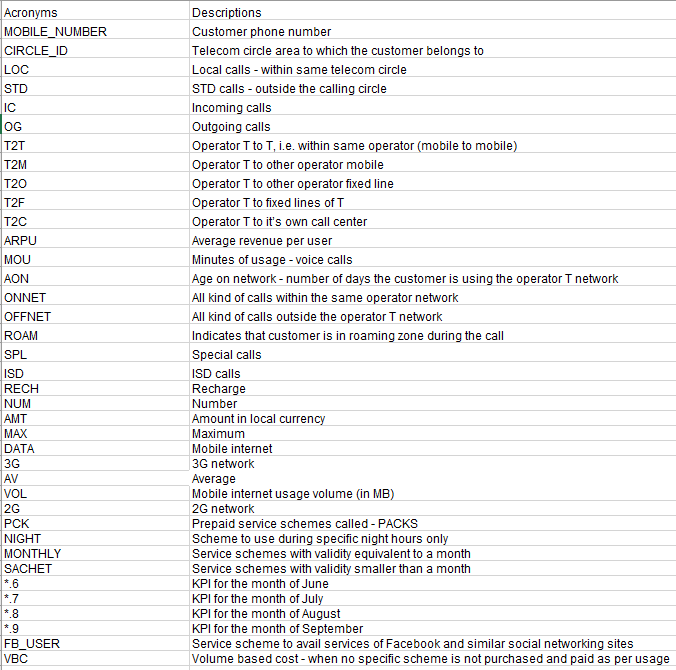

## 1.3 Inspecting Telecom Churn Dataset

In [7]:
# Checking the Dataset Shape (Rows,Columns) 
telecom_churn.shape

(99999, 226)

In [8]:
# Getting the detailed information of the Telecom Churn data by using info() function:
telecom_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [9]:
# Finding out the statistical information of the dataset:
telecom_churn.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9   og_others_6   og_others_7   og_others_8   og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9   ic_others_6   ic_others_7   ic_others_8   ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_2g_mb_9   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8   vol_3g_mb_9     arpu_3g_6     arpu_3g_7     arpu_3g_8     arpu_3g_9     arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9   sachet_2g_6   sachet_2g_7   sachet_2g_8   sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9   sachet_3g_6   sachet_3g_7   sachet_3g_8   sachet_3g_9     fb_user_6     fb_user_7     fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g
count   9.999900e+04    99999.0         98981.0         98981.0         98981.0  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   94621.000000   92254.000000   96062.000000   96140.000000   94621.000000   92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.000000      96062.000000      96140.000000      94621.000000      92254.

In [10]:
# Number of unique values in all columns
telecom_churn.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [10]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(telecom_churn.isnull().sum())

Total NULL Values in each columns
*********************************
mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8 

In [11]:
# Copying the dataset before Cleaning it
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00     

# <center> <b> STEP 2: DATA PREPARATION: PRE-PROCESSING

## 2.1) Data Analysis

In [12]:
# Checking for NULL/MISSING values:  percentage of missing values in each column
round(100*(telecom_churn.isnull().sum()/len(telecom_churn)), 2).sort_values(ascending=False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

**Inference with Missing Values Treatment**:

Now from the above percentages we see that there are a many columns which have **More than 70% of data missing.**
***We can drop these columns as they would convey a very little information!***

But a very important point to consider here is that we have to define **high-value customers** as - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

So we have to take care of these columns so that **we do not drop the columns related to the recharge amounts.** Thus to avoid doing that first we have to deal with the missing values in these columns -

- `total_rech_data_6 - 74.8467 % missing values`
- `total_rech_data_7 - 74.4287 % missing values`
- `av_rech_amt_data_6 - 74.8467 % missing values`
- `av_rech_amt_data_7 - 74.4287 % missing values`


We have 2 more columns as -

- `date_of_last_rech_data_6 - 74.8467 % missing values`
- `date_of_last_rech_data_7 - 74.4287 % missing values`

Lets see how we can impute the missing values in the above mentioned columns now!

In [13]:
# The logic here would be to check if columns - 'total_rech_data_6' and 'date_of_last_rech_data_6' both 
# have null values at the same index. If yes, then that would mean there was no data recharge done for that month
# and we can safely impute the 'total_rech_data_6' value with 0.

total_rech_data_6_index = telecom_churn['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = telecom_churn['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


**Inference**:

So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0. Also as the total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column as well.

In [14]:
telecom_churn['total_rech_data_6'].fillna(0, inplace=True)
telecom_churn['av_rech_amt_data_6'].fillna(0, inplace=True)

We will follow the same logic for **'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8'** columns as well.

In [15]:
total_rech_data_7_index = telecom_churn['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = telecom_churn['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [16]:
total_rech_data_8_index = telecom_churn['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = telecom_churn['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


**Inference:**

- So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for month 7 and 8 & the missing values can be imputed with 0.
- Also as the total data recharge for the month is 0, we can impute 0 for each of **'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8'** columns as well.

In [17]:
# Month 7
telecom_churn['total_rech_data_7'].fillna(0, inplace=True)
telecom_churn['av_rech_amt_data_7'].fillna(0, inplace=True)

# Month 8
telecom_churn['total_rech_data_8'].fillna(0, inplace=True)
telecom_churn['av_rech_amt_data_8'].fillna(0, inplace=True)

In [18]:
# Checking for the missing values %age again
round(100*(telecom_churn.isnull().sum()/len(telecom_churn)), 2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
arpu_3g_6                   74.85
night_pck_user_6            74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
arpu_2g_7                   74.43
fb_user_7                   74.43
count_rech_2g_7             74.43
date_of_last_rech_data_7    74.43
max_rech_data_7             74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
night_pck_user_9            74.08
fb_user_9                   74.08
max_rech_data_9             74.08
count_rech_2g_9             74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
fb_user_8                   73.66
arpu_2g_8                   73.66
max_rech_data_8             73.66
arpu_3g_8     

In [19]:
# Checking for leftover columns having more than 70% missing values now:

cols_with_atleast_70_percent_missing_data = ((telecom_churn.isnull().sum()/ len(telecom_churn)) * 100) >= 70
cols_with_atleast_70_percent_missing_data.sum()

34

**Inference:**
- So there are 34 columns where 70% data is missing. 
- Now this 70% data is based out of the complete data which contains about 1 lac observations. 
- But our objective is to find the churn rate for only high valued customers. It has been given that after filtering high-valued customers we would be left with about 29.9k rows. So dropping the variables now might not be a good idea.

## 2.2) New Feature Creation

#### Deriving new column `total_data_rech_amt_`

- Now we have values for 'total_rech_data_' and 'av_rech_amt_data_' (for months 6, 7, 8 & 9). 
- Using these 2 values we can derive new feature for the respective months called:
    - **`total_data_rech_amt_ = total_rech_data_ * av_rech_amt_data_`**

- Also this new feature would help in **computing the total data recharge amount - `'total_data_rech_amt_' for the months 6, 7, 8 & 9.`**

In [20]:
telecom_churn['total_data_rech_amt_6'] = telecom_churn['total_rech_data_6'] * telecom_churn['av_rech_amt_data_6']
telecom_churn['total_data_rech_amt_7'] = telecom_churn['total_rech_data_7'] * telecom_churn['av_rech_amt_data_7']
telecom_churn['total_data_rech_amt_8'] = telecom_churn['total_rech_data_8'] * telecom_churn['av_rech_amt_data_8']
telecom_churn['total_data_rech_amt_9'] = telecom_churn['total_rech_data_9'] * telecom_churn['av_rech_amt_data_9']

In [21]:
# List the columns of total mou, rech_num and rech_amt
[total for total in telecom_churn.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_og_mou_9',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_ic_mou_9',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'total_data_rech_amt_6',
 'total_data_rech_amt_7',
 'total_data_rech_amt_8',
 'total_data_rech_amt_9']

#### Deriving new column `decrease_mou_action`
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [22]:
# Total mou at good phase incoming and outgoing
telecom_churn['total_mou_good'] = (telecom_churn['total_og_mou_6'] + telecom_churn['total_ic_mou_6'])

In [23]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
telecom_churn['avg_mou_action'] = (telecom_churn['total_og_mou_7'] + telecom_churn['total_og_mou_8'] + telecom_churn['total_ic_mou_7'] + telecom_churn['total_ic_mou_8'])/2

In [24]:
# Difference avg_mou_good and avg_mou_action
telecom_churn['diff_mou'] = telecom_churn['avg_mou_action'] - telecom_churn['total_mou_good']

In [25]:
# Checking whether the mou has decreased in action phase
telecom_churn['decrease_mou_action'] = np.where((telecom_churn['diff_mou'] < 0), 1, 0)

#### Deriving new column `decrease_rech_num_action`
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [26]:
# Avg rech number at action phase
telecom_churn['avg_rech_num_action'] = (telecom_churn['total_rech_num_7'] + telecom_churn['total_rech_num_8'])/2

In [27]:
# Difference total_rech_num_6 and avg_rech_action
telecom_churn['diff_rech_num'] = telecom_churn['avg_rech_num_action'] - telecom_churn['total_rech_num_6']

In [28]:
# Checking if rech_num has decreased in action phase
telecom_churn['decrease_rech_num_action'] = np.where((telecom_churn['diff_rech_num'] < 0), 1, 0)

#### Deriving new column `decrease_rech_amt_action`
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [29]:
# Avg rech_amt in action phase
telecom_churn['avg_rech_amt_action'] = (telecom_churn['total_rech_amt_7'] + telecom_churn['total_rech_amt_8'])/2

In [30]:
# Difference of action phase rech amt and good phase rech amt
telecom_churn['diff_rech_amt'] = telecom_churn['avg_rech_amt_action'] - telecom_churn['total_rech_amt_6']

In [31]:
# Checking if rech_amt has decreased in action phase
telecom_churn['decrease_rech_amt_action'] = np.where((telecom_churn['diff_rech_amt'] < 0), 1, 0) 

#### Deriving new column `decrease_arpu_action`
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [32]:
# ARUP in action phase
telecom_churn['avg_arpu_action'] = (telecom_churn['arpu_7'] + telecom_churn['arpu_8'])/2

In [33]:
# Difference of good and action phase ARPU
telecom_churn['diff_arpu'] = telecom_churn['avg_arpu_action'] - telecom_churn['arpu_6']

In [34]:
# Checking whether the arpu has decreased on the action month
telecom_churn['decrease_arpu_action'] = np.where(telecom_churn['diff_arpu'] < 0, 1, 0)

#### Deriving new column `decrease_vbc_action`
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [35]:
# VBC in action phase
telecom_churn['avg_vbc_3g_action'] = (telecom_churn['jul_vbc_3g'] + telecom_churn['aug_vbc_3g'])/2

In [36]:
# Difference of good and action phase VBC
telecom_churn['diff_vbc'] = telecom_churn['avg_vbc_3g_action'] - telecom_churn['jun_vbc_3g']

In [37]:
# Checking whether the VBC has decreased on the action month
telecom_churn['decrease_vbc_action'] = np.where(telecom_churn['diff_vbc'] < 0 , 1, 0)

In [38]:
telecom_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_data_rech_amt_9  total_mou_good  avg_mou_action  diff_mou  decrease_mou_action  avg_rech_num_action  diff_rech_num  decrease_rech_num_action  avg_rech_amt_action  diff_rech_amt  decrease_rech_amt_action  avg_arpu_action  diff_arpu  decrease_arpu_action  avg_vbc_3g_action  diff_vbc  decrease_vbc_action
0     7000842753        109       

## 2.3) Filter High-Value Customers

- **We need to predict churn only for the high-value customers.**
- Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the **70th percentile of the average recharge amount in the first two months (the good phase).**

In [39]:
# Lets compute the average recharge amount for the month 6 & 7. This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

avg_recharge_amount_month_6_7 = telecom_churn[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  239.0


In [40]:
# Filtering the high value customers we get:

telecom_churn = telecom_churn[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

In [41]:
# Checking shape again:
telecom_churn.shape

(30001, 246)

In [42]:
telecom_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_data_rech_amt_9  total_mou_good  avg_mou_action  diff_mou  decrease_mou_action  avg_rech_num_action  diff_rech_num  decrease_rech_num_action  avg_rech_amt_action  diff_rech_amt  decrease_rech_amt_action  avg_arpu_action  diff_arpu  decrease_arpu_action  avg_vbc_3g_action  diff_vbc  decrease_vbc_action
0      7000842753        109    

**Inference**:
- So after filtering out the high-value customers we are left with 30001 observations. The shape of the telecom dataset is now (30001, 230)

In [43]:
# Reset the dataframe indexes
telecom_churn = telecom_churn.reset_index(drop=True)
telecom_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  loc_ic_mou_9  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2t_mou_9  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_9  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2f_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  std_ic_t2o_mou_9  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  std_ic_mou_9  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_ic_mou_9  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  spl_ic_mou_9  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  ic_others_6  ic_others_7  ic_others_8  ic_others_9  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  last_day_rch_amt_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9  sachet_2g_6  sachet_2g_7  sachet_2g_8  sachet_2g_9  monthly_3g_6  monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_data_rech_amt_9  total_mou_good  avg_mou_action  diff_mou  decrease_mou_action  avg_rech_num_action  diff_rech_num  decrease_rech_num_action  avg_rech_amt_action  diff_rech_amt  decrease_rech_amt_action  avg_arpu_action  diff_arpu  decrease_arpu_action  avg_vbc_3g_action  diff_vbc  decrease_vbc_action
0     7000842753        109     

## 2.4) Rename Columns

In [44]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom_churn.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

## 2.5) Tag Churners and Remove Attributes of the Churn Phase

Now to tag churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
The attributes you need to use to tag churners are only:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9     

We will create a temporary dataset that stores all the parameters/features related to the tagging a customer as churn. We will use the above attributes mentioned.

In [45]:
churn_parameters_data = telecom_churn[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0            0.00            0.00         0.00         0.00
1            0.00            0.00         0.00         0.00
2           34.91          142.18         0.00         0.00
3          252.61         1031.53         0.00         0.00
4          127.48          127.63        13.93       314.74

So any customer who does not use any of the facility (calls or mobile data) during the 9th month, will have the row sum for the attributes equal to zero. This customer can be tagged as **Churn (1)** else the customer will be tagged as **Not Churn (0)**.

In [46]:
telecom_churn['churn'] = telecom_churn.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [47]:
telecom_churn['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

**Inference:**
- Now comparing the output of the churn_parameters_data dataset and telecom_churn[churn] column, first five entries match. This shows that the churn mapping is correct.

- Now we need to remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [48]:
# We will try to get all the columns in the 'telecom_churn' dataset where the column have '_9' in the name.

cols_with__9 = [col for col in telecom_churn.columns if '_9' in col]
cols_with__9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

**We need to drop the above list of last month columns entirely as project demands!!**

In [49]:
print("Total number of columns to be dropped at this stage is - ", len(cols_with__9))

Total number of columns to be dropped at this stage is -  56


In [50]:
# Dropping rest columns After tagging churners, removing all the attributes corresponding to the churn phase 
# (all attributes having ‘ _9’, etc. in their names)
telecom_churn.drop(cols_with__9, axis=1, inplace = True)

In [51]:
telecom_churn.shape

(30001, 191)

**So after dropping all the last month columns, we are left with 175 columns!**

# <center> <b> STEP 3: DATA CLEANING, MANIPULATION & OUTLIER ANALYSIS WITH VISUALIZATION

##  Data Cleaning & Missing Values Treatment

### <b> A) Columns

Lets now check on the Leftover columns. We will compute the %age of missing values for the columns left in the dataset again for missing values treatment.

In [52]:
# Checking for NULL/MISSING values:  percentage of missing values in each leftover columns
round(100*(telecom_churn.isnull().sum()/len(telecom_churn)), 2).sort_values(ascending=False)

max_rech_data_8             46.83
night_pck_user_8            46.83
date_of_last_rech_data_8    46.83
fb_user_8                   46.83
arpu_2g_8                   46.83
arpu_3g_8                   46.83
count_rech_2g_8             46.83
count_rech_3g_8             46.83
count_rech_3g_6             44.15
fb_user_6                   44.15
max_rech_data_6             44.15
count_rech_2g_6             44.15
date_of_last_rech_data_6    44.15
arpu_3g_6                   44.15
night_pck_user_6            44.15
arpu_2g_6                   44.15
fb_user_7                   43.15
max_rech_data_7             43.15
night_pck_user_7            43.15
count_rech_3g_7             43.15
arpu_2g_7                   43.15
date_of_last_rech_data_7    43.15
arpu_3g_7                   43.15
count_rech_2g_7             43.15
std_ic_t2m_mou_8             3.91
std_ic_t2o_mou_8             3.91
std_og_t2m_mou_8             3.91
std_ic_t2f_mou_8             3.91
std_og_t2c_mou_8             3.91
std_ic_mou_8  

### Columns with more than 40% data missing:

In [53]:
# Also lets check how many columns have more than 40% data missing.

total_cols_with_atleast_40_percent_missing_data = ((telecom_churn.isnull().sum()/ len(telecom_churn)) * 100) >= 40
total_cols_with_atleast_40_percent_missing_data.sum()

24

In [54]:
# Get the column/feature names which have more than 40% missing data.

cols_names_with_40_percent_missing_value = total_cols_with_atleast_40_percent_missing_data[
    total_cols_with_atleast_40_percent_missing_data > 0.40].index

cols_names_with_40_percent_missing_value

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'], dtype='object')

### Now lets examine the above columns (with >40% missing values) one by one -

#### 1. 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'

For the columns which have date values missing, we cannot impute any date arbitrarily. Also with ***almost 50% of date values not present for these columns we can safely drop these columns.***

In [55]:
telecom_churn.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

#### 2. 'max_rech_data_6', 'max_rech_data_7' & 'max_rech_data_8'

In [56]:
print("Column info for max_rech_data_6")
print("-------------------------------")
print(telecom_churn.max_rech_data_6.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_6 columns is - ", telecom_churn.max_rech_data_6.isnull().sum())

Column info for max_rech_data_6
-------------------------------
count    16756.000000
mean       139.798580
std        118.851784
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_6 columns is -  13245


In [40]:
print("Column info for max_rech_data_7")
print("-------------------------------")
print(telecom_churn.max_rech_data_7.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_7 columns is - ", telecom_churn.max_rech_data_7.isnull().sum())

Column info for max_rech_data_7
-------------------------------
count    17057.000000
mean       140.431143
std        120.247247
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_7 columns is -  12944


In [57]:
print("Column info for max_rech_data_8")
print("-------------------------------")
print(telecom_churn.max_rech_data_8.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_8 columns is - ", telecom_churn.max_rech_data_8.isnull().sum())

Column info for max_rech_data_8
-------------------------------
count    15953.000000
mean       136.329217
std        119.531924
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_8 columns is -  14048


**Inference:**
- So from the stats for the 3 columns above we know that the maximum recharge amount is 1555 and the minimun amount is 1. 
- Thus the missing values can be infered as **No recharge was done** and can be imputed with 0 for all the 3 columns.

In [58]:
# Replace NA with 0
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom_churn[col].fillna(0, inplace=True)

**Now all the columns that have more than 40% missing values one way or the other relate to data/mobile internet usage for the months 6, 7 & 8 respectively. One important observation that comes out is that for a particular month all these values have same number of missing values.** 
The below data tells us the same -     

- **`Count of missing values for Month 6`** - count_rech_2g_6 13158 - count_rech_3g_6 13158 - arpu_3g_6 13158 - arpu_2g_6 13158 - night_pck_user_6 13158

- **`Count of missing values for Month 7`** - count_rech_2g_7 13905 - count_rech_3g_7 13905 - arpu_3g_7 13905 - arpu_2g_7 13905 - night_pck_user_7 13905

- **`Count of missing values for Month 8`** - count_rech_2g_8 14630 - count_rech_3g_8 14630 - arpu_3g_8 14630 - arpu_2g_8 14630 - night_pck_user_8 14630

So now lets check & confirm if these missing values from the respective months are all from the same observations/index.

#### Data Insight 1

**Also one more insight that the above figures give us is that towards the 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.**

In [59]:
# Month 6

arpu_3g_6_index = telecom_churn['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom_churn['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom_churn['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom_churn['count_rech_3g_6'].isnull()
fb_user_6_index = telecom_churn['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')


# ***************************************************************************************************************************

# Month 7

arpu_3g_7_index = telecom_churn['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom_churn['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom_churn['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom_churn['count_rech_3g_7'].isnull()
fb_user_7_index = telecom_churn['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')

# ***************************************************************************************************************************

# Month 8

arpu_3g_8_index = telecom_churn['arpu_3g_8'].isnull()
night_pck_user_8_index = telecom_churn['night_pck_user_8'].isnull()
count_rech_2g_8_index = telecom_churn['count_rech_2g_8'].isnull()
count_rech_3g_8_index = telecom_churn['count_rech_3g_8'].isnull()
fb_user_8_index = telecom_churn['fb_user_8'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_8_index.equals(night_pck_user_8_index) & night_pck_user_8_index.equals(count_rech_2g_8_index) & count_rech_2g_8_index.equals(count_rech_3g_8_index) &  count_rech_3g_8_index.equals(fb_user_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 6 are equal
The indexes for NULL values for month 7 are equal
The indexes for NULL values for month 8 are equal


#### Data Insight 2

- Also an observation with mobile internet usage having a missing value would mostly mean that the customer is not using that particular service. This would also mean that the person would not be using any add-on services that would require a mobile internet pack.


- **So with this inference we can impute the missing values related to columns for mobile data with 0.**


- Also we saw above that all the missing values are from the same record i.e., say for example the column for max_rech_data_ for a particular month is missing then all the other attributes related to mobile internet are also missing. So every attribute can be imputed with 0.

In [60]:
# From the above inferences let's impute the missing values with 0

columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                     'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
                     'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_churn[columns_to_impute] = telecom_churn[columns_to_impute].fillna(0)

In [45]:
# Lets check the info() for the above columns again - 

telecom_churn[columns_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count_rech_2g_6   30001 non-null  float64
 1   count_rech_2g_7   30001 non-null  float64
 2   count_rech_2g_8   30001 non-null  float64
 3   count_rech_3g_6   30001 non-null  float64
 4   count_rech_3g_7   30001 non-null  float64
 5   count_rech_3g_8   30001 non-null  float64
 6   arpu_3g_6         30001 non-null  float64
 7   arpu_3g_7         30001 non-null  float64
 8   arpu_3g_8         30001 non-null  float64
 9   arpu_2g_6         30001 non-null  float64
 10  arpu_2g_7         30001 non-null  float64
 11  arpu_2g_8         30001 non-null  float64
 12  night_pck_user_6  30001 non-null  float64
 13  night_pck_user_7  30001 non-null  float64
 14  night_pck_user_8  30001 non-null  float64
 15  fb_user_6         30001 non-null  float64
 16  fb_user_7         30001 non-null  float6

**We have remove missing values from the columns which had > 40% missing data!!**

### Columns with ZERO Variance :

Let's check on the other columns now. But before proceeding with the missing value analysis of other columns let's check if we have any columns with zero variance (as this would be very important while conducting **Principal Component Analysis**). For the problem at hand if any variable has zero variance (all same values) it would have no impact during the analysis. We will drop such columns!!!

**We have 2 methods for checking the same:**

**`1. nunique()`**                             
**`2. var()`**

We will check both the methods >>

#### 1. Variance  - df.var() Method

In [61]:
# Variance  - df.var() method

columns_with_0_variance = telecom_churn.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

print("\n------------------------------------------------------------------------------\n")


columns_with_1_unique_value = telecom_churn.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  9
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], dtype='object')

------------------------------------------------------------------------------

Total columns with only ONE unique value are -  13
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], dtype='object')


As there are 3 date columns we see a difference in result. We will keep the date columns for now and deal with it at a later point. Lets drop only the non-date columns now.

In [62]:
# Dropping the non - date columns 
telecom_churn.drop(column_name_with_0_variance, axis=1, inplace = True)

# Dropping circle_id column as it holds no importance for analysis
telecom_churn.drop("circle_id", axis=1, inplace = True)

In [63]:
# Data glimpse

telecom_churn.head()

mobile_number last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_mou_good  avg_mou_action  diff_mou  decrease_mou_action  avg_rech_num_action  diff_rech_num  decrease_rech_num_action  avg_rech_amt_action  diff_rech_amt  decrease_rech_amt_action  avg_arpu_action  diff_arpu  decrease_arpu_action  avg_vbc_3g_action  diff_vbc  decrease_vbc_action  churn
0     7000842753            6/30/2014            7/31/2014            8/31/2014   197.385   214.816   213.803          NaN          NaN         0.00           NaN           NaN          0.00            NaN            NaN           0.00            NaN            NaN           0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00           NaN           NaN          0.00               NaN               NaN              0.00               NaN               NaN              0.00               NaN               NaN              0.00           NaN           NaN          0.00           NaN           NaN          0.00           NaN           NaN          0.00          NaN          NaN          0.0            0.00            0.00            0.00               NaN               NaN              0.16               NaN               NaN              4.13               NaN               NaN              1.15           NaN           NaN          5.44               NaN               NaN              0.00  

Let's again look at the columns with missing values -

In [64]:
# Overall Mising value check in dataset
columns_with_null_values = telecom_churn.columns[telecom_churn.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',

In [65]:
# Missing Value check for Month 6
cols_with_null_values_for_month_6 = [col for col in columns_with_null_values if '_6' in col]

telecom_churn[cols_with_null_values_for_month_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          29456 non-null  float64
 1   offnet_mou_6         29456 non-null  float64
 2   roam_ic_mou_6        29456 non-null  float64
 3   roam_og_mou_6        29456 non-null  float64
 4   loc_og_t2t_mou_6     29456 non-null  float64
 5   loc_og_t2m_mou_6     29456 non-null  float64
 6   loc_og_t2f_mou_6     29456 non-null  float64
 7   loc_og_t2c_mou_6     29456 non-null  float64
 8   loc_og_mou_6         29456 non-null  float64
 9   std_og_t2t_mou_6     29456 non-null  float64
 10  std_og_t2m_mou_6     29456 non-null  float64
 11  std_og_t2f_mou_6     29456 non-null  float64
 12  std_og_mou_6         29456 non-null  float64
 13  isd_og_mou_6         29456 non-null  float64
 14  spl_og_mou_6         29456 non-null  float64
 15  og_others_6          29456 non-null 

**Inference :** 

- As we see here 29456 non-null observations out of 30001. So we have 545 missing values for attributes reated to month 6. On mapping these attributes using the data dictionary we know that all these attributes point to the minutes of usage calls (incoming/outgoing) made within the network or to outside network.

- So if any value is missing means that the minutes of usage is missing and can be imputed with 0.

- The same would apply for the columns pointing to months 7 & 8 aswell.

In [66]:
# But before proceeding let's confirm our inferences for months 7 & 8.

# # Missing Value check for Month 7
print("*************************Month 7*************************\n")
cols_with_null_values_for_month_7 = [col for col in columns_with_null_values if '_7' in col]
print(telecom_churn[cols_with_null_values_for_month_7].info())

# # Missing Value check for Month 8
print("\n*************************Month 8*************************\n")
cols_with_null_values_for_month_8 = [col for col in columns_with_null_values if '_8' in col]
print(telecom_churn[cols_with_null_values_for_month_8].info())

*************************Month 7*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_date_of_month_7  29974 non-null  object 
 1   onnet_mou_7           29464 non-null  float64
 2   offnet_mou_7          29464 non-null  float64
 3   roam_ic_mou_7         29464 non-null  float64
 4   roam_og_mou_7         29464 non-null  float64
 5   loc_og_t2t_mou_7      29464 non-null  float64
 6   loc_og_t2m_mou_7      29464 non-null  float64
 7   loc_og_t2f_mou_7      29464 non-null  float64
 8   loc_og_t2c_mou_7      29464 non-null  float64
 9   loc_og_mou_7          29464 non-null  float64
 10  std_og_t2t_mou_7      29464 non-null  float64
 11  std_og_t2m_mou_7      29464 non-null  float64
 12  std_og_t2f_mou_7      29464 non-null  float64
 13  std_og_mou_7          29464 non-null  float64
 14  isd_og_mou_

#### Data Insight 3

**Also one more insight that the above figures give us is that towards the 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.**           

So not using the services means the minutes of usage can be imputed with 0.

In [67]:
# Let's impute the missing values from the above columns with 0. There are 3 column with date values - 'date_of_last_rech'.
# We do not want to impute date objects with 0. So will exclude it for now.

for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        telecom_churn[column].fillna(0, inplace=True)

In [68]:
# Dataset glimpse

telecom_churn.head()

mobile_number last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  arpu_2g_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  total_mou_good  avg_mou_action  diff_mou  decrease_mou_action  avg_rech_num_action  diff_rech_num  decrease_rech_num_action  avg_rech_amt_action  diff_rech_amt  decrease_rech_amt_action  avg_arpu_action  diff_arpu  decrease_arpu_action  avg_vbc_3g_action  diff_vbc  decrease_vbc_action  churn
0     7000842753            6/30/2014            7/31/2014            8/31/2014   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0              0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00              0.00              0.00              0.16              0.00              0.00              4.13              0.00              0.00              1.15          0.00          0.00          5.44              0.00              0.00              0.00  

### Date Columns

Now let's have a look at the 3 date columns we had excluded above

In [69]:
# Let's check on the date values
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

telecom_churn[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_of_last_rech_6   29928 non-null  object
 1   date_of_last_rech_7   29903 non-null  object
 2   date_of_last_rech_8   29418 non-null  object
 3   last_date_of_month_6  30001 non-null  object
 4   last_date_of_month_7  30001 non-null  object
 5   last_date_of_month_8  30001 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [70]:
# The date columns will not be of any use to us during the analysis.
# Let's delete the date columns as we do not need them.

telecom_churn.drop(date_columns, axis=1, inplace = True)

### Dataset Missing Value Check After Imputation:

In [71]:
# Lets have a look at the data description for missing values again -

print(telecom_churn.isnull().sum())

mobile_number               0
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
loc_og_mou_6                0
loc_og_mou_7                0
loc_og_mou_8                0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t

**Thus we have no missing values now in any of the columns!**

### Tag churners and remove attributes of the churn phase

#### Data Insight 4

Looking at the problem statement, attributes **`total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9`** are used to **tag churners**. 

So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis. 
**Also, dropping these individual columns will help in removing the Multicollinearity!!**

Let's now drop all those individual columns whose totals are available.

In [73]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'decrease_vbc_action',
                    'decrease_arpu_action','decrease_rech_amt_action','decrease_rech_num_action', 'decrease_mou_action']

telecom_churn.drop(individual_cols, axis = 1, inplace = True)

telecom_churn.shape

(30001, 116)

### <b> B) Rows

#### Now lets analyze the revenue columns to check if there are any discrepencies in the data.

In [74]:
# Let's check the data description for the arpu columns

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(telecom_churn[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
----------------------------------------
Column Description for - arpu_8
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64
----------------------------------------


**Inference:**

The above statistical description of the **ARPU - Average Revenue Per User** column gives some important insight. The **MINIMUM** value for all the arpu related columns are NEGATIVE. Now as per the defination of ARPU which says -

**"The average revenue per user is the average billing per customer earned by the telecom company every month".**

`Now the revenue generated from a user cannot be negative. If a customer is not using any services then apru for the person would be zero (rather that being negative). Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It will be of no use to us for analysis. We will drop such observations.`

Let's go ahead and see how many such observations we have for months 6, 7 & 8.

In [75]:
# Index where the arpu values for month 6 are less than 0 -

arpu_6_index = (telecom_churn['arpu_6'] < 0)
    
# Total number of such observations for month 6 -
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())

Total observations with negative arpu values for month 6 - 39


In [76]:
# Index where the arpu values for month 7 are less than 0 -

arpu_7_index = (telecom_churn['arpu_7'] < 0)
    
# Total number of such observations for month 7 -
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 50


In [77]:
# Index where the arpu values for month 8 are less than 0 -

arpu_8_index = (telecom_churn['arpu_8'] < 0)
    
# Total number of such observations for month 8 -
print('Total observations with negative arpu values for month 8 -', arpu_8_index.sum())

Total observations with negative arpu values for month 8 - 90


**Inference:**

`Thus in total there are (39 + 50 + 90) = 179 such observations.`

`We will now drop all these observations from the data.`

In [78]:
# Let's delete the observations with negative arpu values. 

telecom_churn = telecom_churn[(telecom_churn['arpu_6'] >= 0) & 
                            (telecom_churn['arpu_7'] >= 0) & 
                            (telecom_churn['arpu_8'] >= 0)]

In [79]:
telecom_churn.shape

(29824, 116)

**We can now go ahead with EDA!!**

# <center> <b> Step 4: EDA : Visualising the Data on Categorical & Numerical <br> (Univariate, Bivariate & MultiVariate Analysis)

In [80]:
# Getting the info of the telecom churn dataframe after Data Cleaning
telecom_churn.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Data columns (total 116 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    mobile_number          int64  
 1    arpu_6                 float64
 2    arpu_7                 float64
 3    arpu_8                 float64
 4    onnet_mou_6            float64
 5    onnet_mou_7            float64
 6    onnet_mou_8            float64
 7    offnet_mou_6           float64
 8    offnet_mou_7           float64
 9    offnet_mou_8           float64
 10   roam_ic_mou_6          float64
 11   roam_ic_mou_7          float64
 12   roam_ic_mou_8          float64
 13   roam_og_mou_6          float64
 14   roam_og_mou_7          float64
 15   roam_og_mou_8          float64
 16   loc_og_mou_6           float64
 17   loc_og_mou_7           float64
 18   loc_og_mou_8           float64
 19   std_og_mou_6           float64
 20   std_og_mou_7           float64
 21   std_og_mou_8           float64
 2

## 4.1) Categorical Variables Presence Check

**Let's check if there are any categorical variables in the dataframe**

In [65]:
# Summary Statistics
telecom_churn.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8   ic_others_6   ic_others_7   ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8   sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8   sachet_3g_6   sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7     fb_user_8           aon      vbc_3g_8      vbc_3g_7      vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8         churn
count   2.982400e+04  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000   29824.000000   29824.000000   29824.000000   29824.000000   29824.000000   29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000    29824.000000    29824.000000    29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000    29824.000000    29824.000000    29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000      29824.000000      29824.000000      29824.000000      29824.000000      29824.000000      29824.000000    29824.000000    29824.000000    29824.000000       29824.000000        29824.00000       29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000     29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000      29824.000000      29824.000000      29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000  29824.000000           29824.000000           29824.000000           29824.000000  29824.000000
mean    7.001205e+09    559.219456    562.562717    510.085640    261.221418    268.432668    234.713851    373.290400    378.524141    335.496097      16.163287      12.665772      12.540844      26.587856      20.221840      19.959368    254.184985    255.602001    236.198045    347.042871    364.456108    307.816943      2.157038      2.105380      1.955376      5.820176      7.118840      6.572885      0.661218      0.043034      0.057949      609.875318      629.333328      552.608763    231.763090    235.266615    224.307171     46.913021     49.226000     44.591636      290.629534      297.906546      281.173369      0.061103      0.019789      0.026632     10.731791     11.881996     11.018455      1.152407      1.504573      1.222134         11.857631         11.749464       

Variables **`night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7 and fb_user_8`** are encoded with number 0 and 1. These variables can be considered as **Ordered Categorical** columns.

Also, the datatype of these variables can be converted to integer.

In [66]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom_churn[category_list] = telecom_churn[category_list].astype(int)

telecom_churn[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29824 non-null  int32
 1   night_pck_user_7  29824 non-null  int32
 2   night_pck_user_8  29824 non-null  int32
 3   fb_user_6         29824 non-null  int32
 4   fb_user_7         29824 non-null  int32
 5   fb_user_8         29824 non-null  int32
dtypes: int32(6)
memory usage: 932.0 KB


## 4.2) Duplicate Row Check

Let's now check if all the rows are unique or not. This can be done by verifying the **Unique Key - mobile_number**

In [67]:
if len(telecom_churn['mobile_number'].unique()) == len(telecom_churn.index):
    print("No Duplicates. Each Mobile Number is unique.")
else:
    print("Duplicate observations present.")

No Duplicates. Each Mobile Number is unique.


In [68]:
# Also we do not need the column 'mobile_number' during our analysis. It would serve no purpose.
# Lets drop the column

telecom_churn.drop(['mobile_number'], axis=1, inplace = True)

# Data glimpse
telecom_churn.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8  churn
0   197.385   214.816   213.803         0.00         0.00         0.00          0.00          0.00          0.00           0.00           0.00           0.00           0.00           0.00           0.00          0.00          0.00          0.00          0.00          0.00          0.00           0.0          0.00          0.00           0.0           0.0          0.00          0.0          0.0          0.0            0.00            0.00            0.00          0.00          0.00          5.44          0.00          0.00          0.00            0.00            0.00            5.44          0.00           0.0           0.0          0.00          0.00          0.00         0.00         0.00         0.00                 4                 3                 2               362               252               252             252             252             252                1.0                1.0                1.0            252.0            252.0            252.0              0.0              0.0              0.0              1.0              1.0              1.0        30.13         1.32         5.75        83.57       150.76       109.61                 0                 0                 0             0             0             0            0            0            0             1             1             1            0            0            0          1          1          1  968     30.40      0.00    101.20                  252.0                  252.0                  252.0      1
1  1069.180  1349.850  3171.480        57.84        54.68        52.29        453.43        567.16        325.91          16.23          33.49          31.64          23.74          12.59          38.06        422.16        533.91        255.79         60.86         75.14         77.84           0.0          0.18         10.01           4.5           0.0          6.50          0.0          0.0          0.0          487.53          609.24          350.16        427.88        355.23        188.04        180.54        173.08        193.94          626.46          558.04          428.74          0.21           0.0           0.0          2.06         14.53         31.59        15.74        15.19        15.14                 5                 5                 7              1580               790              3638            1580             790            1580                0.0                0.0                0.0              0.0              0.0            

## 4.3) Univariate Analysis - Ordered Categorical Variables

In [69]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.


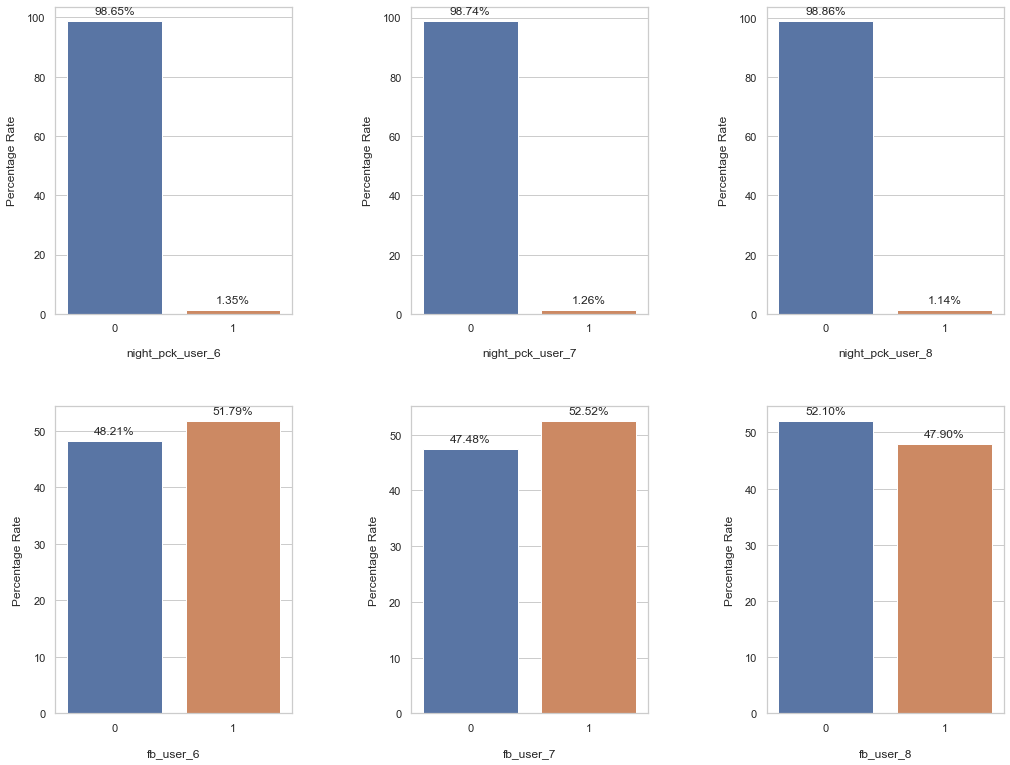

In [70]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate

category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
counter = 1

plt.figure(figsize = (17, 13))

for col_list in category_list:
        
    series = round(((telecom_churn[col_list].value_counts(dropna = False))/(len(telecom_churn[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

**Inference:**

- From the **night_pck_user** variables, it can be inferred that almost 99% of users are not using nightly pack in all the 3 months.

- However users are using facebook(fb) **fb_user** in equal percentage and it is observed that as the month increases, there is a decline in the fb usage.

## 4.4)  Data Imbalance Check

Positive Churn Samples = 2364
Negative Churn Samples = 27460
Proportion of Positive to Negative Samples = 8.61%


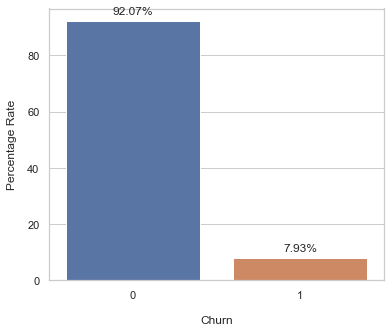

In [71]:
# Getting number of positve and negative customer churn rate

pos = telecom_churn[telecom_churn["churn"] == 1].shape[0]
neg = telecom_churn[telecom_churn["churn"] == 0].shape[0]

print(f"Positive Churn Samples = {pos}")
print(f"Negative Churn Samples = {neg}")
print(f"Proportion of Positive to Negative Samples = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (6, 5))

series = round(((telecom_churn["churn"].value_counts(dropna = False))/(len(telecom_churn["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
add_data_labels(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

### Data Insight 5

- **From the above bar plot it is evident that the dataset is `HIGHLY IMBALANCED`. The proportion for `churn to non-churn is around 8%`.**
- As we can see that 91% of the customers do not churn, there is a possibility of class imbalance
- **For a correct and smooth analysis we need to deal with this `CLASS IMBALANCE PROBLEM`. We will deal with this in a later section after feature engineering.**

## 4.5) Univariate Analysis - Quantitative Variables

#### Custom Function for Default Plotting variables

In [72]:
# Custom Function for Default Plotting variables

# Function Parameters  - 

# figure_title         -    The title to use for the plot.
# xlabel               -    The x-axis label for the plot.
# ylabel               -    The y-axis label for the plot.

def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

#### Custom Function for Univariate Analysis

In [73]:
# Custom Function for Univariate Analysis

# Function Parameters   -

# figsize_x             -      The width of the plot figure in inches.
# figsize_y             -      The height of the plot figure in inches.
# subplot_x             -      The rows for the subplot.
# subplot_y             -      The columns for the subplot.
# xlabel                -      The x-axis label for the plot.
# ylabel                -      The y-axis label for the plot.
# x_axis                -      The series/variable to be plotted along the x-axis.
# data                  -      The data frame.

# wspace                -      The amount of width reserved for space between subplots,
#                              expressed as a fraction of the average axis width

# xlabel_rotation       -      The degree of rotation for the x-axis ticks (values).

def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'red')
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, ylabel)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'blue')
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

#### Univariate Plot Analysis of Quantitative Variables

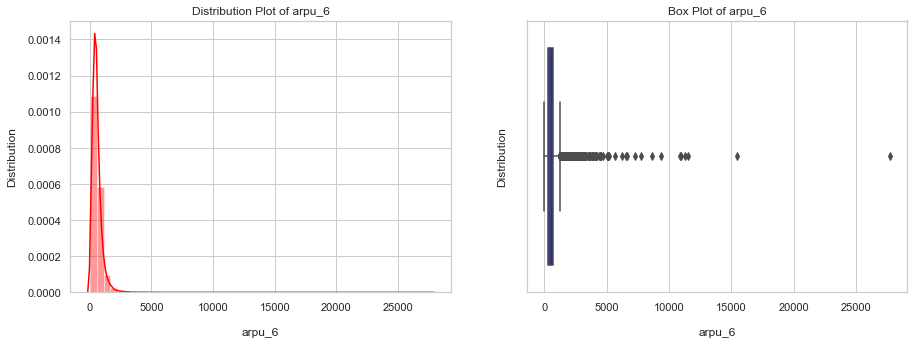

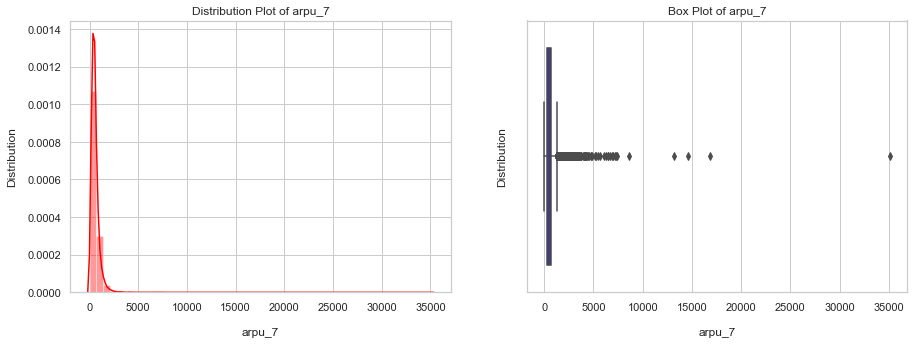

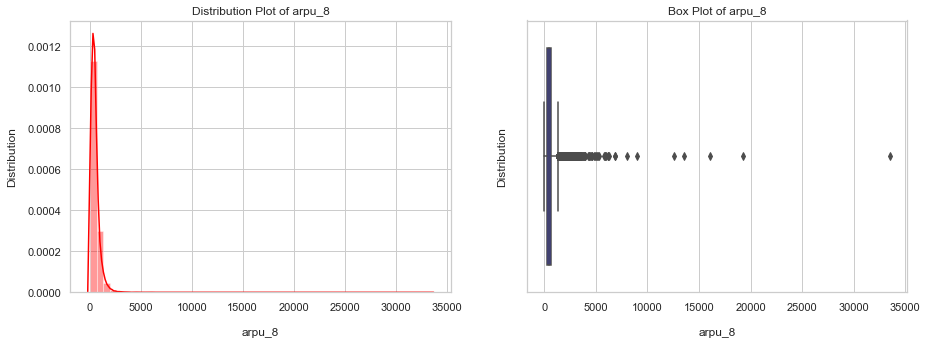

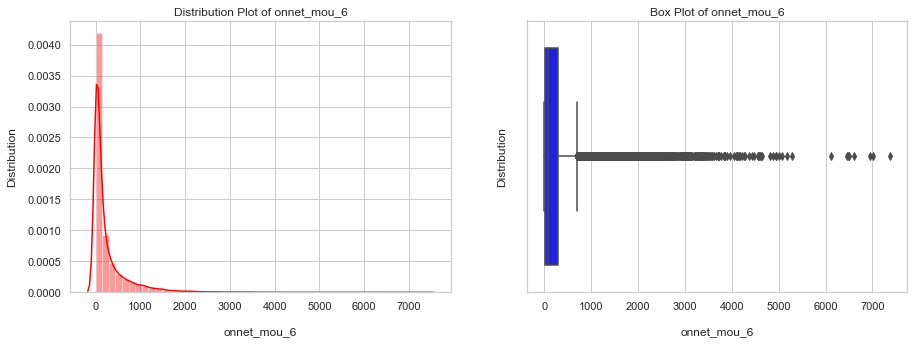

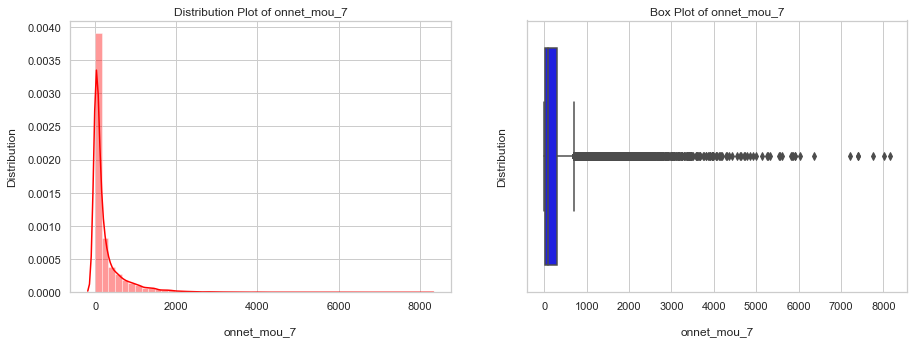

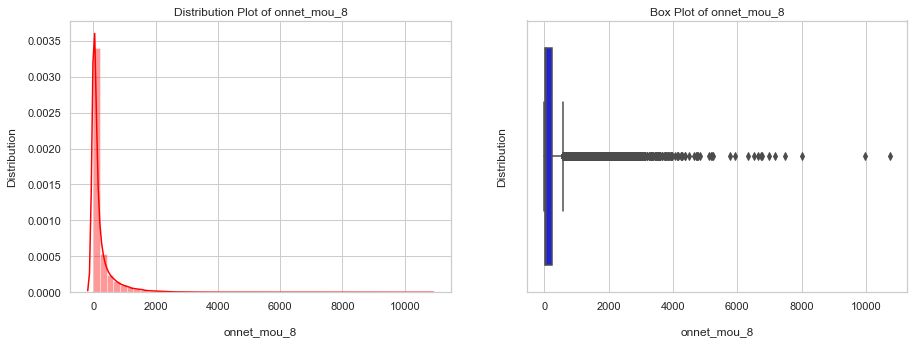

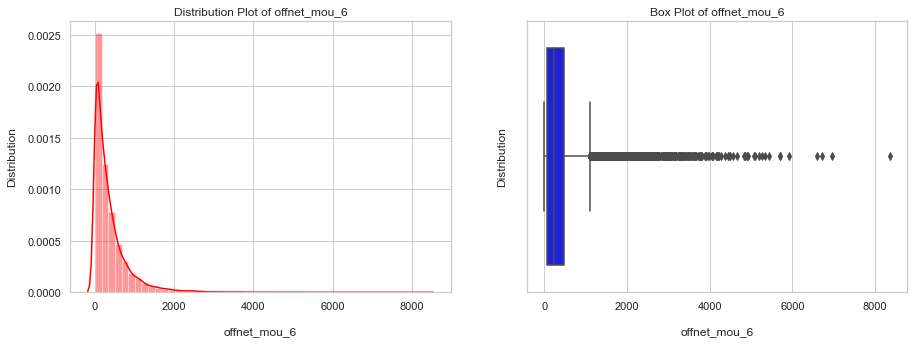

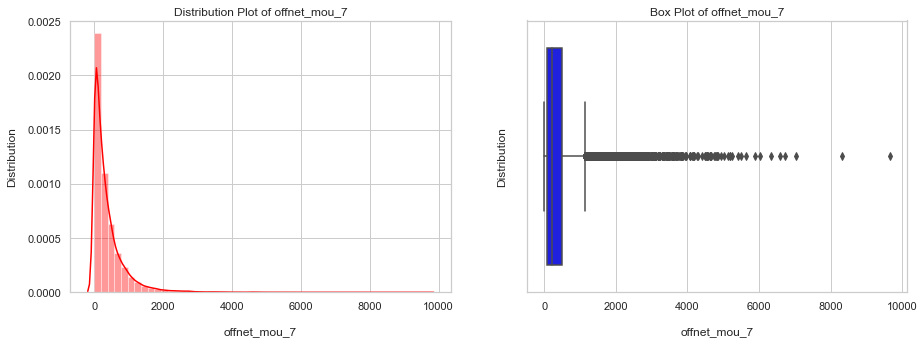

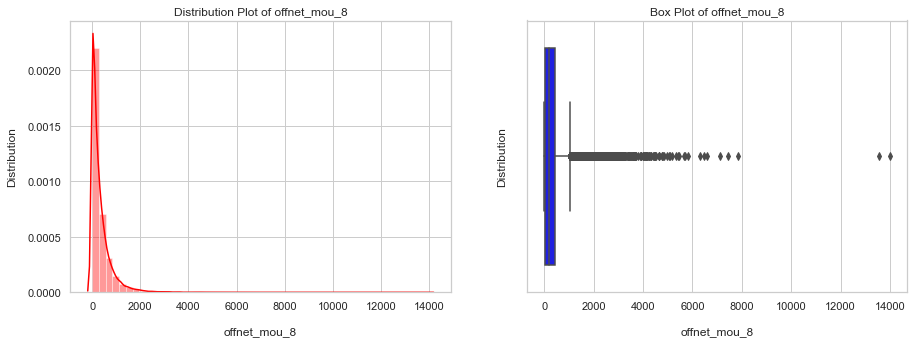

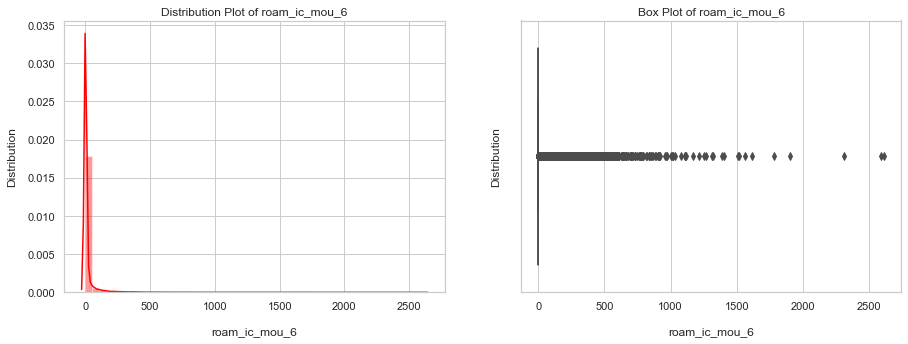

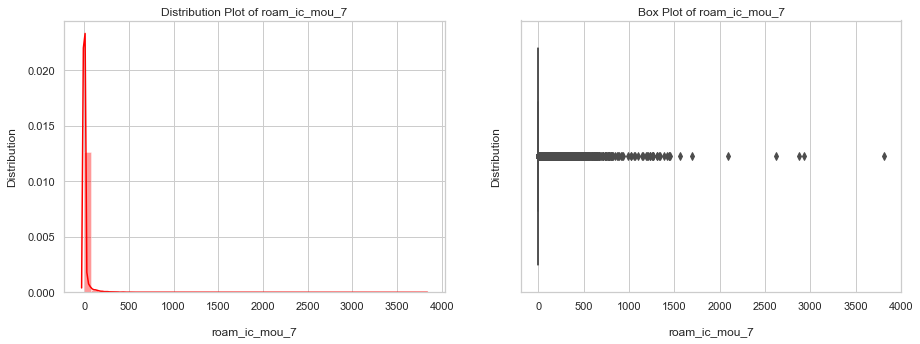

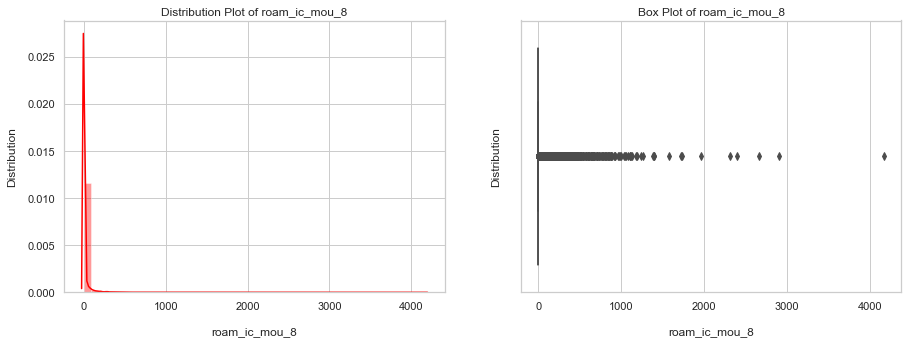

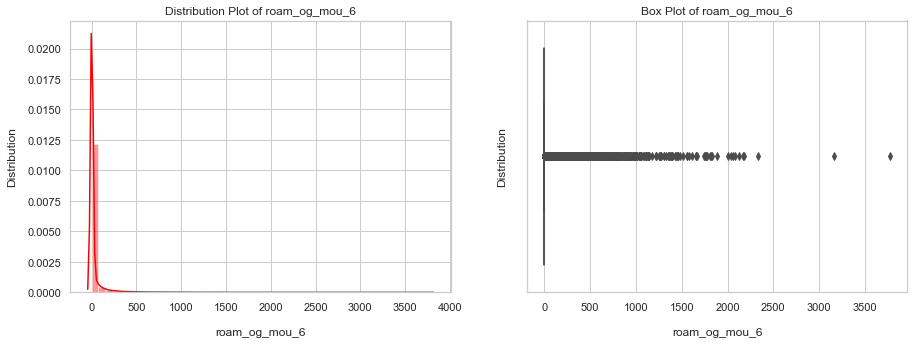

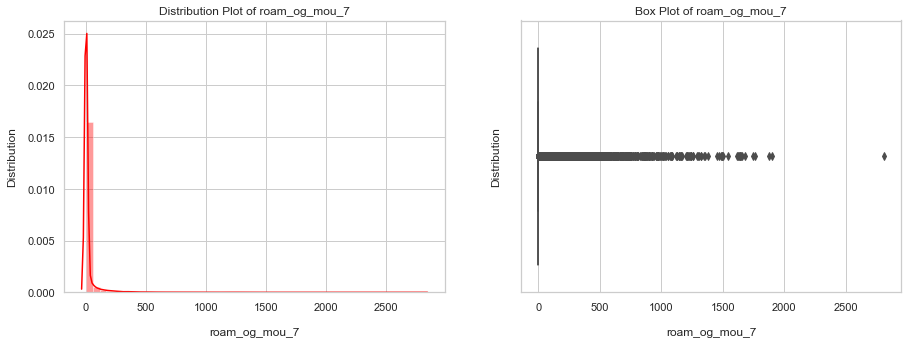

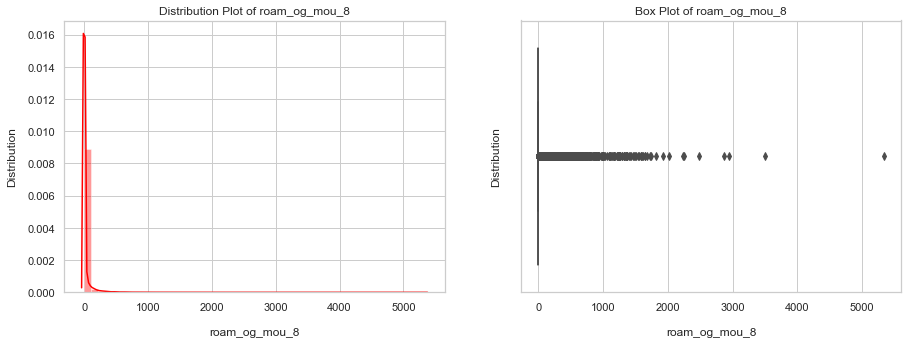

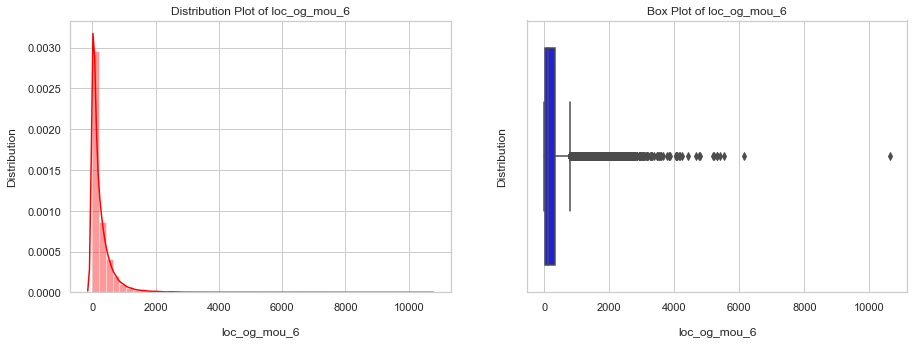

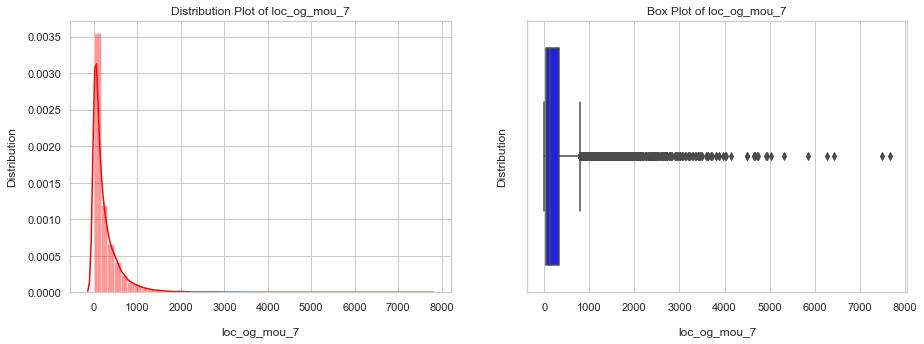

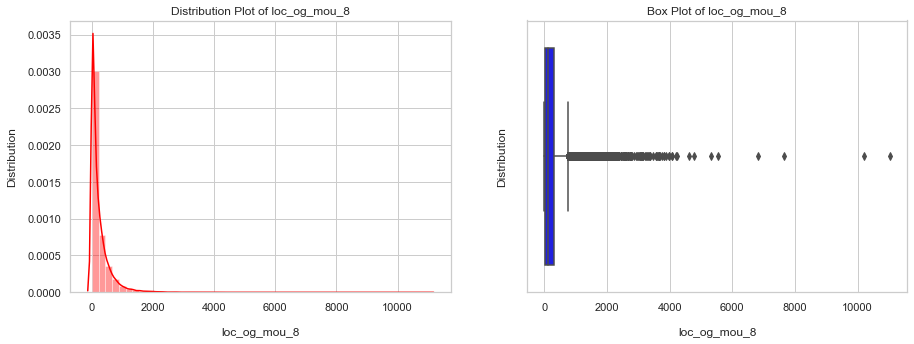

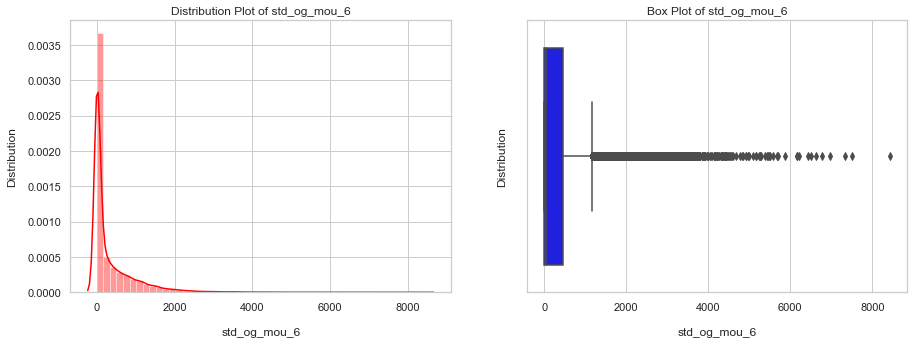

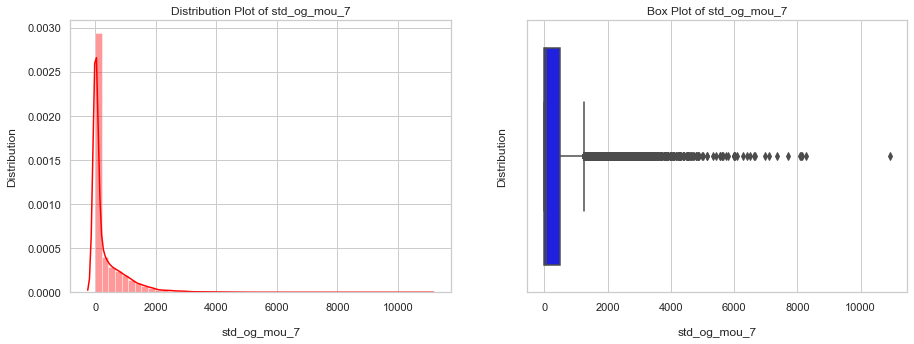

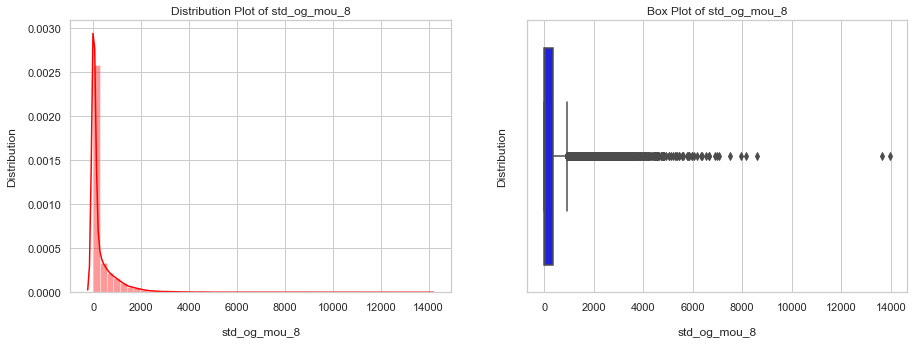

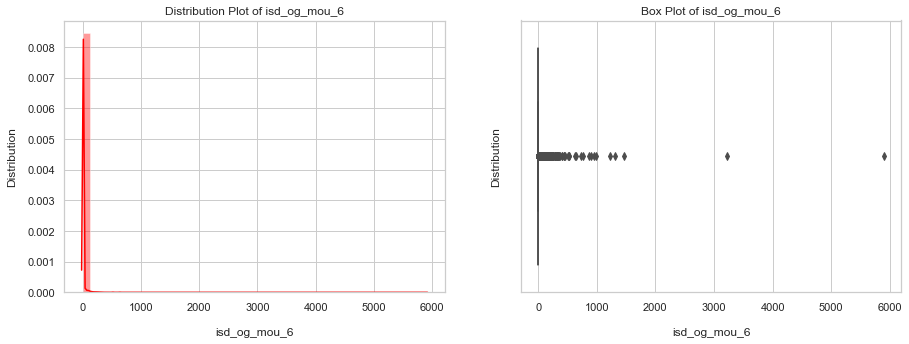

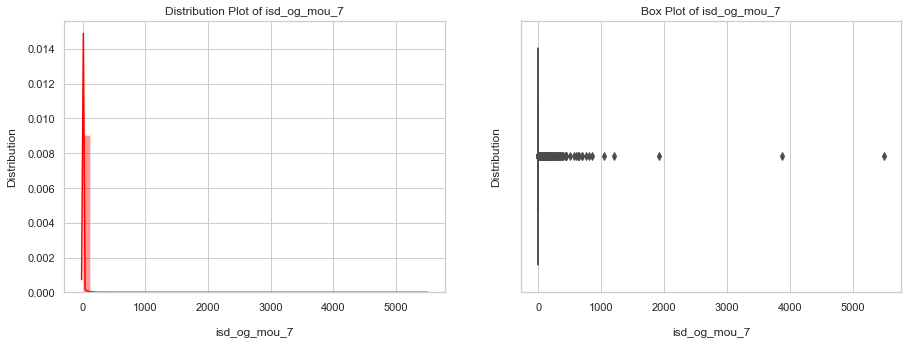

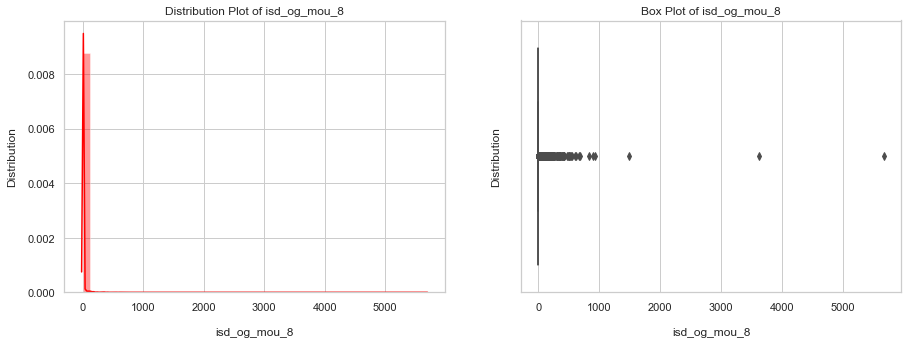

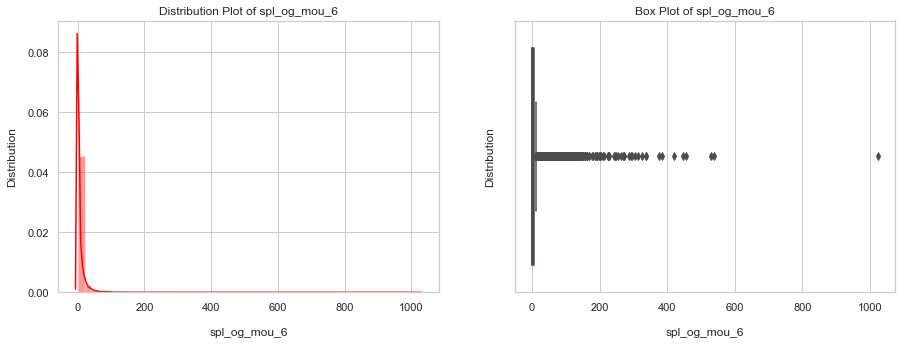

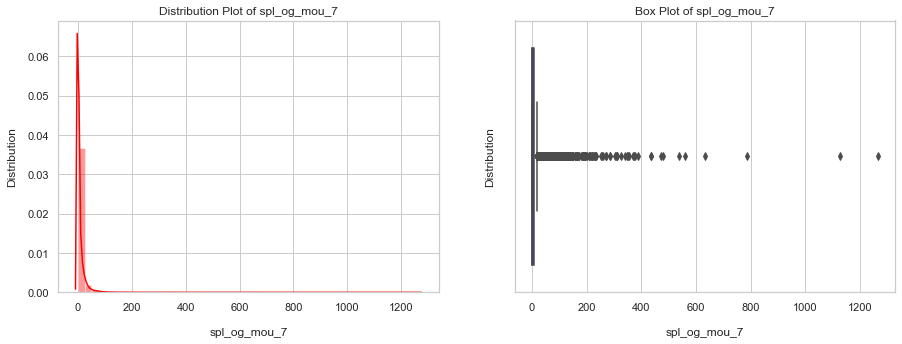

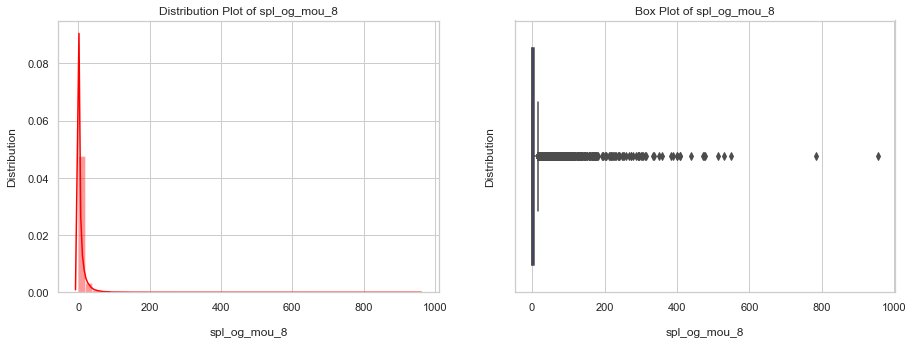

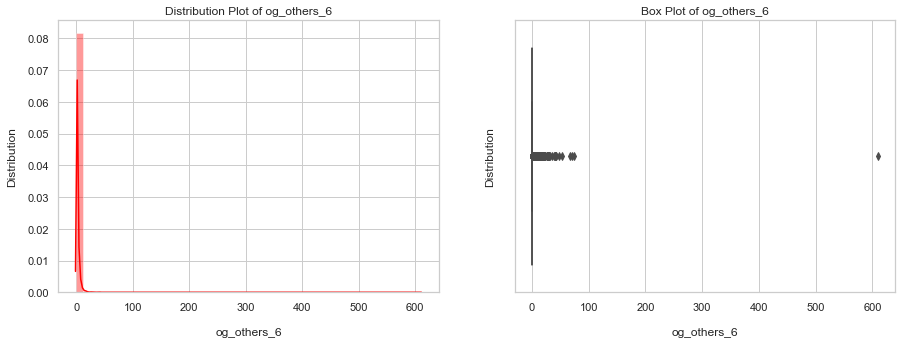

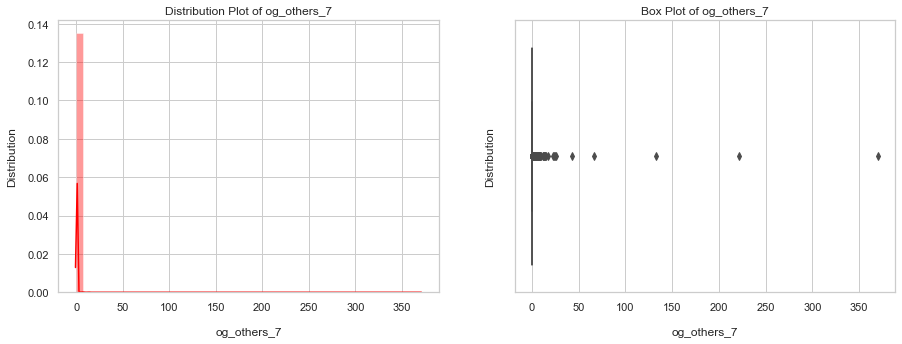

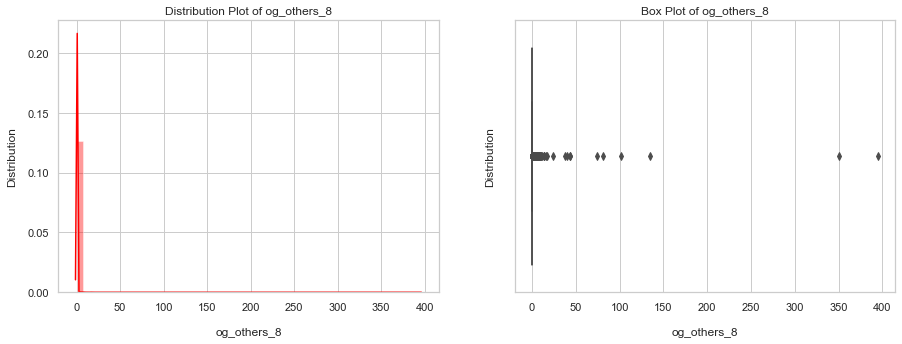

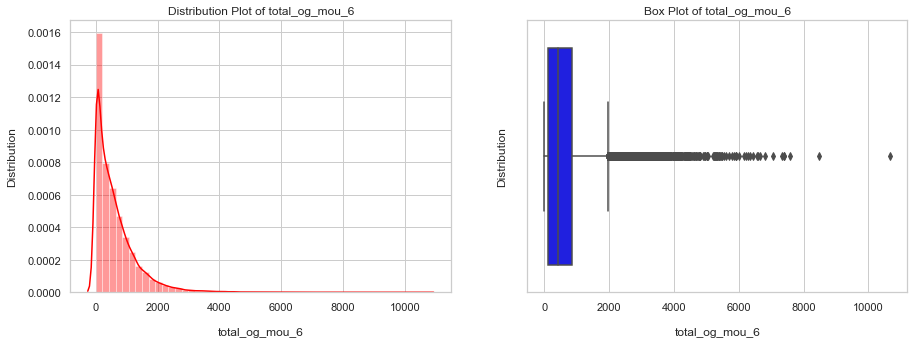

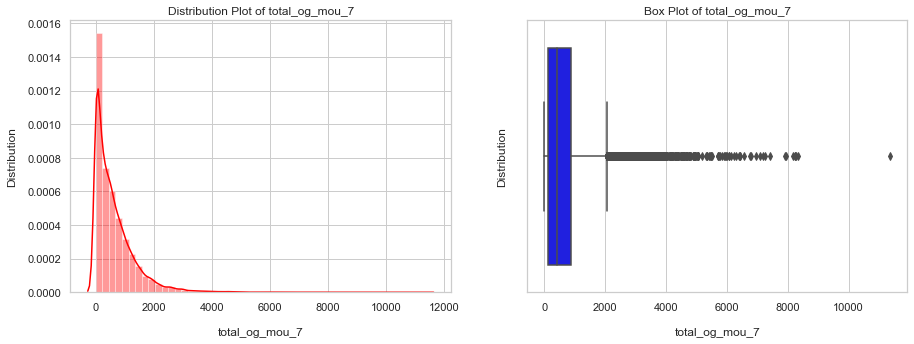

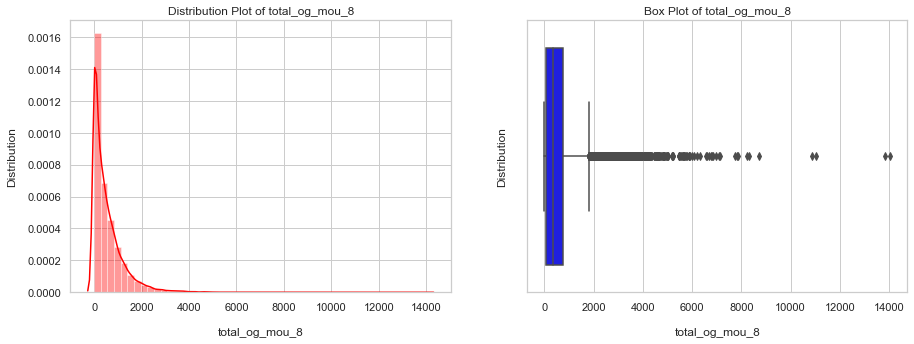

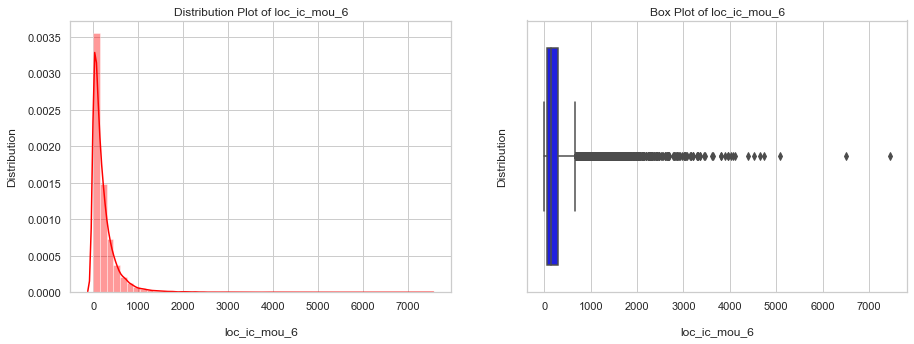

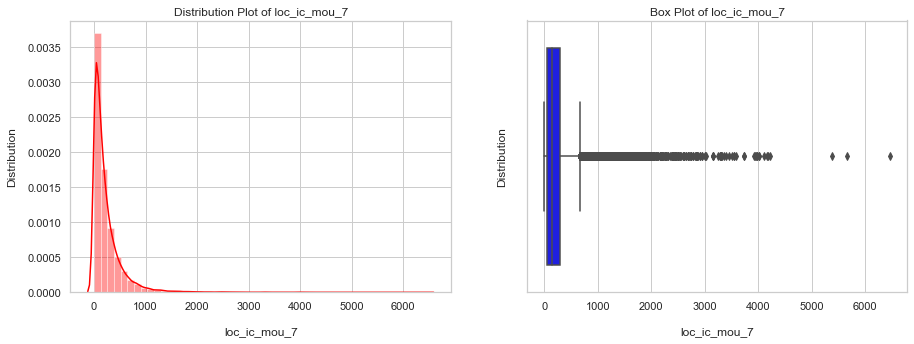

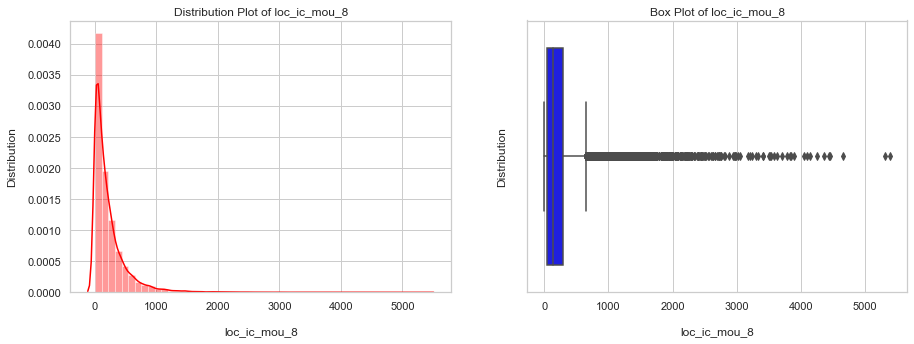

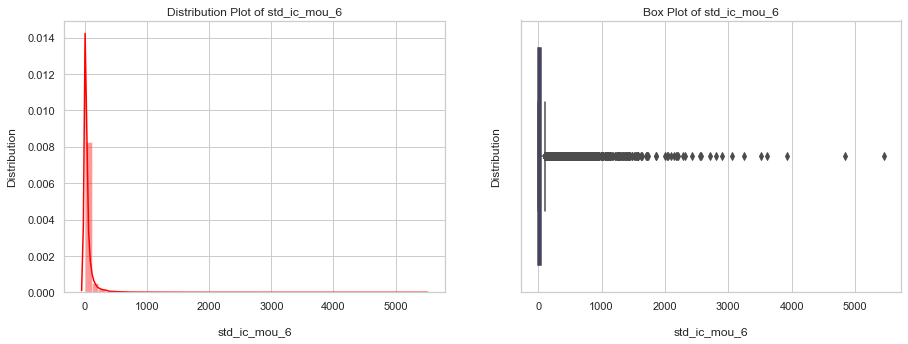

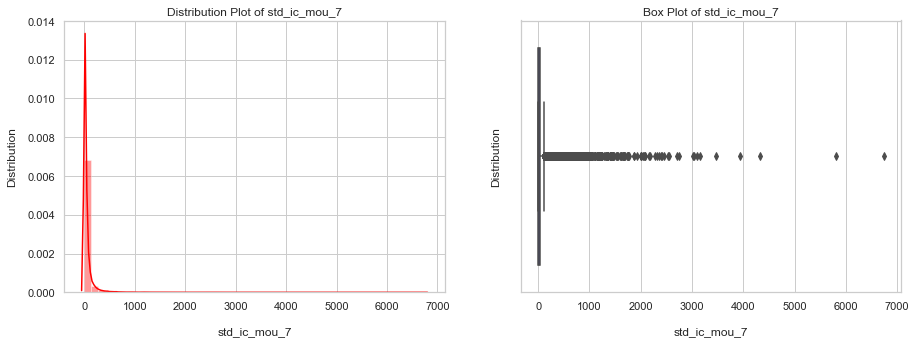

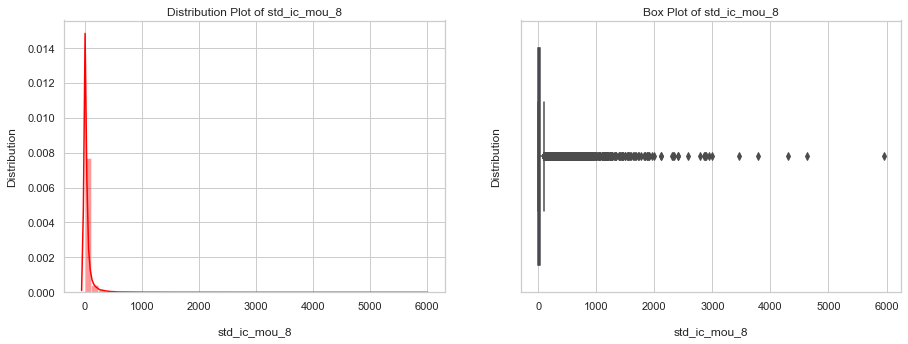

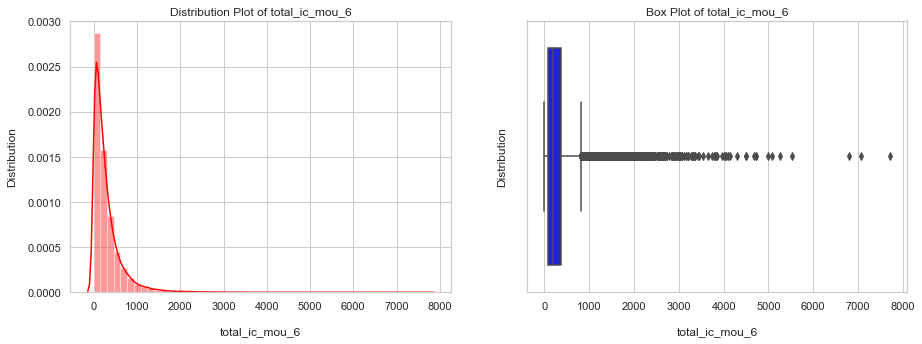

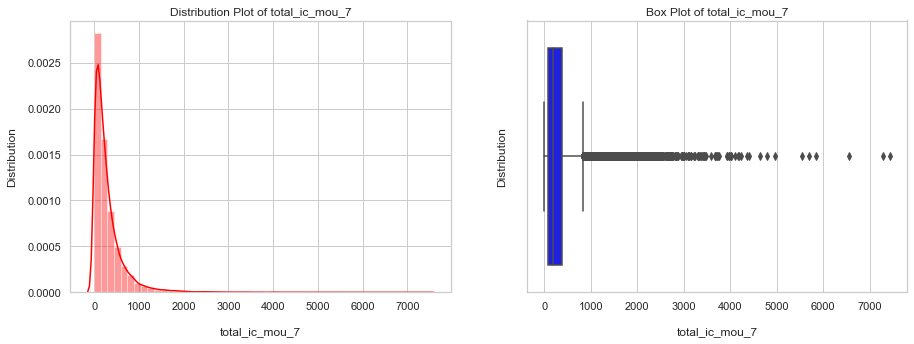

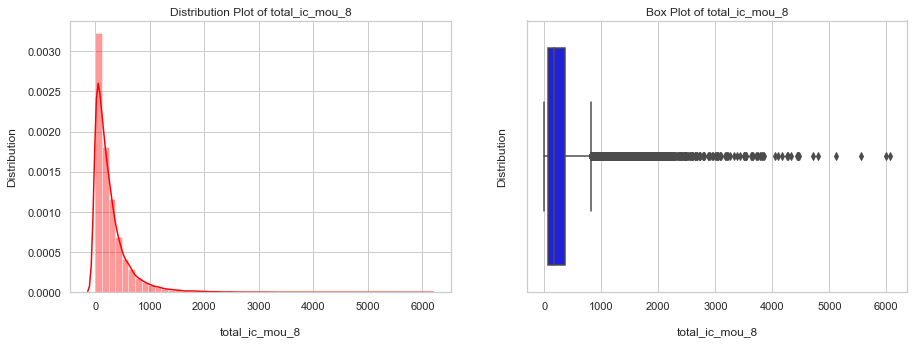

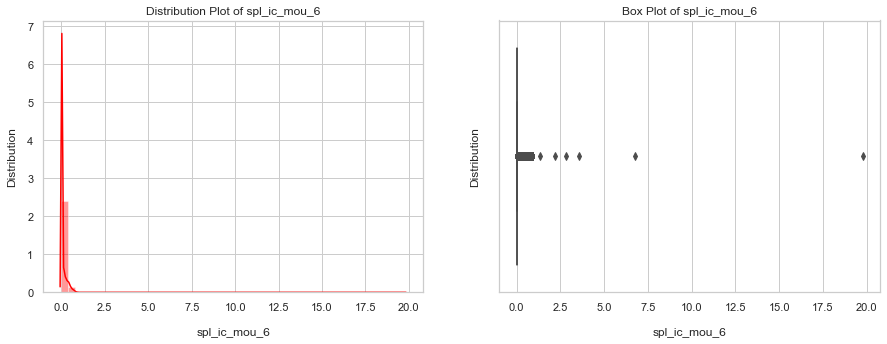

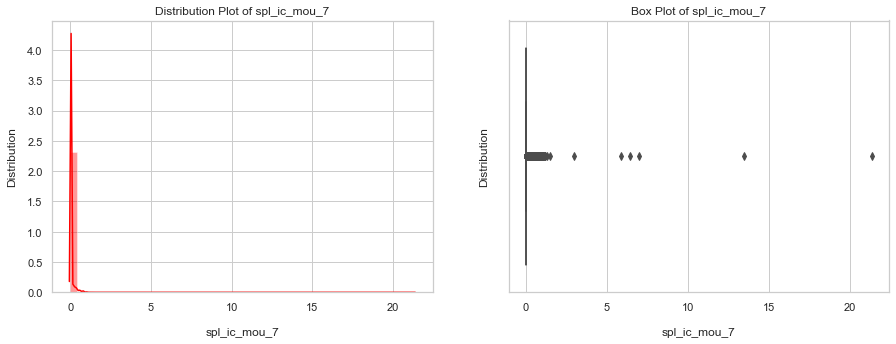

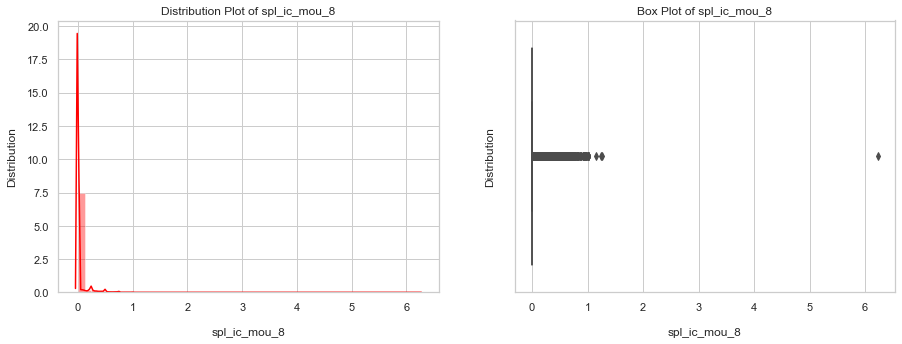

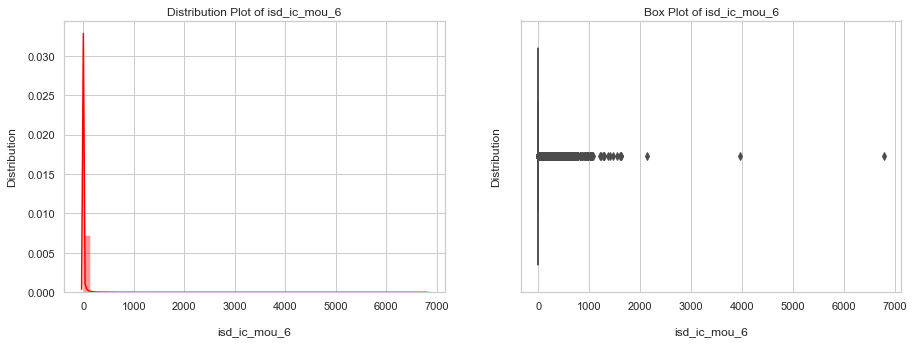

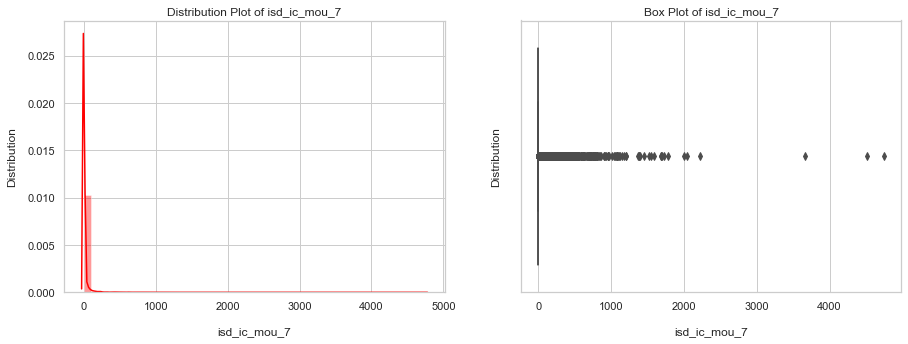

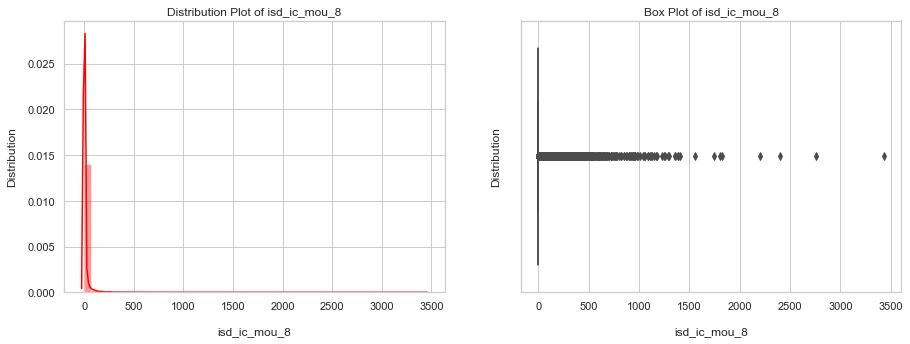

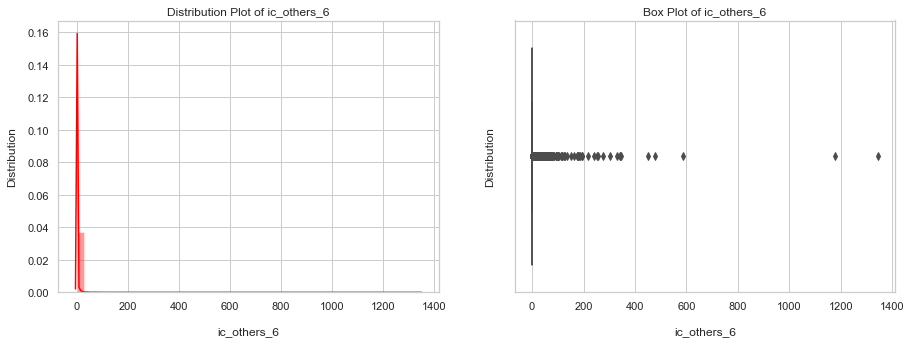

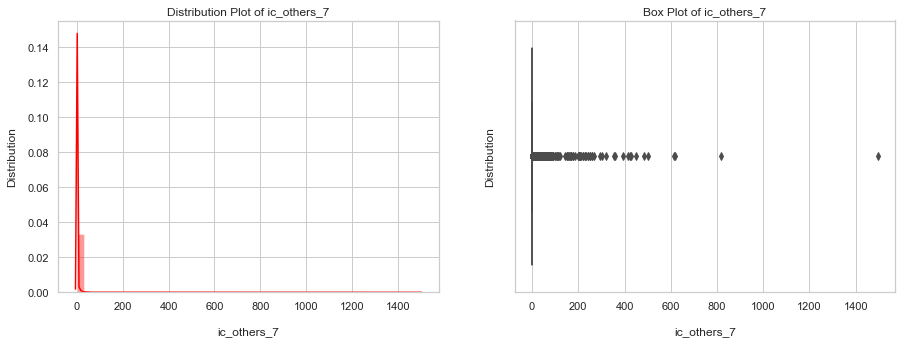

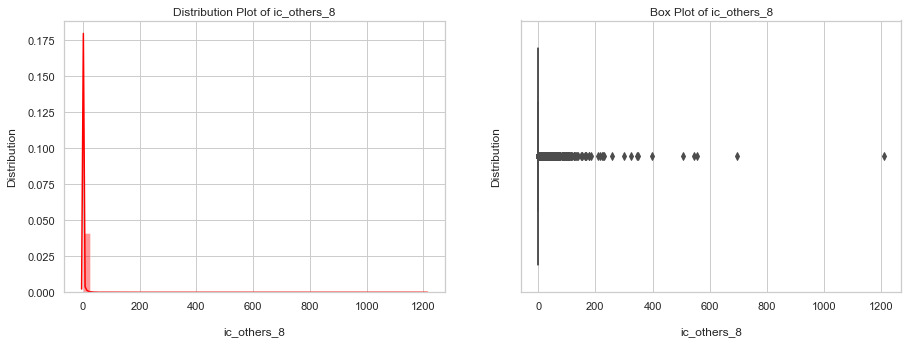

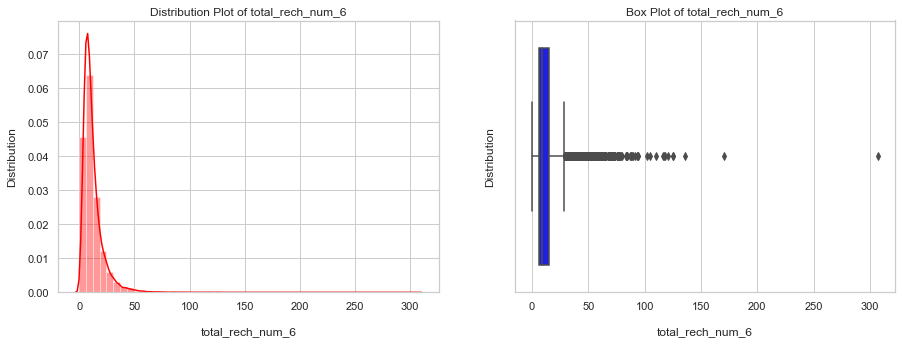

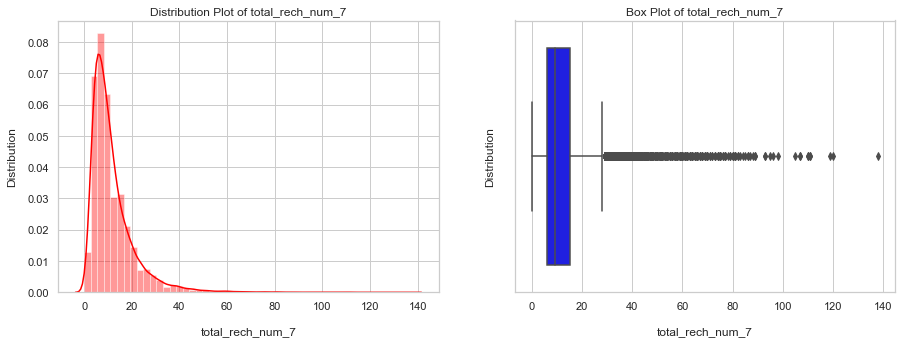

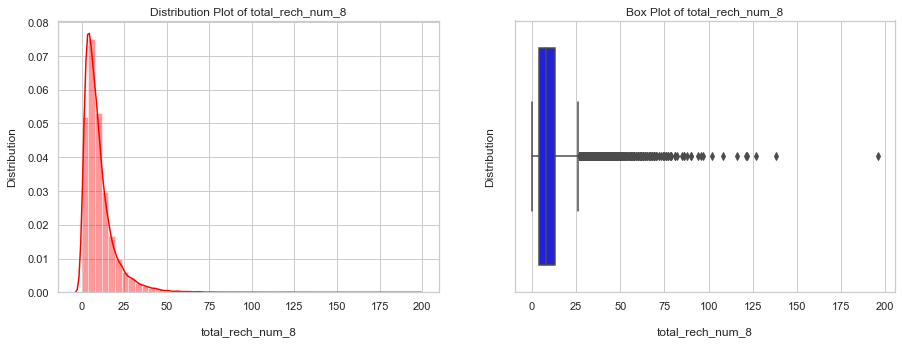

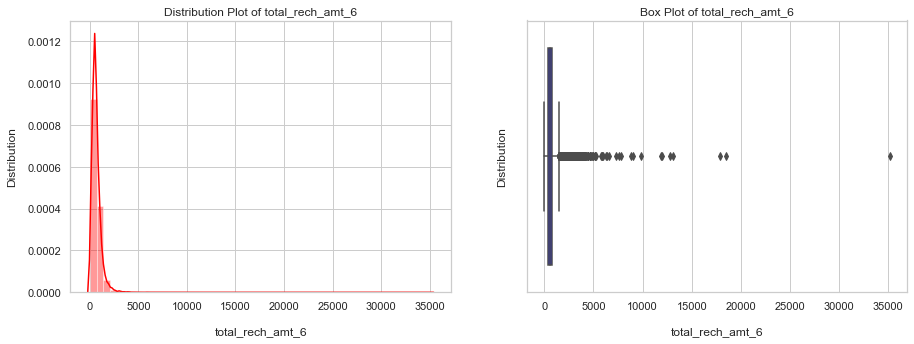

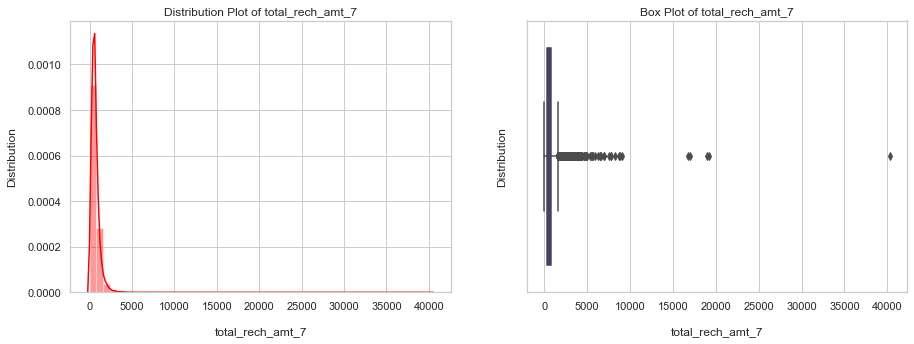

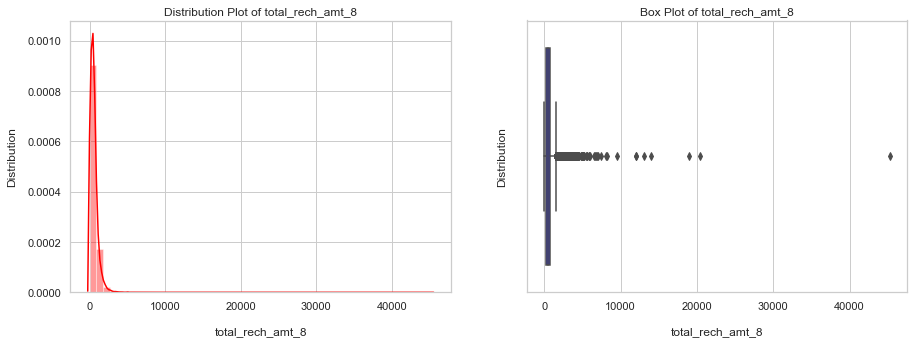

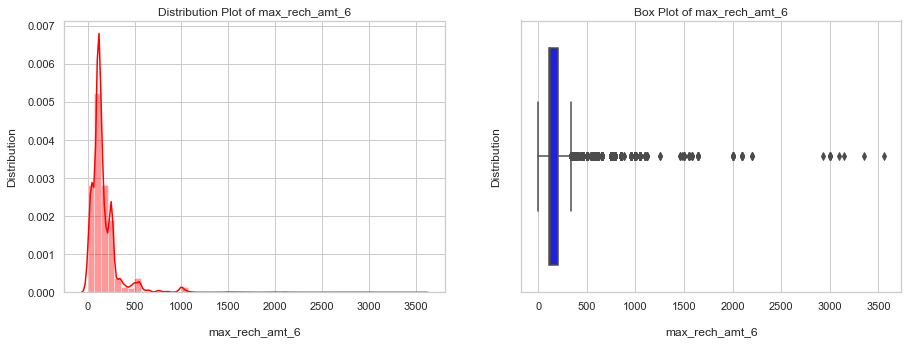

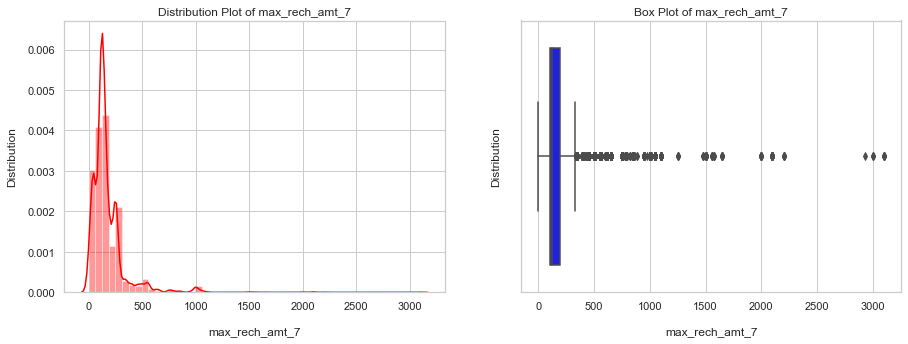

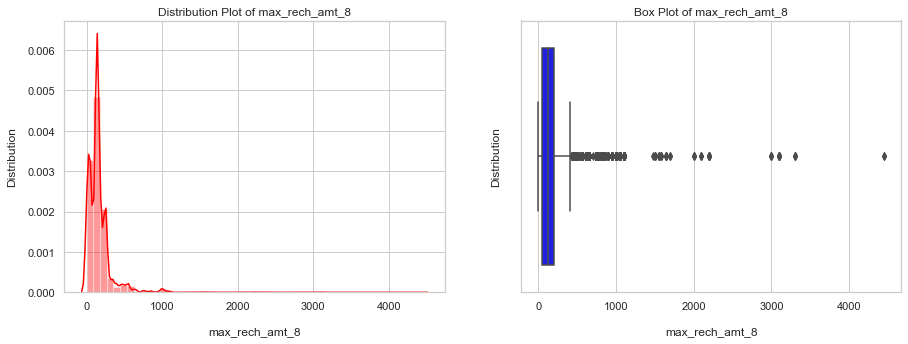

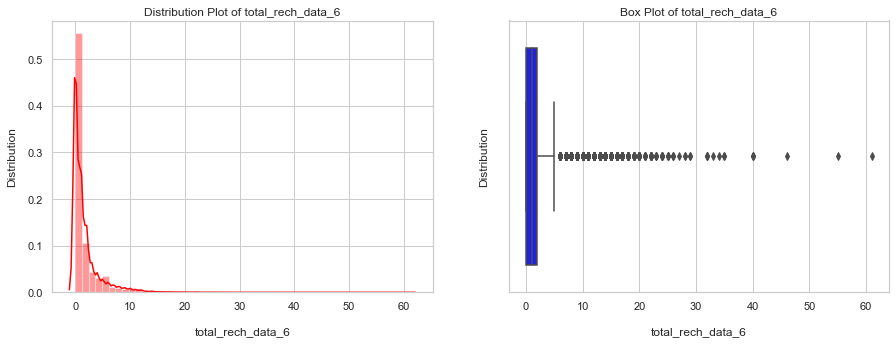

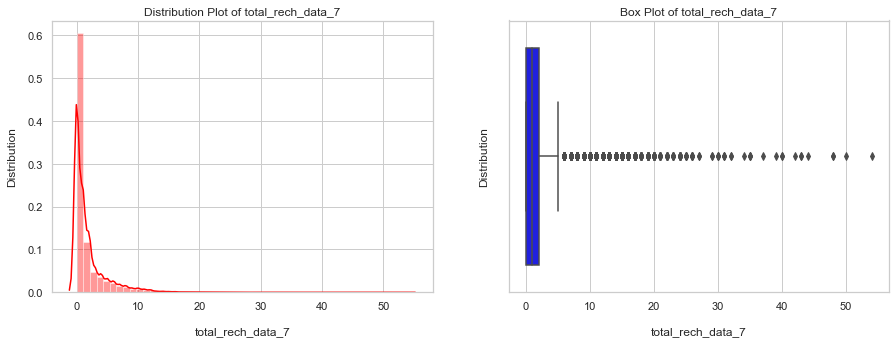

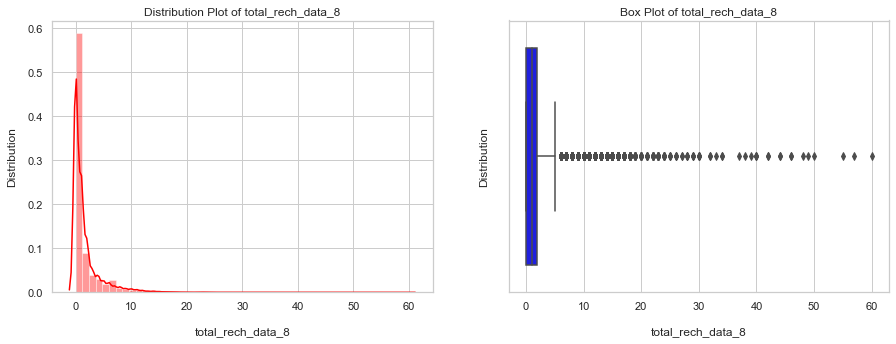

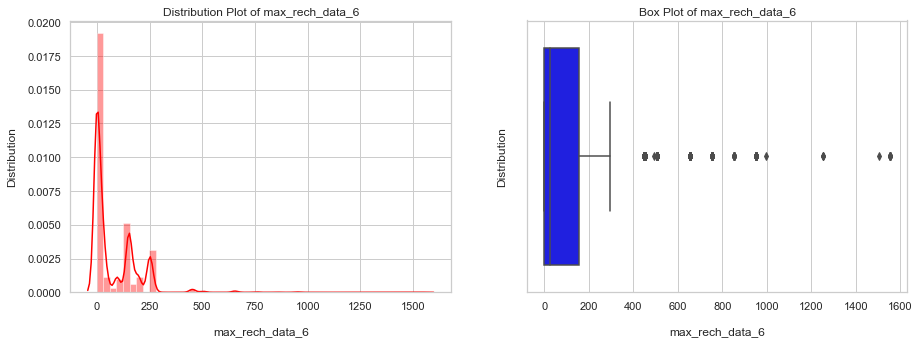

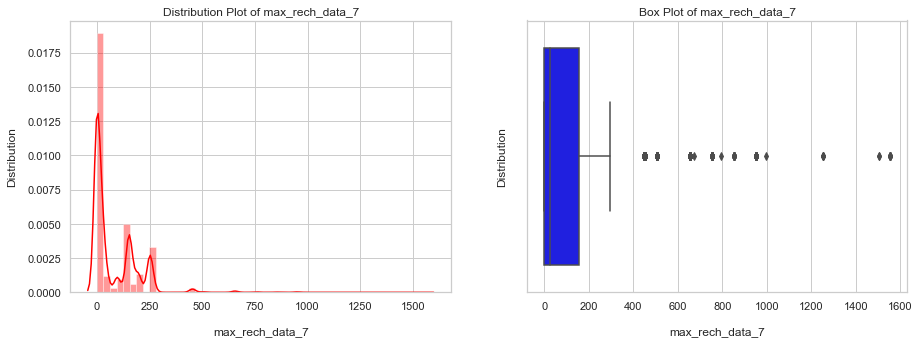

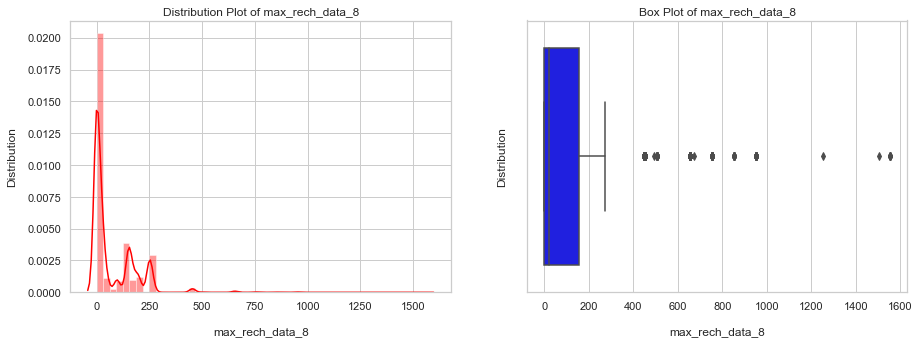

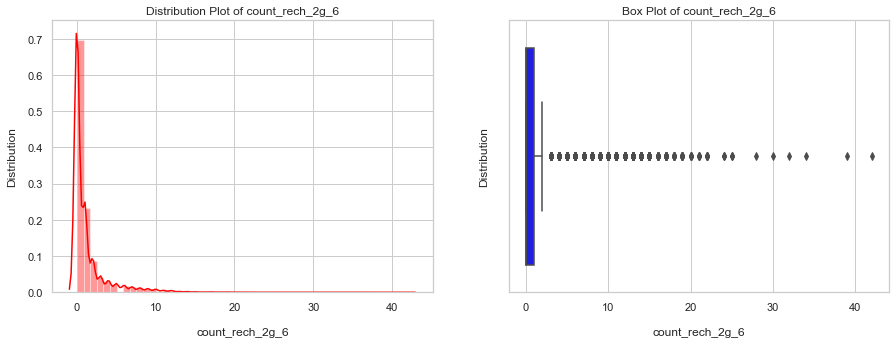

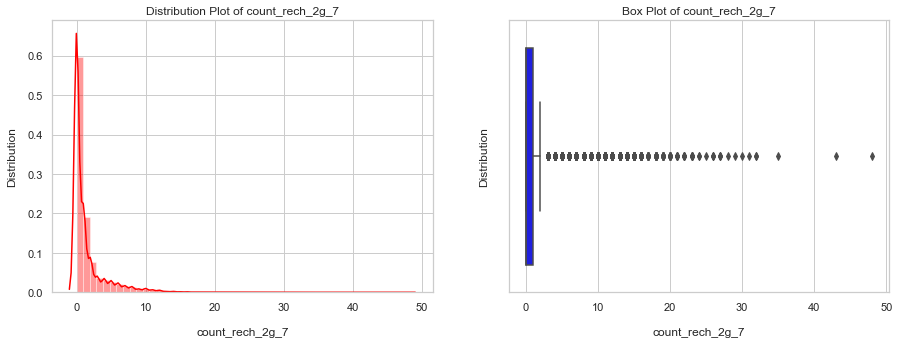

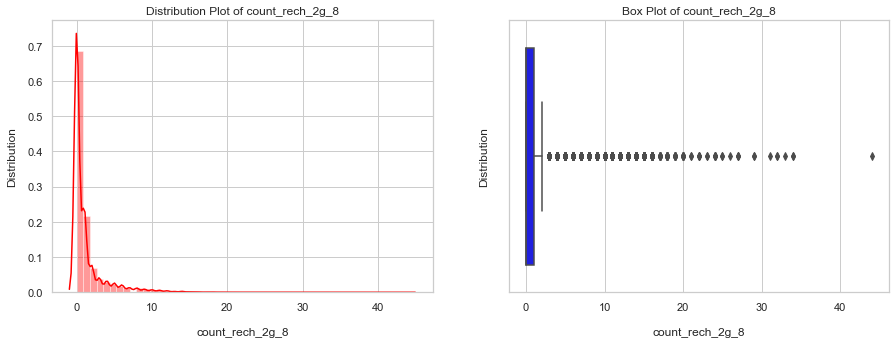

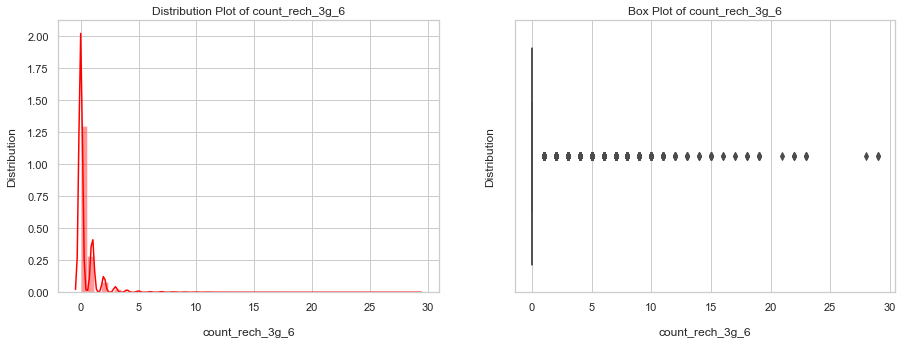

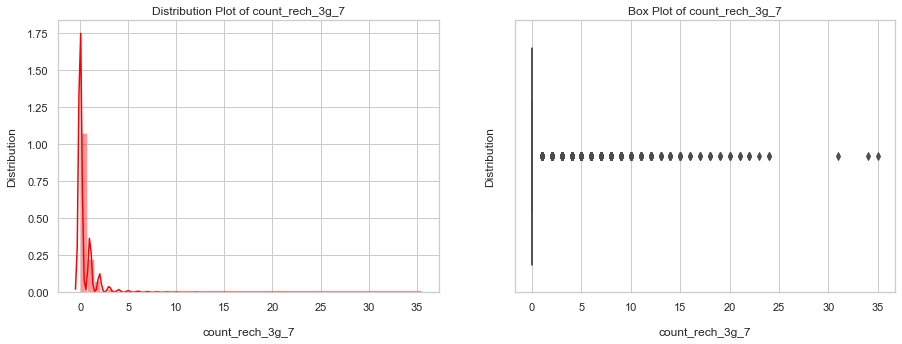

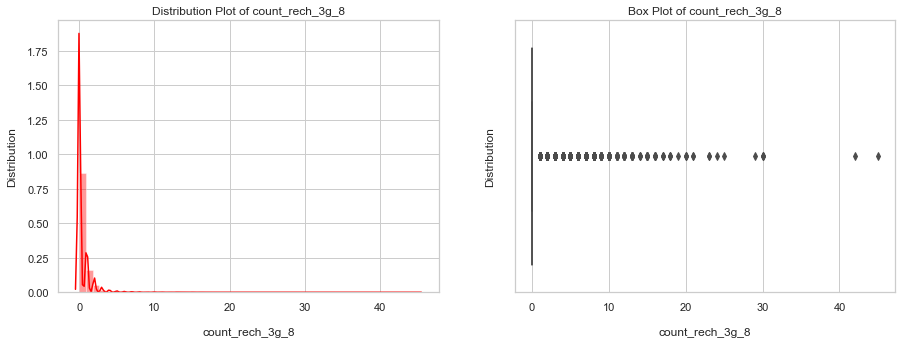

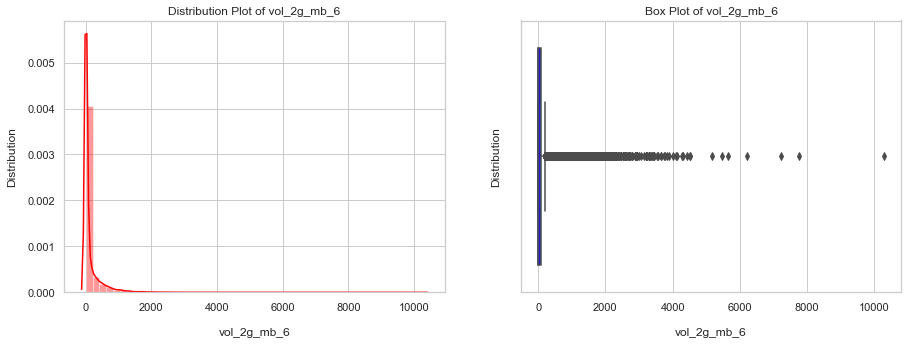

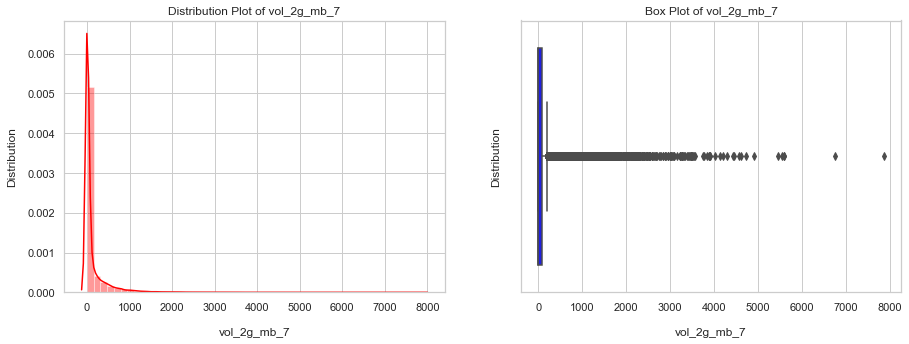

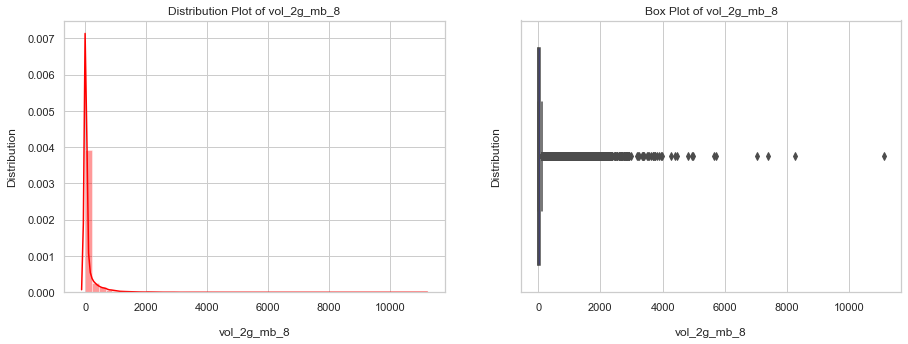

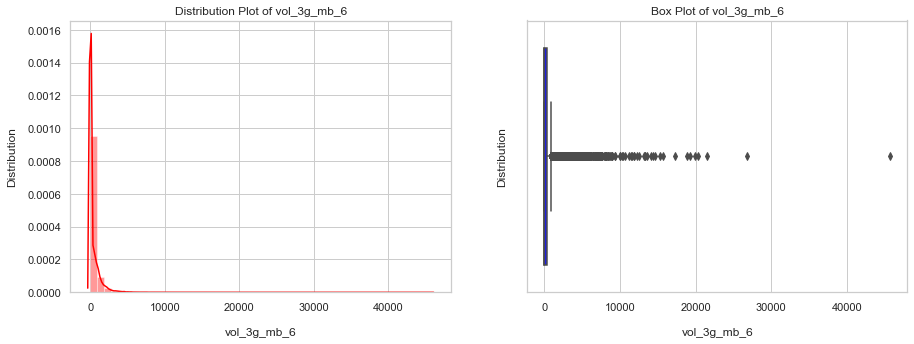

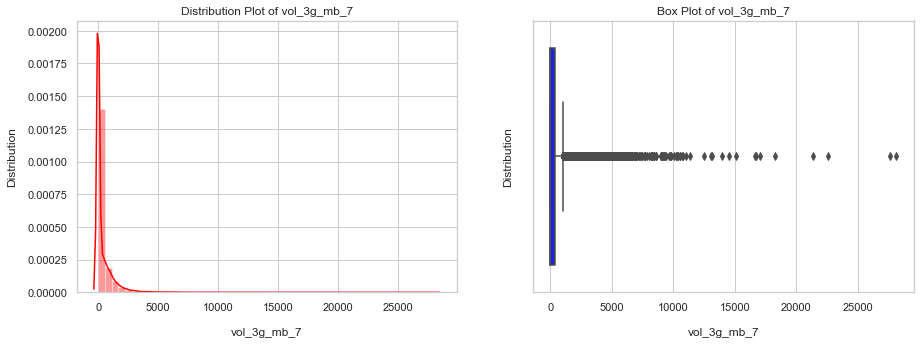

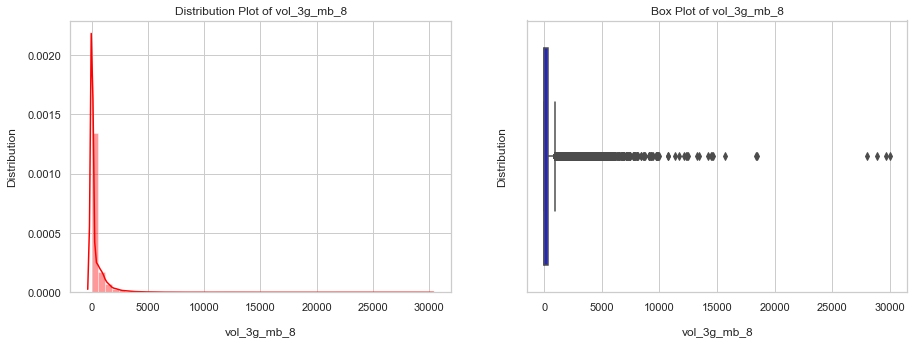

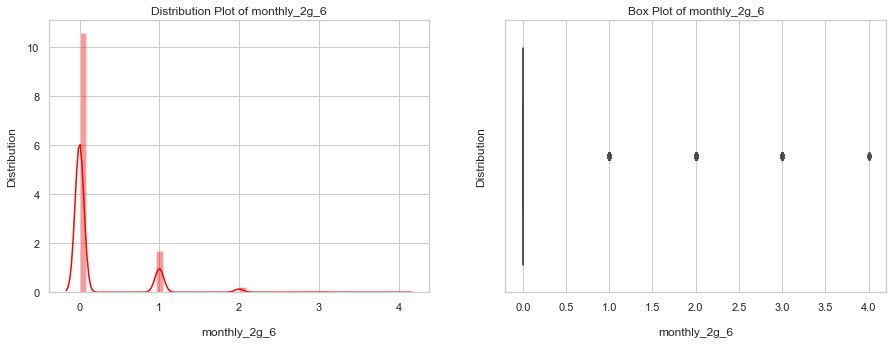

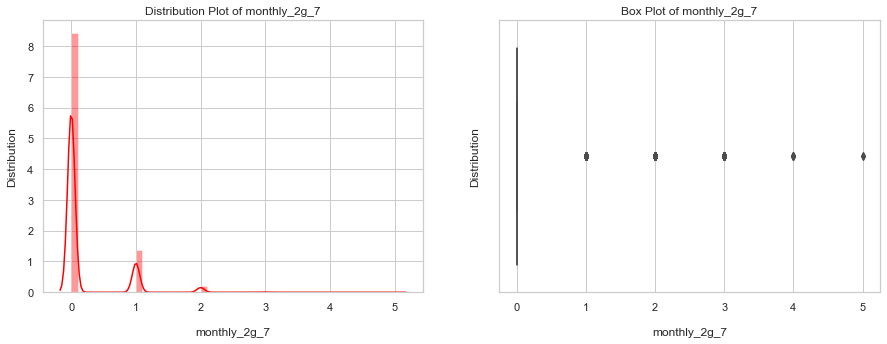

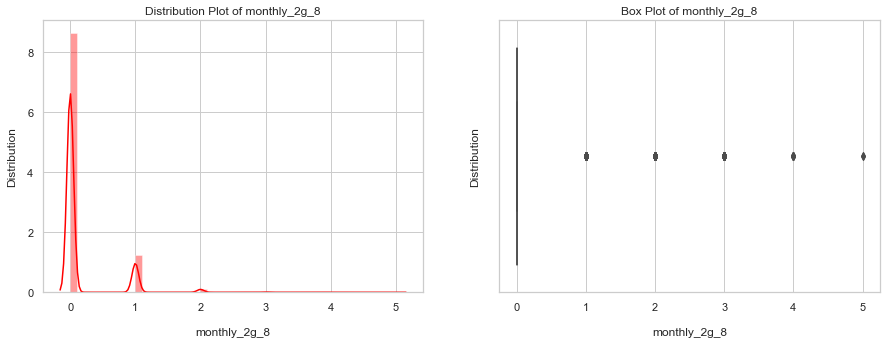

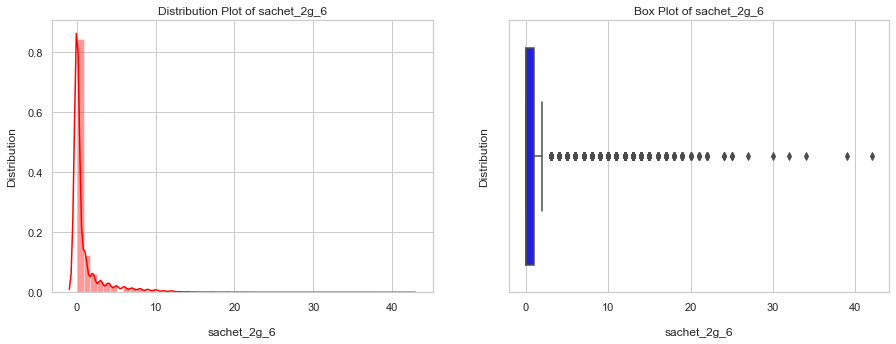

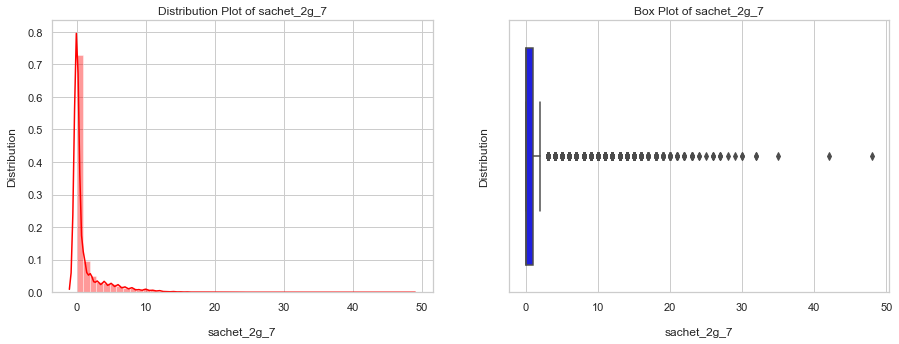

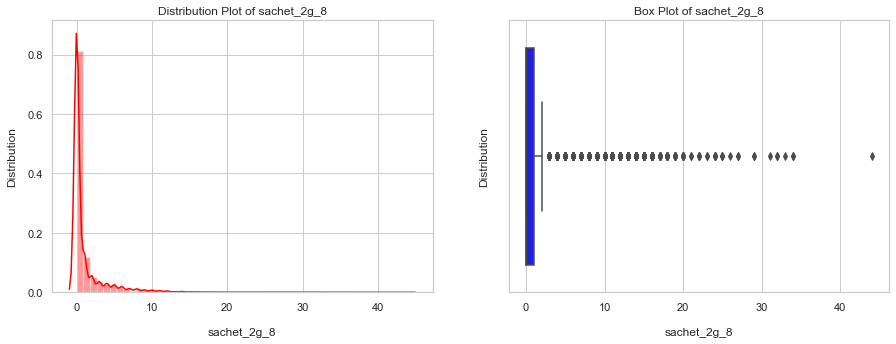

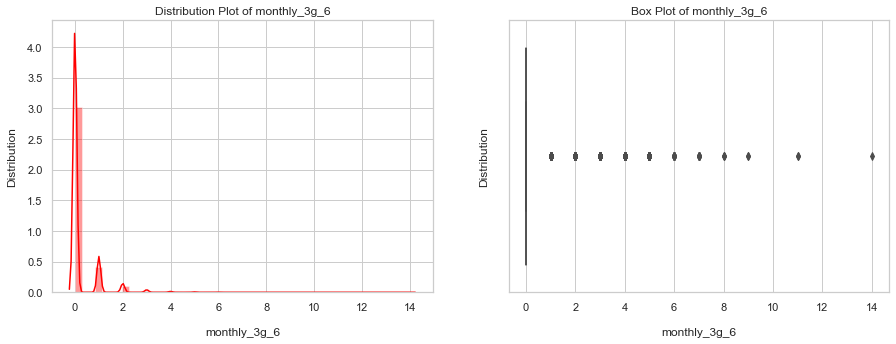

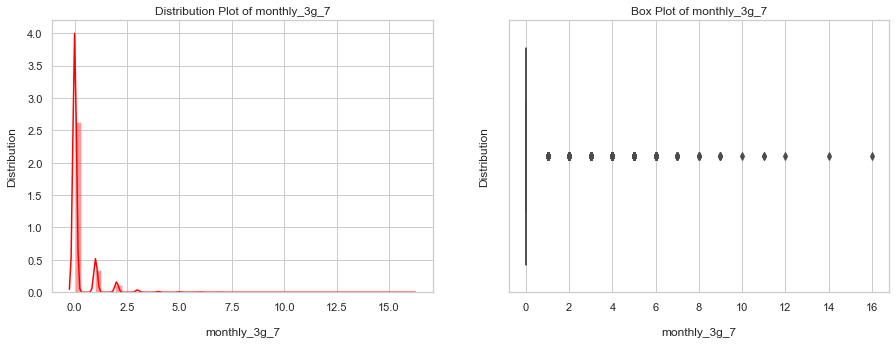

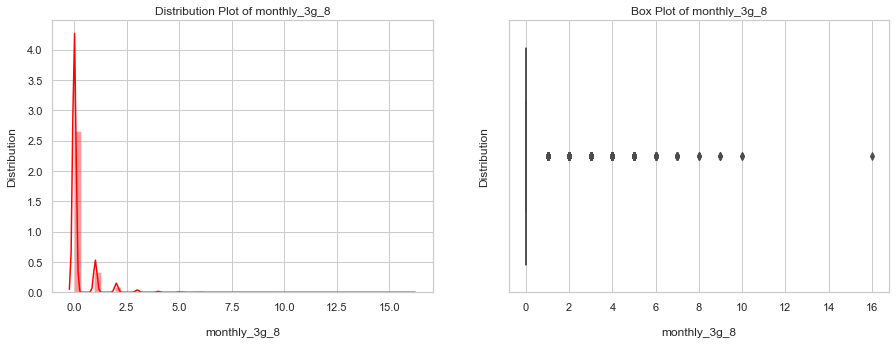

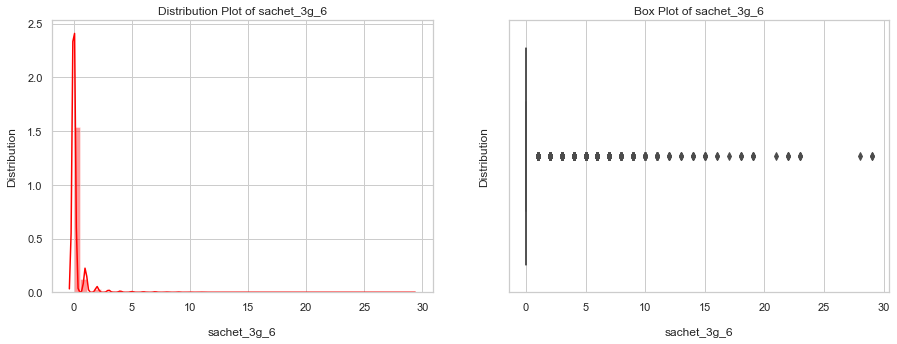

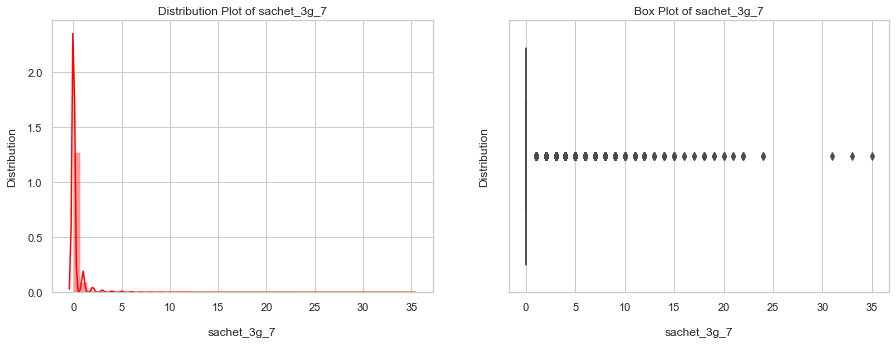

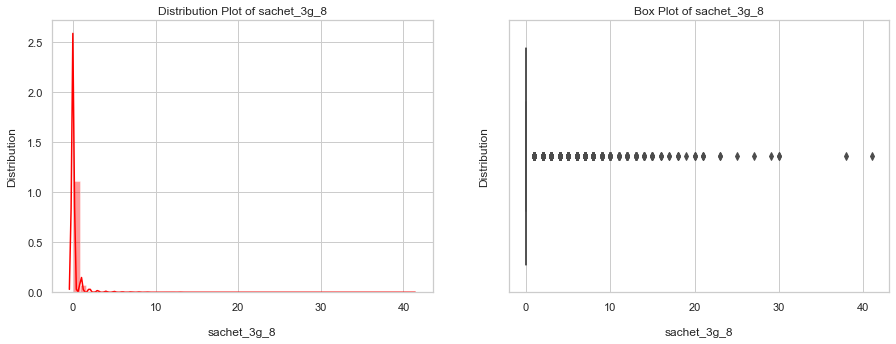

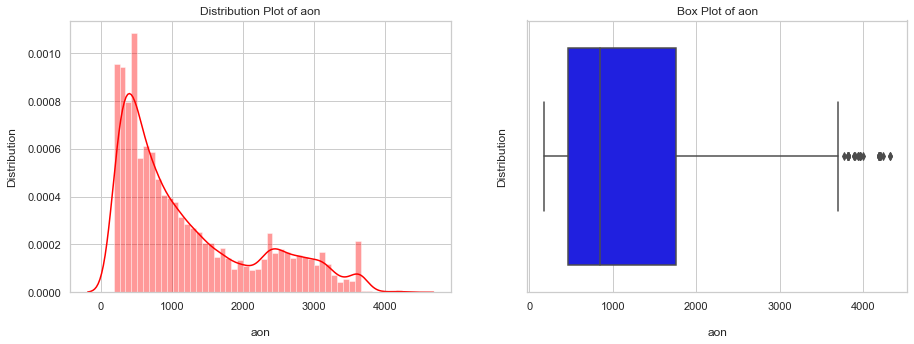

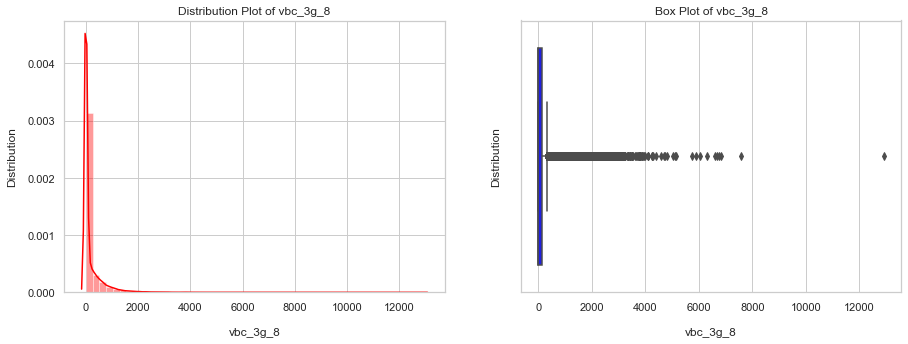

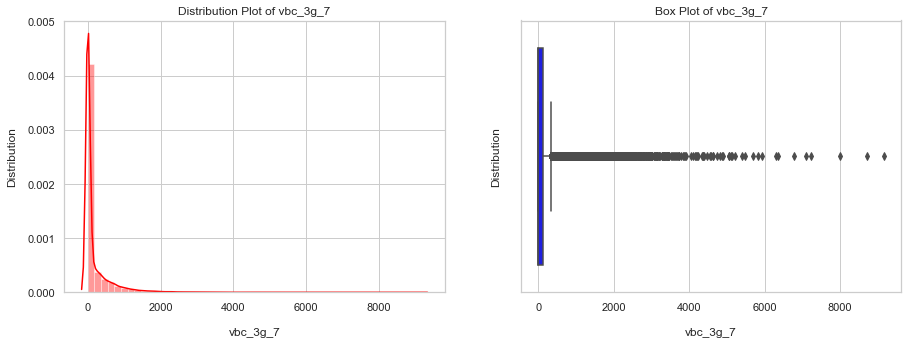

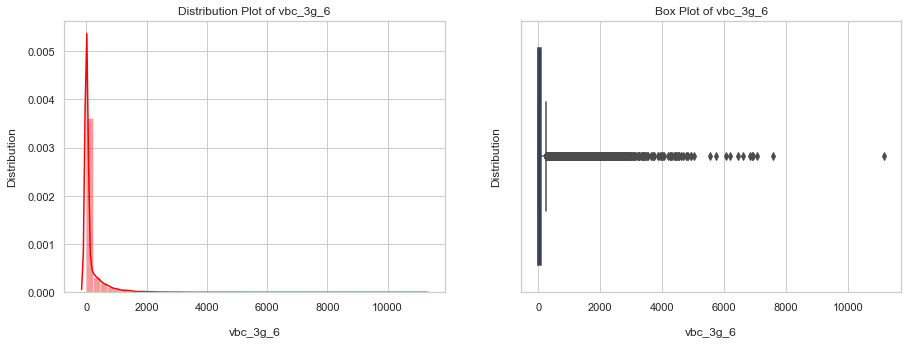

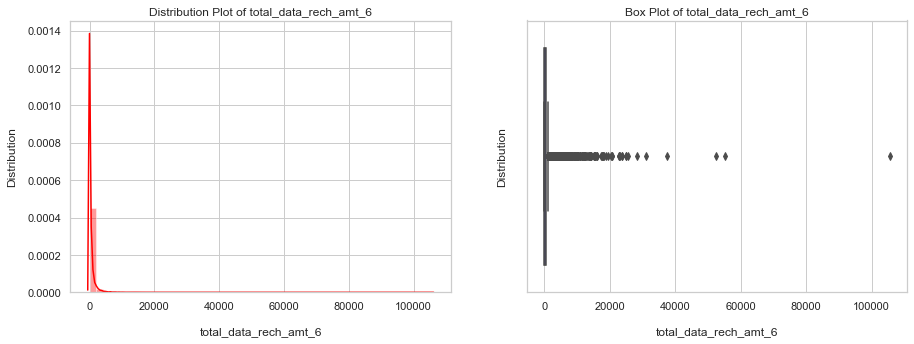

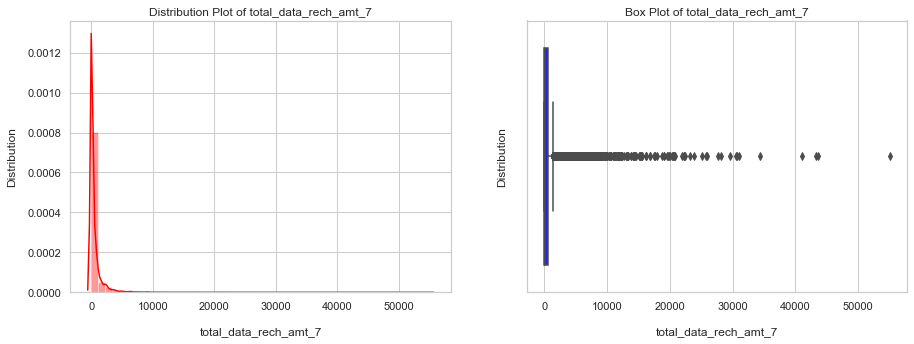

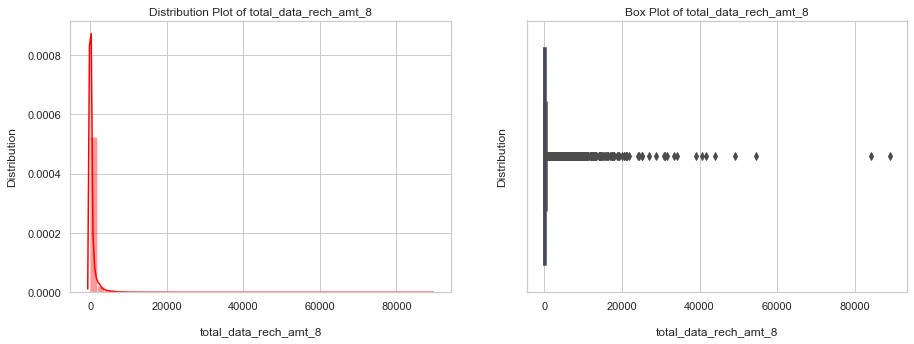

In [74]:
# Univariate Plot Analysis of Quantitative Variables

category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']                 
counter = 1

for col_list in telecom_churn.columns:
    
    if col_list not in category_list:
        
        # Call Custom Function
        plot_univariate(figsize_x = 15, figsize_y = 5, subplot_x = 1, subplot_y = 2, xlabel = col_list,  ylabel = "Distribution",
                         x_axis = col_list, data = telecom_churn,  wspace = 0.2)
        counter += 1    

**There are lot of Outliers present in the variables. We will remove these outliers by performaing normalization in the latter stage.**

## 4.6) Bivariate Analysis - Variables with hue = `churn`

###  Custom Function for Bivariate Analysis

In [75]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# y_axis                -      The series/variable to be plotted along the y-axis.

def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_churn, showfliers = False)
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_churn, showfliers = False)
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = telecom_churn, showfliers = False)
    # Call Custom Function
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

#### Bivariate Analysis


Data Visualization of churn vs arpu


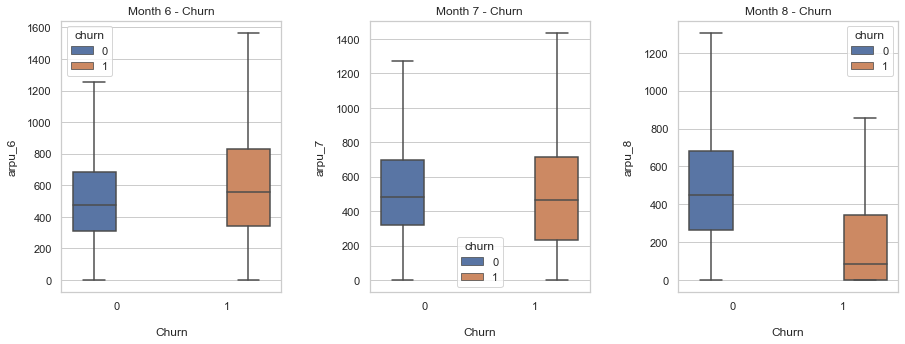


Data Visualization of churn vs onnet_mou


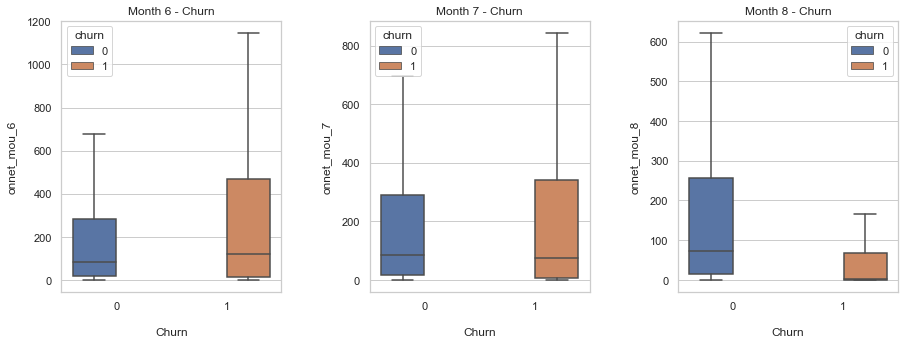


Data Visualization of churn vs offnet_mou


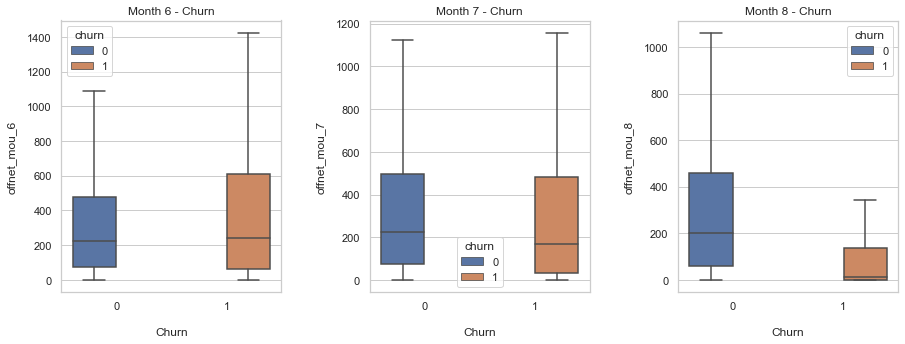


Data Visualization of churn vs total_og_mou


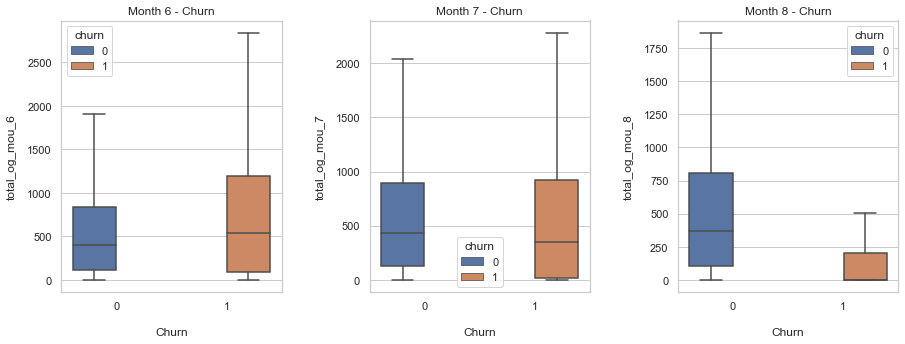


Data Visualization of churn vs total_ic_mou


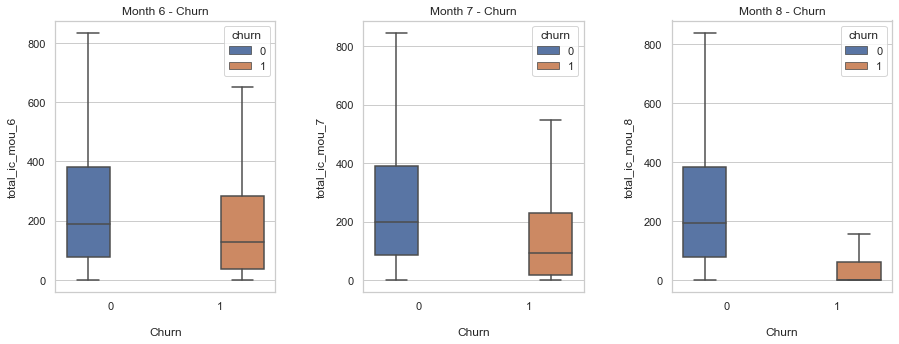


Data Visualization of churn vs total_rech_num


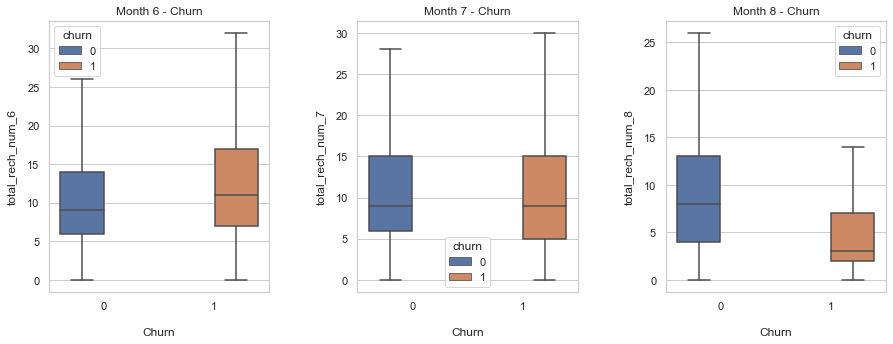


Data Visualization of churn vs total_rech_amt


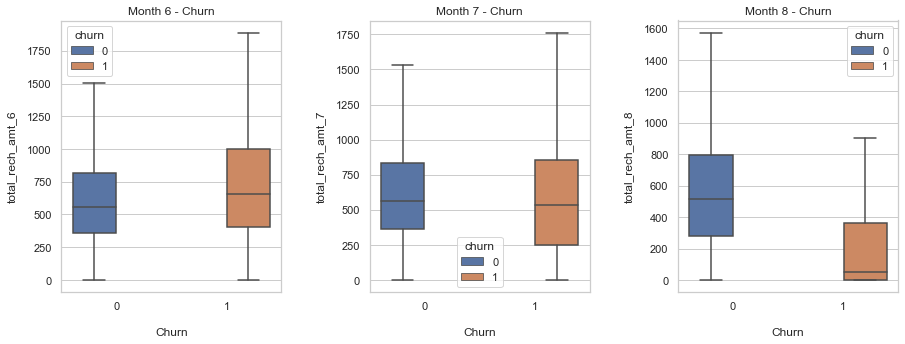


Data Visualization of churn vs total_rech_data


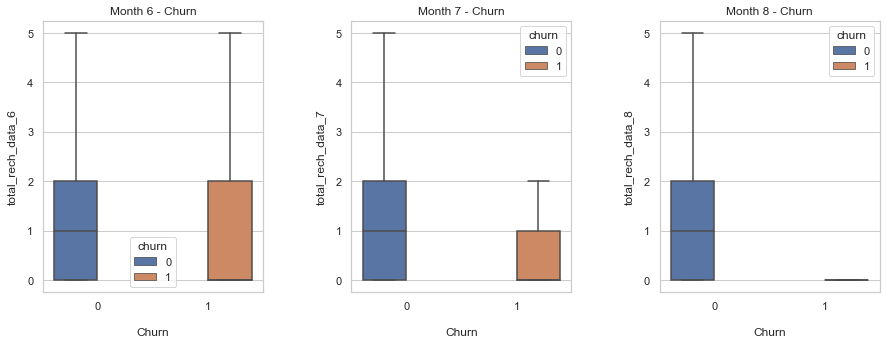


Data Visualization of churn vs vol_2g_mb


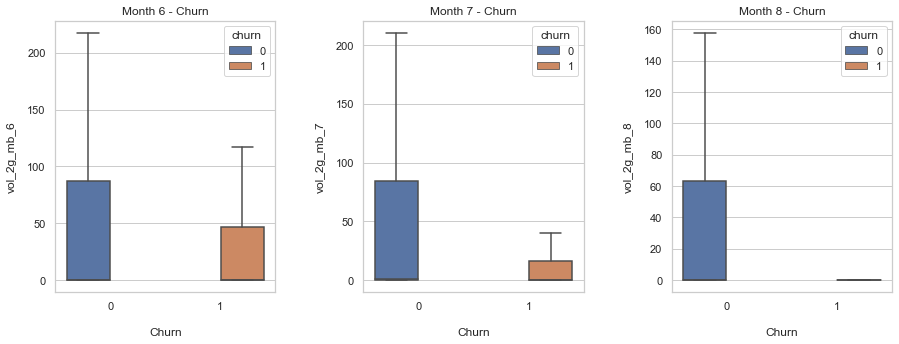


Data Visualization of churn vs vol_3g_mb


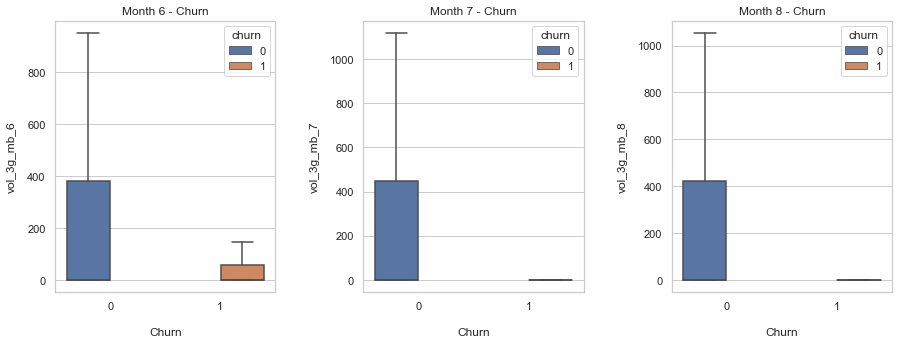


Data Visualization of churn vs vbc_3g


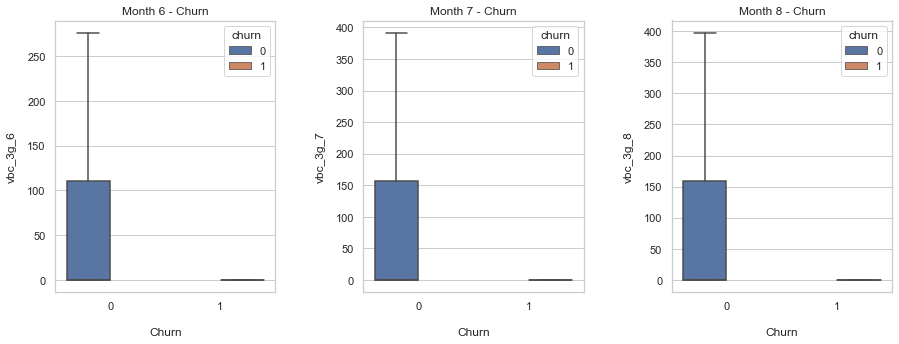


Data Visualization of churn vs total_data_rech_amt


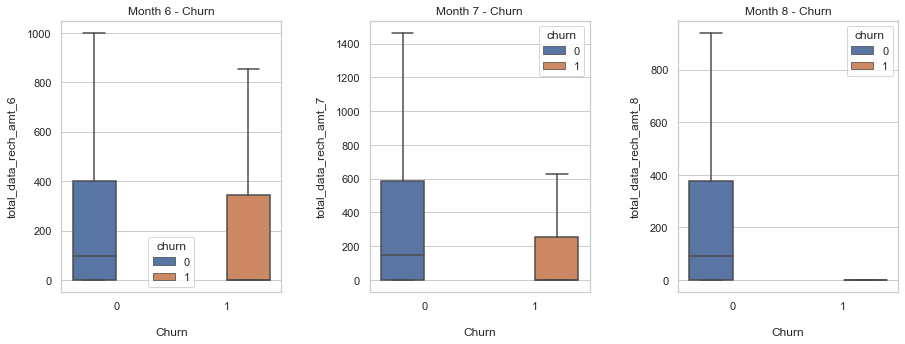

In [76]:
plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")

**There is a significant drop in the columns for data in 8th month for churned customers.**

## 4.7) Multivariate Analysis - Quantitative Variables

### A) Correlation Matrix

In [77]:
telecom_churn.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  total_rech_data_6  total_rech_data_7  total_rech_data_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8       aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_data_rech_amt_6  total_data_rech_amt_7  total_data_rech_amt_8     churn
arpu_6                 1.000000  0.682003  0.619778     0.343885     0.218888     0.190011      0.515151      0.344861      0.293097       0.126446       0.084451       0.091188       0.193762       0.144104       0.125665      0.332272      0.250254      0.228189      0.389018      0.233674      0.187182      0.468214      0.423341      0.415527      0.122977      0.068927      0.045037     0.054344     0.024506     0.015547        0.560203        0.369345        0.309954      0.181510      0.142665      0.124397      0.124386      0.085947      0.079674        0.225125        0.169390        0.151226      0.030974     -0.034140     -0.011639      0.101627      0.063595      0.071179     0.016058     0.023974     0.012889          0.349319          0.136645          0.120199          0.955028          0.656232          0.611837        0.359418        0.270988        0.294987          -0.109153          -0.175949          -0.122931         0.072176        -0.021185         0.025441        -0.166031        -0.209324        -0.162884         0.090724         0.020739         0.035218    -0.063367    -0.099363    -0.078459     0.153220     0.071096     0.085465          0.014389         -0.005108          0.009911     -0.039621     -0.084621     -0.061778    -0.158811    -0.194619    -0.153057      0.177047      0.082135      0.104428    -0.002592    -0.025222    -0.017707  -0.121993  -0.198300  -0.141476  0.041807  0.059760  0.055983  0.112693               0.089954              -0.023367               0.003365  0.067199
arpu_7                 0.682003  1.000000  0.767143     0.212713     0.321003     0.270779      0.355968      0.492669      0.397986       0.092642       0.093467       0.093837       0.134787       0.180120       0.152270      0.215675      0.305336      0.256323      0.250161      0.382571      0.306308      0.420003      0.511164      0.454754      0.068380      0.115440      0.070322     0.018084     0.026200     0.017888        0.368902        0.538390        0.431726      0.109477      0.165308      0.143613      0.087636      0.123759      0.116897        0.140187        0.211376        0.184371      0.007778     -0.015937     -0.007898      0.059973      0.100083      0.082853     0.008028     0.023994     0.016718          0.166367          0.303032          0.219739          0.683232          0.953983          0.757663        0.267926        0.392793        0.375124          -0.165607          -0.096183         

### B) HeatMap

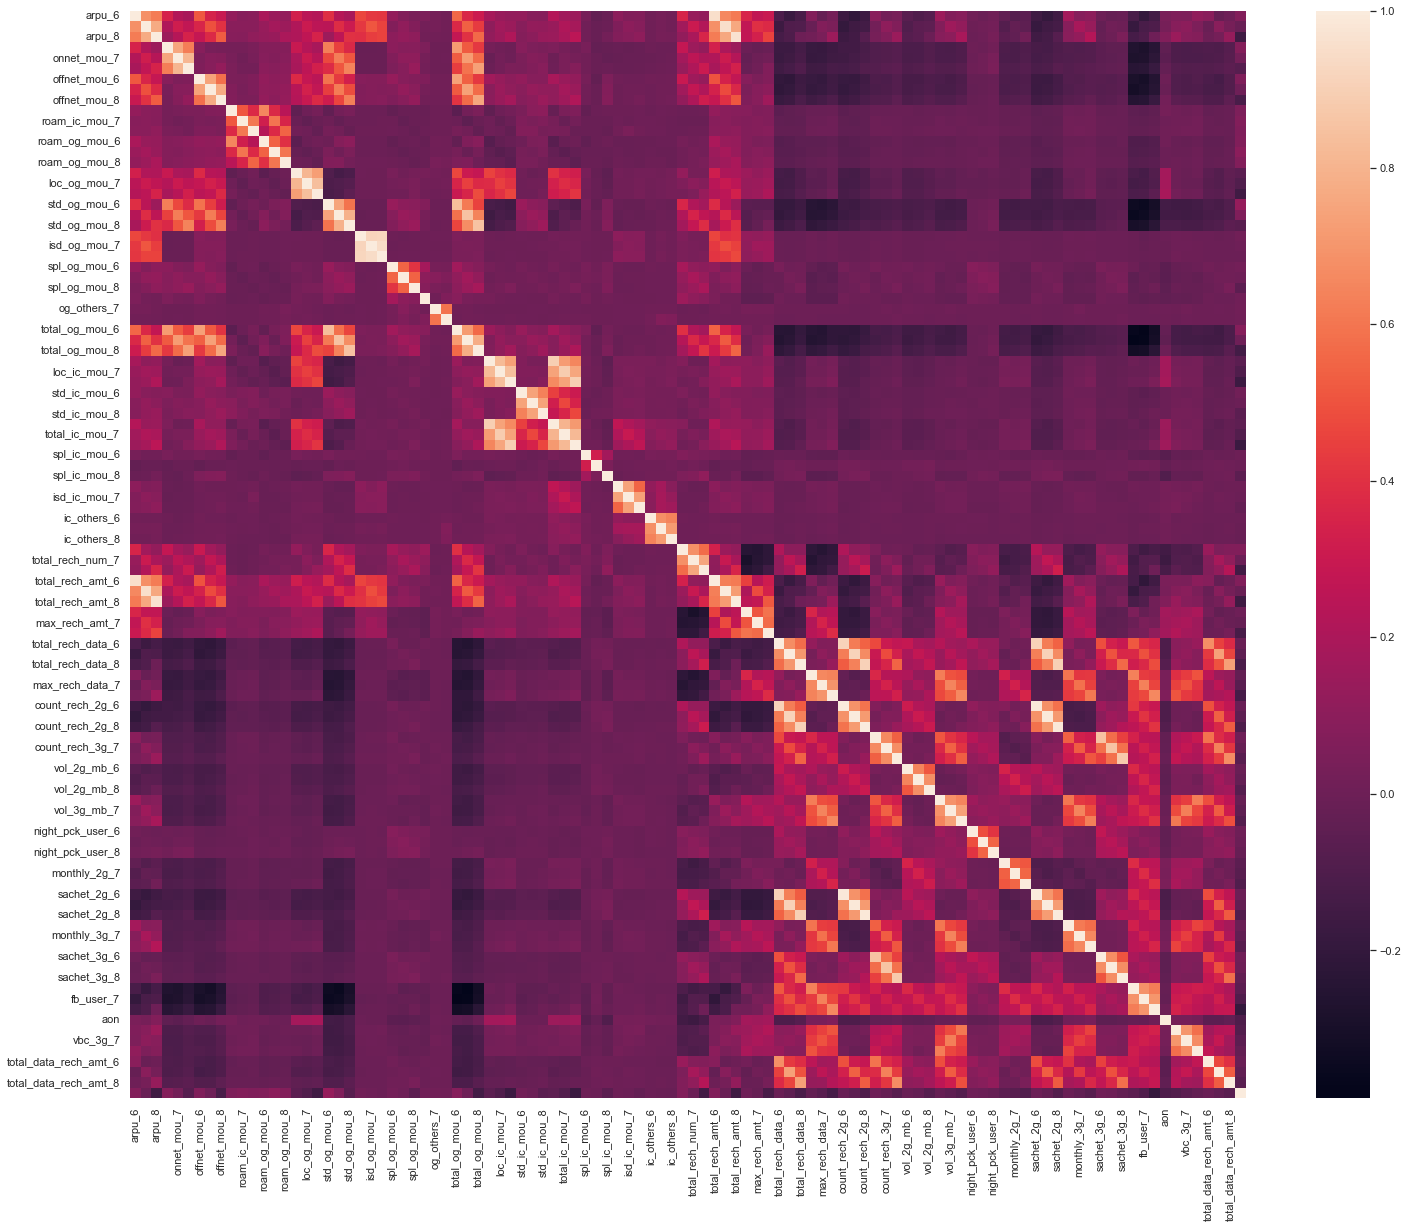

In [78]:
plt.figure(figsize = (25, 20))

sns.heatmap(telecom_churn.corr())

plt.show()

Now from the above **correlation matrix** we can see there are some **highly correlated features**. Lets try to extract such highly correlated features.

In [79]:
corr_matrix = telecom_churn.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['onnet_mou_8', 'loc_og_mou_7', 'loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  25


### Data Insight 6

- There are many features that are highly correlated.

- Total of 25 features with a correlation > 0.80

Note -
**We will keep these highly correlated features for now. As we will be performing Principal Component Analysis in a later section these should get dropped automatically!**

### C) Features Correlation with Churn

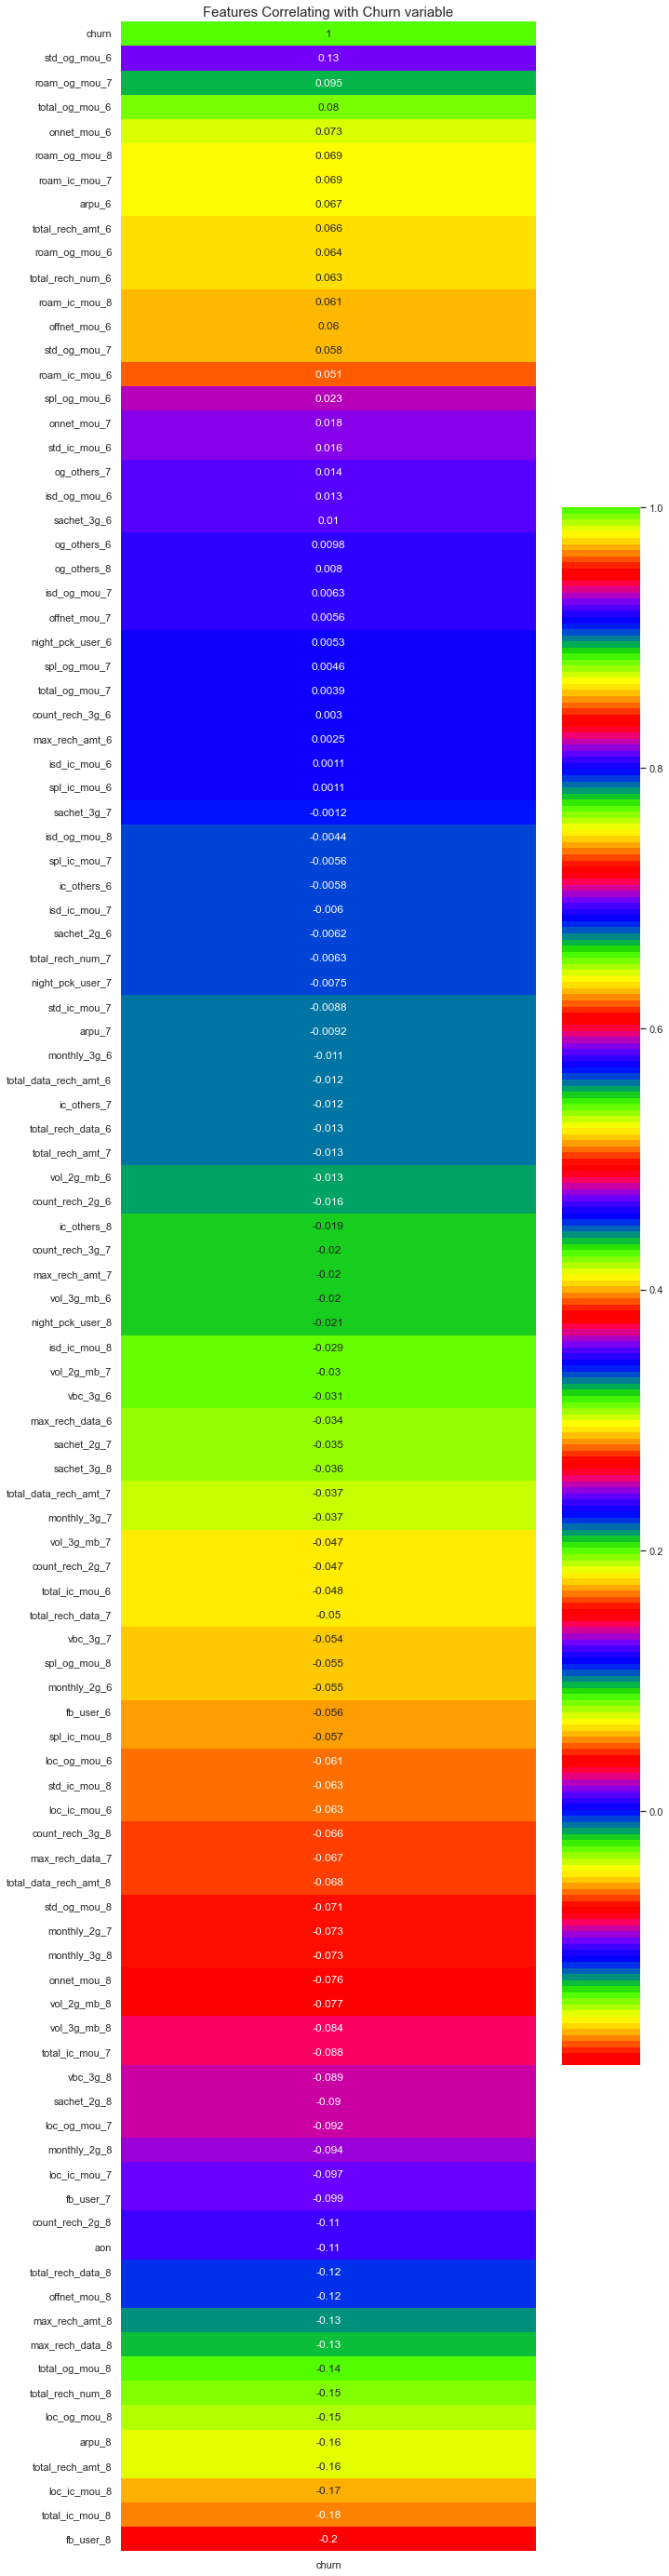

In [80]:
# Checking Correlation between target variable(Churn) with the other variable in the dataset

plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_churn.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='prism')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)
plt.show()

**Inference:**
- Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
- Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

# <center> Step-4: FEATURE ENGINEERING

### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :


- **`The ‘good’ phase`**: In this phase, the customer is happy with the service and behaves as usual.


- **`The ‘action’ phase`**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)


- **`The ‘churn’ phase`**: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.


In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### Custom Function to derive new good phase columns and drop the original columns

In [81]:
# Custom Function to derive new good phase columns and drop the original columns

def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

###  Derive Good and Action Phase Variables

In [82]:
# Derive Good and Action Phase Variables

telecom_churn = derive_good_action_phase(telecom_churn, "arpu")

telecom_churn = derive_good_action_phase(telecom_churn, "onnet_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "offnet_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "roam_ic_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "roam_og_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "loc_og_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "std_og_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "isd_og_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "spl_og_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "og_others")

telecom_churn = derive_good_action_phase(telecom_churn, "total_og_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "loc_ic_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "std_ic_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "spl_ic_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "isd_ic_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "ic_others")

telecom_churn = derive_good_action_phase(telecom_churn, "total_ic_mou")

telecom_churn = derive_good_action_phase(telecom_churn, "total_rech_num")

telecom_churn = derive_good_action_phase(telecom_churn, "total_rech_amt")

telecom_churn = derive_good_action_phase(telecom_churn, "max_rech_amt")

telecom_churn = derive_good_action_phase(telecom_churn, "total_rech_data")

telecom_churn = derive_good_action_phase(telecom_churn, "max_rech_data")

telecom_churn = derive_good_action_phase(telecom_churn, "count_rech_2g")

telecom_churn = derive_good_action_phase(telecom_churn, "count_rech_3g")

telecom_churn = derive_good_action_phase(telecom_churn, "vol_2g_mb")

telecom_churn = derive_good_action_phase(telecom_churn, "vol_3g_mb")

telecom_churn = derive_good_action_phase(telecom_churn, "monthly_2g")

telecom_churn = derive_good_action_phase(telecom_churn, "sachet_2g")

telecom_churn = derive_good_action_phase(telecom_churn, "monthly_3g")

telecom_churn = derive_good_action_phase(telecom_churn, "sachet_3g")

telecom_churn = derive_good_action_phase(telecom_churn, "vbc_3g")

telecom_churn = derive_good_action_phase(telecom_churn, "total_data_rech_amt")

telecom_churn.head()


mobile_number  night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  fb_user_8  aon  total_mou_good  avg_mou_action  diff_mou  avg_rech_num_action  diff_rech_num  avg_rech_amt_action  diff_rech_amt  avg_arpu_action  diff_arpu  avg_vbc_3g_action  diff_vbc  churn  arpu_good_phase  arpu_action_phase  onnet_mou_good_phase  onnet_mou_action_phase  offnet_mou_good_phase  offnet_mou_action_phase  roam_ic_mou_good_phase  roam_ic_mou_action_phase  roam_og_mou_good_phase  roam_og_mou_action_phase  loc_og_mou_good_phase  loc_og_mou_action_phase  std_og_mou_good_phase  std_og_mou_action_phase  isd_og_mou_good_phase  isd_og_mou_action_phase  spl_og_mou_good_phase  spl_og_mou_action_phase  og_others_good_phase  og_others_action_phase  total_og_mou_good_phase  total_og_mou_action_phase  loc_ic_mou_good_phase  loc_ic_mou_action_phase  std_ic_mou_good_phase  std_ic_mou_action_phase  spl_ic_mou_good_phase  spl_ic_mou_action_phase  isd_ic_mou_good_phase  isd_ic_mou_action_phase  ic_others_good_phase  ic_others_action_phase  total_ic_mou_good_phase  total_ic_mou_action_phase  total_rech_num_good_phase  total_rech_num_action_phase  total_rech_amt_good_phase  total_rech_amt_action_phase  max_rech_amt_good_phase  max_rech_amt_action_phase  total_rech_data_good_phase  total_rech_data_action_phase  max_rech_data_good_phase  max_rech_data_action_phase  count_rech_2g_good_phase  count_rech_2g_action_phase  count_rech_3g_good_phase  count_rech_3g_action_phase  vol_2g_mb_good_phase  vol_2g_mb_action_phase  vol_3g_mb_good_phase  vol_3g_mb_action_phase  monthly_2g_good_phase  monthly_2g_action_phase  sachet_2g_good_phase  sachet_2g_action_phase  monthly_3g_good_phase  monthly_3g_action_phase  sachet_3g_good_phase  sachet_3g_action_phase  vbc_3g_good_phase  vbc_3g_action_phase  total_data_rech_amt_good_phase  total_data_rech_amt_action_phase
0     7000842753               0.0               0.0               0.0        1.0        1.0        1.0  968            0.00           2.720     2.720                  2.5           -1.5                252.0         -110.0         214.3095    16.9245             15.200   -86.000      1         206.1005             7.7025                  0.00                    0.00                  0.000                    0.000                    0.00                      0.00                   0.000                     0.000                  0.000                    0.000                  0.000                    0.000                  0.000                    0.000                   0.00                     0.00                   0.0                     0.0                    0.000                      0.000                  0.000                    5.440                  0.000                    0.000                  0.000                    0.000                  0.000                    0.000                 0.000                   0.000                    0.000                      5.440                        3.5                         -1.5                      307.0                        -55.0                    252.0                        0.0                         1.0                           0.0                     252.0                         0.0                       0.0                         0.0                       1.0                         0.0                15.725                  -9.975               117.165                  -7.555                    0.0                      0.0                   0.0                     0.0                    1.0                      0.0                   0.0                     0.0             50.600              -20.200                           252.0                               0.0
1     7000701601               0.0               0.0               0.0        0.0        0.0        0.0  802         1113.99         973.090  -140.900                  6.0            1.0               2214.0          634.0        2260.6650  1191.4850             38.560

In [83]:
telecom_churn.shape

(29824, 84)

# <center> STEP-6:  MODEL PREPARATION

## 6.1) Train and Test Split

In [84]:
X = telecom_churn.drop('churn', axis = 1)
y = telecom_churn[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20876, 83)
(20876, 1)
(8948, 83)
(8948, 1)


## 6.2) Data Normalization (Outlier Treatment)

In [85]:
# Normalize the data
scaler = RobustScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

## 6.3) Handling Imbalanced Dataset

### A) Pre-Processing Techniques

As a part of pre-processing stage of ML pipelines prior, the following **`Algorithms will be used for Handling Imbalanced Dataset.`**

**1. Undersampling**
   - Random undersampling

**2. Oversampling**
   - Random oversampling: generates new samples by random resampling with replacement of under represented class
   - Synthetic Minority Oversampling (SMOTE)

**3. Combined over and under sampling**
   - SMOTEENN
   - SMOTETomek

### B) Training techniques

Number of learning models themselves do provide some built in support to deal with imbalance data.

1. Sample weighting

**Fact:**

SMOTE allows to generate samples. However, this method of over-sampling does not have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated, e.g. when the different classes cannot be well separated. Hence, it can be beneficial to apply an under-sampling algorithm to clean the noisy samples. Imbalanced-learn provides two ready-to-use combined samplers:

- SMOTETomek
- SMOTEENN

Both the methods are good but in general, SMOTEENN cleans more noisy data than SMOTETomek.

### Note:

**It is not possible to check different sampling techniques on very cost sensitive Machine Learning models like SVM, Decision Trees, Random Forest. For this Case Study, we will particularily use `SMOTEENN sampling technique to handle imbalanced dataset` as it is `uses both over-sampling and under-sampling method and helps in cleaning noisy samples`.**

### Implementing SMOTEENN sampling technique to Handle Imbalanced Dataset

In [86]:
# Implement SMOTEENN

def implement_smoteenn(X_train, y_train):
    
    sampling = SMOTEENN(random_state = 100)
    X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())

    # Shuffle the data
    perms = np.random.permutation(X_train_resampled.shape[0])
    X_train_resampled = X_train_resampled[perms]
    y_train_resampled = y_train_resampled[perms]

    X_train_resampled = pd.DataFrame(data = X_train_resampled)
    y_train_resampled = pd.DataFrame(data = y_train_resampled)

    print(X_train_resampled.shape)
    print(y_train_resampled.shape)
    
    return X_train_resampled, y_train_resampled

### Custom Function for ensembling classifiers using sampling and then Shuffling the data

In [87]:
# Custom Function for ensembling classifiers using sampling and then Shuffling the data

def transform(transformer, X, y):
    
    print("Transforming {}".format(transformer.__class__.__name__))
    
    X_resampled, y_resampled = transformer.fit_sample(X.values, y.values.ravel())
    
    # Shuffle the data
    perms = np.random.permutation(X_resampled.shape[0])
    X_resampled = X_resampled[perms]
    y_resampled = y_resampled[perms]
    
    # Return the classifier, X_resampled and y_resampled
    return transformer.__class__.__name__, pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)

### Custom Function to Apply transformations to dataset

In [122]:
# Custom Function to Apply transformations to dataset

def apply_transformations(dataset, X_train, y_train):
    
    dataset.append(("base", X_train, y_train))
    
    dataset.append(transform(SMOTE(n_jobs = -1, random_state = 100), X_train, y_train))
    
    dataset.append(transform(RandomOverSampler(random_state = 100), X_train, y_train))
    
    #dataset.append(transform(NearMiss(n_jobs = -1, random_state = 100), X_train, y_train))

    dataset.append(transform(RandomUnderSampler(random_state = 100), X_train, y_train))

    dataset.append(transform(SMOTEENN(random_state = 100), X_train, y_train))

    dataset.append(transform(SMOTETomek(random_state = 100), X_train, y_train))
    
    return dataset

# <center> <b> STEP-7 : MODEL BUILDING

## 7.1) Custom Function to get Scores and plots

In [106]:
# Custom Function to get Scores and plots
def get_scores(scores, reg, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    pred_test = reg.predict(X_test.values)

    pred_test_probs = reg.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
    p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)
    p, r, _ = precision_recall_curve(y_test.values.ravel(), pred_test_probs)


    model_f1_score = f1_score(y_test.values.ravel(), pred_test)
    model_precision_score = precision_score(y_test.values.ravel(), pred_test)
    model_recall_score = recall_score(y_test.values.ravel(), pred_test)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(r,p)

    scores.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr,
                   confusion_matrix(y_test.values.ravel(), pred_test)))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(r, p, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend(loc = "lower right")
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

## 7.2) Custom Function for Model Building

In [107]:
def model(sampling_type, X, y, param_grid, model_type, ml = 'None'):
    
    model_type_list = ['Logistic', 'SVM', 'Decision Tree', 'Random Forest', 'Adaboost', 'XGBoost', 'LightGBM']
    
    if model_type == 'Logistic':
    
        ml = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)
    
    elif model_type == 'SVM':
        
        ml = SVC(C = 1000, kernel = 'rbf', probability = True, random_state = 100)
    
    elif model_type == 'Decision Tree':
        
        ml = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, min_samples_leaf = 46, random_state = 100)
    
    elif model_type == 'Random Forest':
        
        ml = RandomForestClassifier(n_estimators = 900, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                                    n_jobs = -1, random_state = 100)
    
    elif model_type == 'Adaboost':
        
        dt = DecisionTreeClassifier(max_depth = 17, min_samples_split = 3, min_samples_leaf = 1, random_state = 100)

        ml = AdaBoostClassifier(base_estimator = dt, n_estimators = 300, learning_rate = 0.3, random_state = 100)
    
    elif model_type == 'XGBoost':
        
        ml = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_estimators = 900, min_child_weight = 1,
                           subsample = 0.9, colsample_bytree = 0.4, n_jobs = -1, random_state = 100)
    
    elif model_type == 'LightGBM':
        
        ml = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600,
                            min_child_samples = 20, subsample = 0.1, colsample_bytree = 1,
                            objective = 'binary', n_jobs = -1, random_state = 100)
    
    if model_type not in model_type_list:
        
        gc = GridSearchCV(estimator = ml, param_grid = param_grid, scoring = 'roc_auc',
                          n_jobs = 15, cv = 5, verbose = 2)
    
    else:
        
        gc = ml
    
    gc = gc.fit(X.values, y.values.ravel())
    
    if model_type in model_type_list:
        
        return sampling_type, gc
    
    else:
        
        return gc


## 7.3) Custom Function to plot GridSearch Result to get the best value

In [108]:
# Custom Function to plot GridSearch Result to get the best value

def hypertuning_plot(scores, parameter):
    
    col = "param_" + parameter
    
    plt.plot(scores[col], scores["mean_train_score"], label = "training accuracy")
    plt.plot(scores[col], scores["mean_test_score"], label = "test accuracy")
    
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    
    plt.legend()
    plt.show()

## 7.4) Custom Function to Train/Evaluate models for each of tranformed datasets

In [109]:
# Custom Function to Train/evaluate models for each of tranformed datasets

def evaluate_train(scores, benchmark_scores, dataset, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    # train models based on benchmark params
    for sampling_type, reg in benchmark_scores:

        print("Training on {}".format(sampling_type))

        for s_type, X, y in dataset:

            if s_type == sampling_type:

                pred_test = reg.predict(X_test.values)

                probs = reg.predict_proba(X_test.values)[:, 1:]

                fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test)
                p, r, t = precision_recall_curve(y_test.values.ravel(), probs)
                p, r, _ = precision_recall_curve(y_test.values.ravel(), probs)

                model_f1_score = f1_score(y_test.values.ravel(), pred_test)
                model_precision_score = precision_score(y_test.values.ravel(), pred_test)
                model_recall_score = recall_score(y_test.values.ravel(), pred_test)
                model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
                model_auc_roc = auc(fpr, tpr)
                model_auc_pr = auc(r,p)

                scores.append((sampling_type,
                               model_f1_score,
                               model_precision_score,
                               model_recall_score,
                               model_accuracy_score,
                               model_auc_roc,
                               model_auc_pr,
                               confusion_matrix(y_test.values.ravel(), pred_test)))

                axes[0].plot(fpr, tpr, label = f"{s_type}, auc_roc = {model_auc_roc:.3f}")
                axes[1].plot(r, p, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend()
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

## 7.5) Custom Function to get Different Sampling Type Results

In [110]:
def get_different_sampling_type_results(regression_type, X_test):
    
    # Apply Logistic Regression with on Different Sampling Types

    benchmark_scores = []
    
    param_grid = {}

    for sample_type, X, y in dataset:

        print('Performing {}'.format(sample_type))

        benchmark_scores.append(model(sample_type, X, y, param_grid, regression_type))
    
    print(' ')
    
    # Train/evaluate models for each of tranformed datasets
    scores = []

    scores = evaluate_train(scores, benchmark_scores, dataset, X_test)

    # Tabulate results
    sampling_results = pd.DataFrame(scores, columns = ['Sampling Type', 'f1', 'precision', 'recall', 'accuracy',
                                                       'auc_roc', 'auc_pr', 'confusion_matrix'])
    
    return sampling_results

## <b> 7.6) PCA - Dimensionality Reduction

In [111]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (10,5))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
    plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [112]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print(X_train_pca.shape)
    print(y_train.shape)
    print(X_test_pca.shape)
    print(y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (15,8))
    sns.heatmap(corrmat, annot = True)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    # we see that correlations are indeed very close to 0
    
    return X_train_pca, X_test_pca

#### Creating a scree plot for explained Variance 

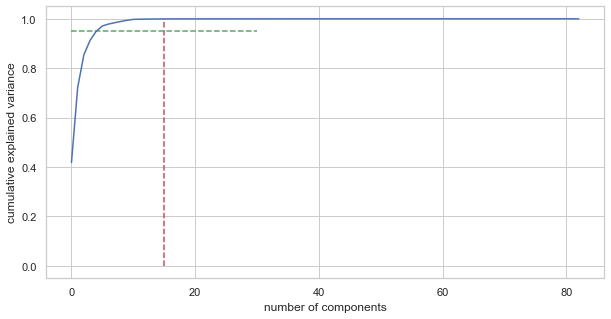

In [113]:
perform_PCA(X_train)

Looks like 5 components are enough to describe 95% of the variance in the dataset. Let's choose 5 components for modeling.

(20876, 5)
(20876, 1)
(8948, 5)
(8948, 1)


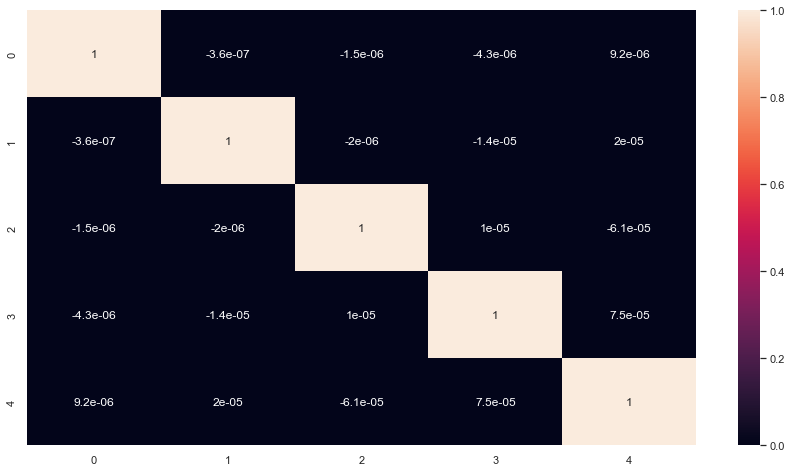

max corr: 7.493744089832558e-05 , min corr:  -6.124648356706415e-05


In [114]:
X_train_pca, X_test_pca = perform_incremental_PCA(X_train, y_train, 5)

**There is no correlation between any two components.**

### Now Let's handle Class Imbalance on PCA derived data

In [115]:
# Implement SMOTEENN
X_train_resampled, y_train_resampled = implement_smoteenn(X_train_pca, y_train)

(26985, 5)
(26985, 1)


# <center> <b> <font color = "Crimson"> 7.7) Logistic Regression

### 7.7.1) Running the Logistic Regression with default parameters.

### A) Data Imbalance Handling

In [116]:
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing, metrics
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [117]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38392, 83)
Dimension of y_train_sm Shape: (38392, 1)


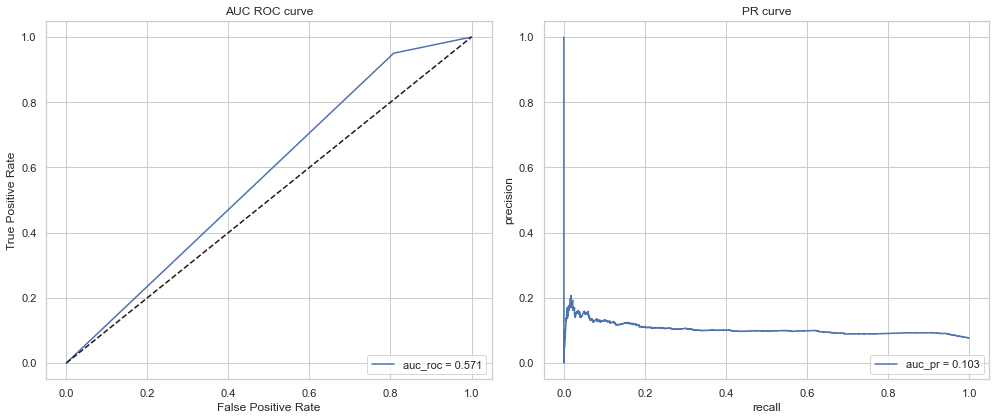

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.162277   0.088713  0.950292      0.25  0.571165  0.103138  [[1587, 6677], [34, 650]]

In [101]:
# Logistic Regression with Default Parameters

lr = LogisticRegression(n_jobs = -1, random_state = 100)

lr = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lr, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

## 7.7.2) Logistic regression with PCA

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [102]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [103]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C       params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0       0.044831      0.009483         0.001608        0.003216    0.01  {'C': 0.01}           0.003058                0.0                0.0                0.0                0.0         0.000612        0.001223                1                 0.0            0.000743            0.000746            0.000743            0.000749          0.000596         0.000298
1       0.040071      0.007185         0.004803        0.003922     0.1   {'C': 0.1}           0.003058                0.0                0.0                0.0                0.0         0.000612        0.001223                1                 0.0            0.000743            0.000746            0.000743            0.000749          0.000596         0.000298
2       0.036831      0.009616         0.004825        0.003940       1     {'C': 1}           0.003058                0.0                0.0                0.0                0.0         0.000612        0.001223                1                 0.0            0.000743            0.000746            0.000743            0.000749          0.000596         0.000298
3       0.038438      0.005956         0.000000        0.000000      10    {'C': 10}           0.003058                0.0                0.0                0.0                0.0         0.000612        0.001223                1                 0.0            0.000743            0.000746            0.000743            0.000749          0.000596         0.000298
4       0.040865      0.005205         0.001910        0.003119     100   {'C': 100}           0.003058                0.0                0.0                0.0                0.0         0.000612        0.001223                1                 0.0            0.000743            0.000746            0.000743            0.000749          0.000596         0.000298
5       0.040038      0.007138         0.003714        0.004620    1000  {'C': 1000}           0.003058                0.0                0.0                0.0                0.0         0.000612        0.001223                1                 0.0            0.000743            0.000746            0.000743            0.000749          0.000596         0.000298

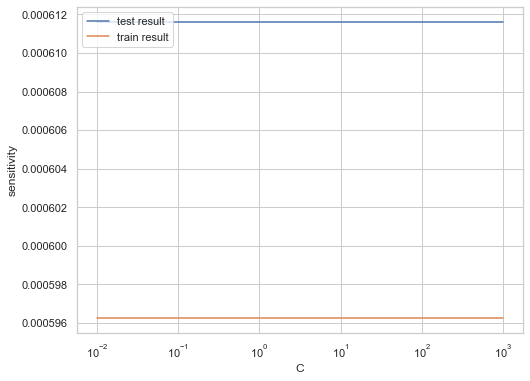

In [104]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

### Running the Logistic Regression with best parameters obtained from grid search.

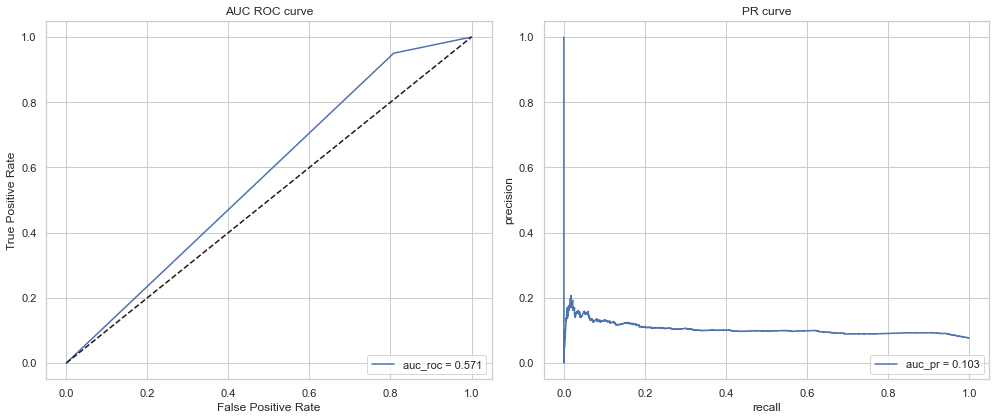

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.162277   0.088713  0.950292      0.25  0.571165  0.103138  [[1587, 6677], [34, 650]]

In [105]:
# Logistic with best parameters obtained from grid search

lr = LogisticRegression(penalty = 'l2', C = 10, n_jobs = -1, random_state = 100)

lrf = lr.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lrf, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**The score is very low. Let's see the effect of other sampling techniques.**

In [106]:
# Apply Class Imbalance transformations to dataset

dataset = []

dataset = apply_transformations(dataset, X_train_resampled, y_train_resampled)


Transforming SMOTE
Transforming RandomOverSampler
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


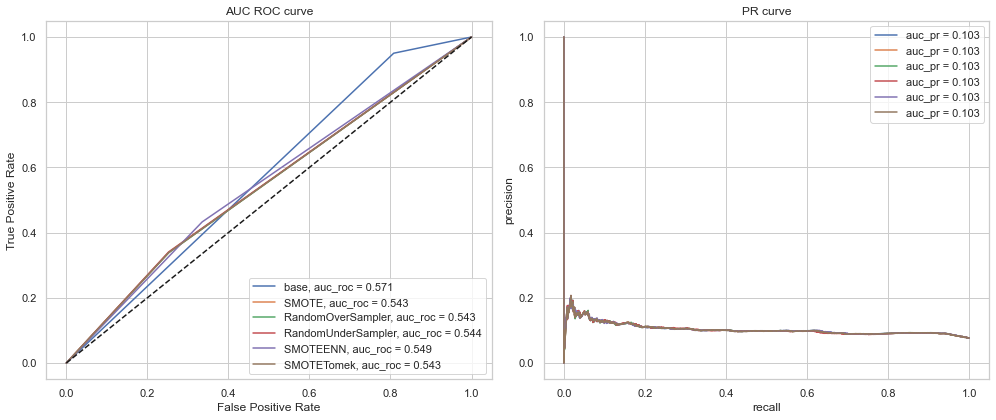

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0                base  0.162277   0.088713  0.950292  0.250000  0.571165  0.103138   [[1587, 6677], [34, 650]]
1               SMOTE  0.154358   0.099914  0.339181  0.715914  0.543139  0.103017  [[6174, 2090], [452, 232]]
2   RandomOverSampler  0.154051   0.099784  0.337719  0.716473  0.542771  0.102986  [[6180, 2084], [453, 231]]
3  RandomUnderSampler  0.155178   0.100474  0.340643  0.716473  0.544112  0.102845  [[6178, 2086], [451, 233]]
4            SMOTEENN  0.157867   0.096543  0.432749  0.647072  0.548780  0.103276  [[5494, 2770], [388, 296]]
5          SMOTETomek  0.154358   0.099914  0.339181  0.715914  0.543139  0.103017  [[6174, 2090], [452, 232]]

In [107]:
# Get Different Sampling Results

sampling_results = get_different_sampling_type_results('Logistic', X_test_pca)

# Tabulate results
sampling_results

#### Interpretation:

- RandomUnderSampler leads to high recall but comes at a huge cost to precision (also reduces training time).
- SMOTE and RandomOverSampler perform good considering auc_roc and auc_pr with acceptables levels of false positives.

**None of the Sampling Type scores can be accepted as they are very low. We will proceed with some different Machine Learning algorithms to increase the scores (f1, precision, recall, accuracy, auc_roc).**

# <center> <b> <font color = "Crimson"> 7.8) Support Vector Machine (SVM)

### SVM with Default Parameters and probability = True

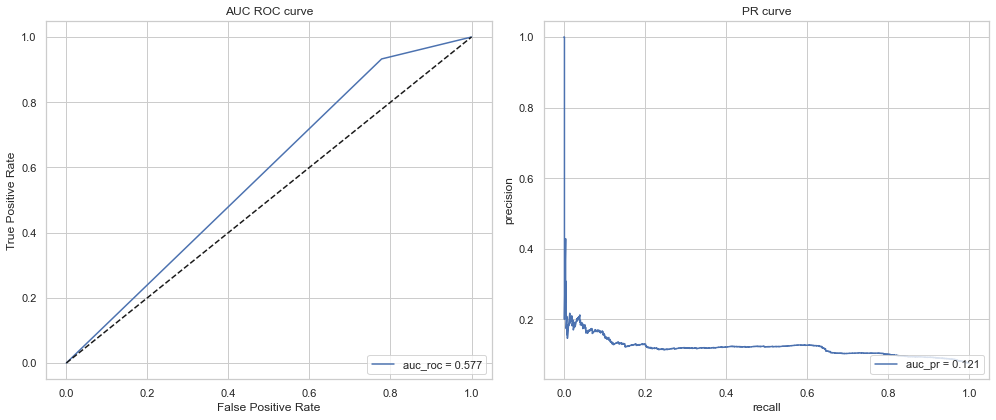

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.164581   0.090253  0.932749  0.276151  0.577277  0.121292  [[1833, 6431], [46, 638]]

In [108]:
svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, svm, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

## Support Vector Machine(SVM) with PCA

### SVM - HyperTuning Parameter C

In [109]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)   

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [110]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_gamma                        params  split0_test_score  split1_test_score  split2_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  mean_train_score  std_train_score
0       23.359865      0.978489         7.069541        0.075784       1        0.01       {'C': 1, 'gamma': 0.01}           0.919529           0.918954           0.919086         0.919189        0.000246                2            0.945678            0.945175            0.945538          0.945464         0.000212
1       14.348799      0.247696         4.540661        0.019563       1       0.001      {'C': 1, 'gamma': 0.001}           0.919385           0.918810           0.918367         0.918854        0.000417                3            0.933103            0.932816            0.931528          0.932482         0.000685
2        5.093879      0.096187         3.067387        0.284818       1      0.0001     {'C': 1, 'gamma': 0.0001}           0.919241           0.919385           0.919661         0.919429        0.000174                1            0.923834            0.924553            0.923983          0.924123         0.000310
3       31.316591      2.370957         6.964910        0.095365      10        0.01      {'C': 10, 'gamma': 0.01}           0.911338           0.908895           0.910606         0.910280        0.001024                5            0.959043            0.958684            0.958399          0.958709         0.000263
4       19.107443      0.560520         4.380769        0.177109      10       0.001     {'C': 10, 'gamma': 0.001}           0.907458           0.912200           0.908163         0.909274        0.002089                6            0.945175            0.945391            0.945035          0.945200         0.000146
5        9.597111      0.175405         2.654033        0.098138      10      0.0001    {'C': 10, 'gamma': 0.0001}           0.914499           0.914356           0.916068         0.914974        0.000776                4            0.932241            0.932169            0.930809          0.931740         0.000659
6       55.332400      2.101151         6.467951        0.327897     100        0.01     {'C': 100, 'gamma': 0.01}           0.904728           0.901997           0.902989         0.903238        0.001128                8            0.964360            0.962420            0.964147          0.963642         0.000869
7       51.048451      6.521528         4.142992        0.357555     100       0.001    {'C': 100, 'gamma': 0.001}           0.897255           0.902429           0.897959         0.899214        0.002291               10            0.951929            0.950348            0.951142          0.951140         0.000645
8       35.277198      1.981688         1.890514        0.012947     100      0.0001   {'C': 100, 'gamma': 0.0001}           0.907314           0.906596           0.907157         0.907022        0.000308                7            0.936696            0.936912            0.935623          0.936410         0.000564
9      175.747402     10.862684         6.491452        0.224983    1000        0.01    {'C': 1000, 'gamma': 0.01}           0.896824           0.895244           0.900115         0.897394        0.002029               11            0.969031            0.966516            0.967740          0.967762         0.001027
10      90.560873      6.334823         1.762556        0.103759    1000       0.001   {'C': 1000, 'gamma': 0.001}           0.892657           0.894812           0.895516         0.894328        0.001216               12            0.956241            0.955091            0.955956          0.955763         0.000489
11     168.012690     18.260989         1.929180        0.030396    1000      0.0001  {'C': 1000, 'gamma': 0.0001}           0.898261           0.899986           0.901983         0.900077        0.00

#### Plotting the accuracy with various C and gamma values

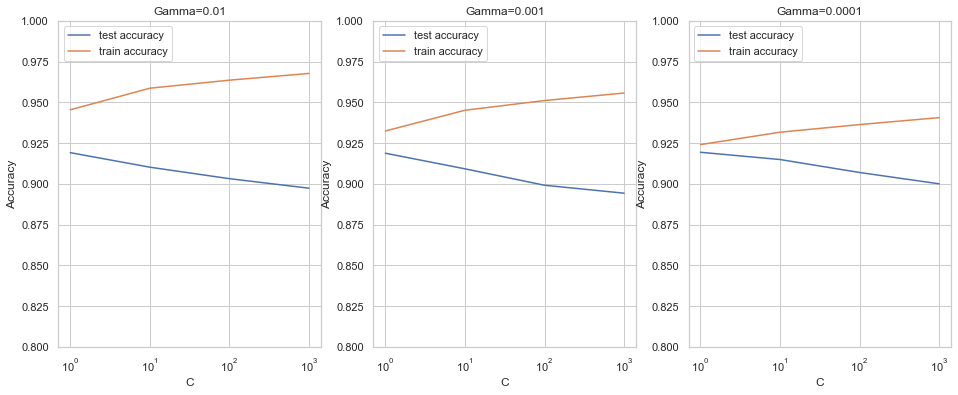

In [111]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


#### Running the SVM with best parameters obtained from grid search.

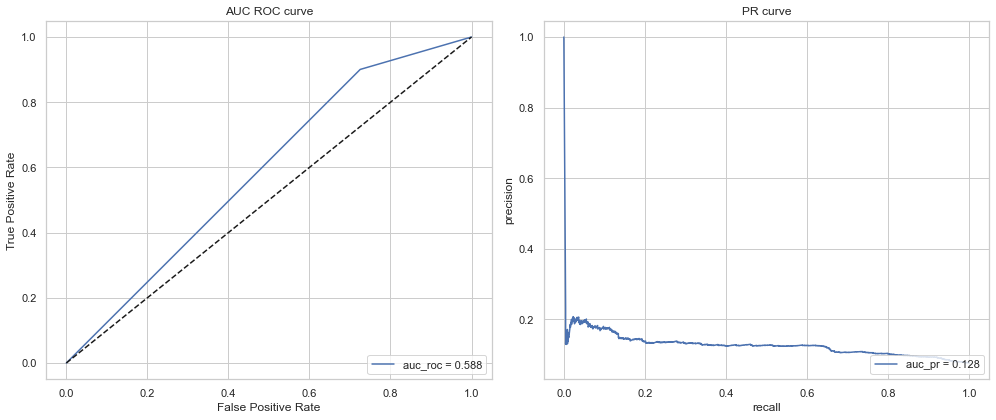

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.168906   0.093192  0.900585   0.32253  0.587635  0.127556  [[2270, 5994], [68, 616]]

In [118]:
# SVM with best parameters obtained from grid search

svm = SVC(C = 1000, kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, svm, X_test_pca)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### Inference:
For SVM, SmoteTomek Performs better than other sampling techniques. With Hypertuned, we got:

In [113]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9194290204925073 corresponding to hyperparameters {'C': 1, 'gamma': 0.0001}


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


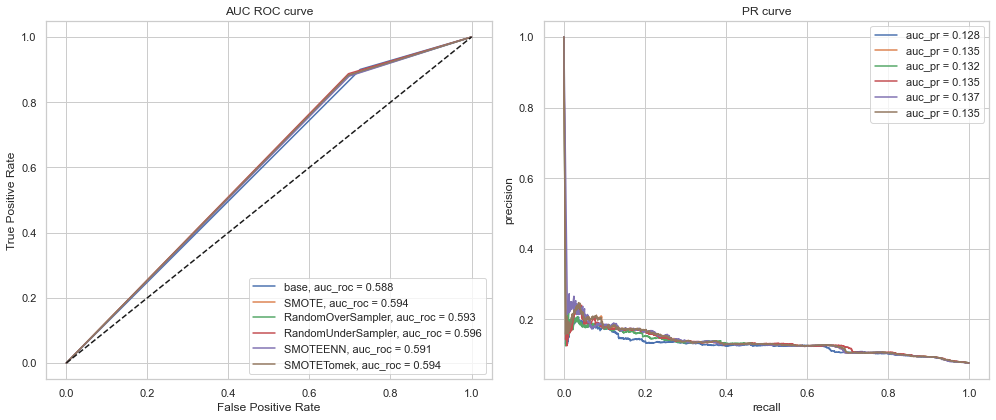

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0                base  0.168906   0.093192  0.900585  0.322530  0.587635  0.127556  [[2270, 5994], [68, 616]]
1               SMOTE  0.171688   0.095088  0.883041  0.348681  0.593747  0.135230  [[2516, 5748], [80, 604]]
2   RandomOverSampler  0.171437   0.094968  0.880117  0.349687  0.592951  0.132107  [[2527, 5737], [82, 602]]
3  RandomUnderSampler  0.172296   0.095410  0.887427  0.348234  0.595516  0.134934  [[2509, 5755], [77, 607]]
4            SMOTEENN  0.170611   0.094461  0.880117  0.345887  0.590893  0.137306  [[2493, 5771], [82, 602]]
5          SMOTETomek  0.171615   0.095043  0.883041  0.348346  0.593565  0.135495  [[2513, 5751], [80, 604]]

In [122]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('SVM', X_test_pca)

# Tabulate results
sampling_results


**Inference**:

- From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

- Also, at C=100 we have a good accuracy and the train and test scores are comparable.

- Though sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

- We can achieve comparable average test accuracy (~90%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:

- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C  

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

### Build the model with optimal hyperparameters

In [114]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

#### Prediction on the train set

In [123]:
from sklearn import metrics

# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19193     3]
 [ 1369   311]]


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9342785974324583
Sensitivity:- 0.18511904761904763
Specificity:- 0.9998437174411335


### Prediction on the test set

In [126]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[8151  113]
 [ 671   13]]


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9123826553419758
Sensitivity:- 0.019005847953216373
Specificity:- 0.986326234269119


***Model summary***

- Train set
    - Accuracy = 0.93
    - Sensitivity = 0.18
    - Specificity = 0.99
- Test set
    - Accuracy = 0.91
    - Sensitivity = 0.01
    - Specificity = 0.98

# <center> <b> <font color = "Crimson"> 7.9) Decision Tree

In [129]:
# Implement SMOTEENN on the whole train Dataset
X_train_resampled, y_train_resampled = implement_smoteenn(X_train, y_train)

(31471, 71)
(31471, 1)


## Running the Decision Tree Model with default parameters.

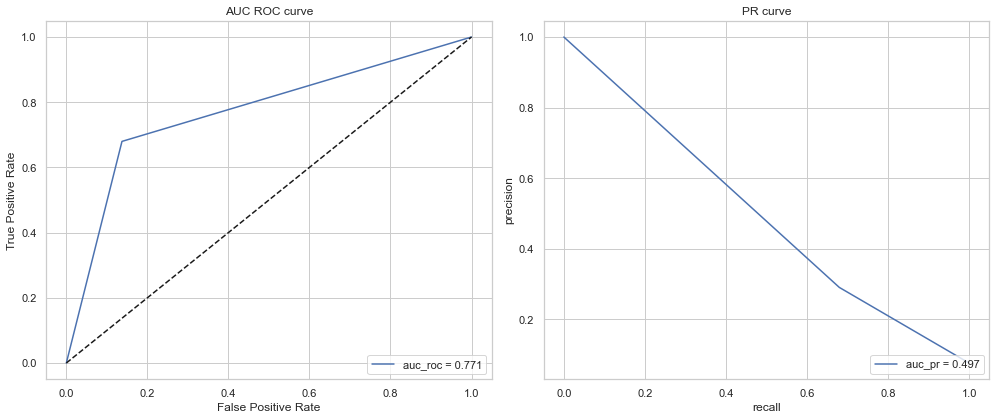

f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0  0.40718   0.290625  0.679825  0.848681  0.771241  0.497462  [[7129, 1135], [219, 465]]

In [130]:
# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, tree, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results


**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

## Decision Tree - HyperTuning

In [131]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

### Running the Decision Tree Model with best parameters obtained from grid search.

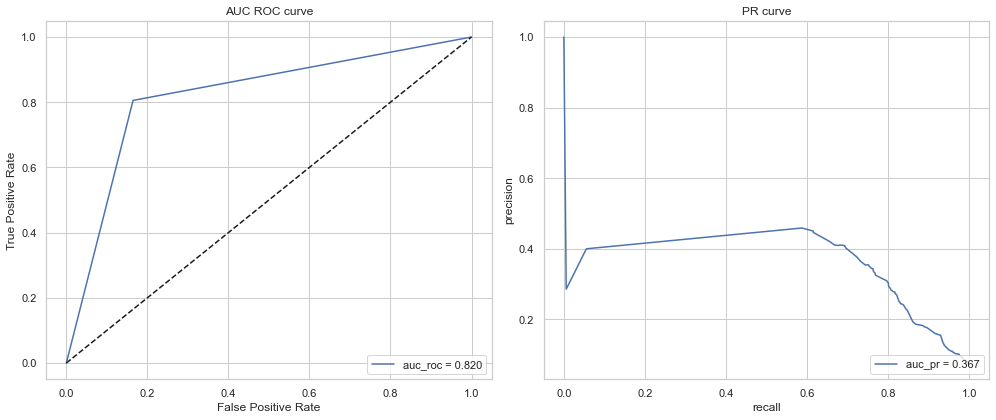

f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0  0.424499    0.28818  0.805556  0.833035  0.820433  0.367297  [[6903, 1361], [133, 551]]

In [132]:
# Decision Tree with best parameters obtained from grid search

tree = DecisionTreeClassifier(max_depth = 7, min_samples_split = 26, min_samples_leaf = 46, random_state = 100)

tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, tree, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results


In [133]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth param_min_samples_leaf param_min_samples_split                                             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0       0.038791      0.002313         0.003039        0.000629               5                     50                      50  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.000000           0.000000           0.000000           0.000000                0.0         0.000000        0.000000                3
1       0.039863      0.002130         0.002395        0.000505               5                     50                     100  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.000000           0.000000           0.000000           0.000000                0.0         0.000000        0.000000                3
2       0.038693      0.002106         0.002617        0.000501               5                    100                      50  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.000000           0.000000           0.000000           0.000000                0.0         0.000000        0.000000                3
3       0.041388      0.000887         0.002387        0.000482               5                    100                     100  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.000000           0.000000           0.000000           0.000000                0.0         0.000000        0.000000                3
4       0.068016      0.002885         0.002622        0.000517              10                     50                      50  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.017857           0.032738           0.014881           0.011905                0.0         0.015476        0.010548                1
5       0.061710      0.002658         0.003179        0.000726              10                     50                     100  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.017857           0.020833           0.014881           0.011905                0.0         0.013095        0.007192                2
6       0.058882      0.001418         0.003129        0.000291              10                    100                      50  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.000000           0.000000           0.000000           0.000000                0.0         0.000000        0.000000                3
7       0.054257      0.001984         0.002395        0.000490              10                    100                     100  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.000000           0.000000           0.000000           0.000000                0.0         0.000000        0.000000                3

In [134]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.015476190476190477
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


### Model with optimal hyperparameters

In [135]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

### Prediction on the train set

In [136]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19160    36]
 [ 1638    42]]


In [137]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9198122245640927
Sensitivity:- 0.025
Specificity:- 0.9981246092936028


### Prediction on the test set

In [139]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[8240   24]
 [ 674   10]]


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9219937416182387
Sensitivity:- 0.014619883040935672
Specificity:- 0.9970958373668926


***Model summary***

- Train set
    - Accuracy = 0.91
    - Sensitivity = 0.02
    - Specificity = 0.99
- Test set
    - Accuracy = 0.92
    - Sensitivity = 0.01
    - Specificity = 0.99
    
    
We can see from the model performance that the Sensitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Interpretation:

For Decision Trees:

- With Default Parameters, we got:
 
 
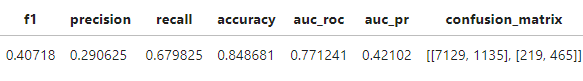

- And With HyperTuning, we got:

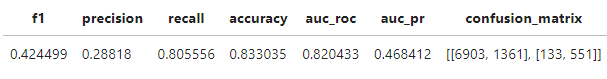


**Thus, it shows that there is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model (After HyperTuning)**

##### Note:

We have used SMOTEENN sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTEENN or not.

In [142]:
# Apply Class Imbalance transformations to dataset

dataset = []

dataset = apply_transformations(dataset, X_train, y_train)


Transforming SMOTE
Transforming RandomOverSampler
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


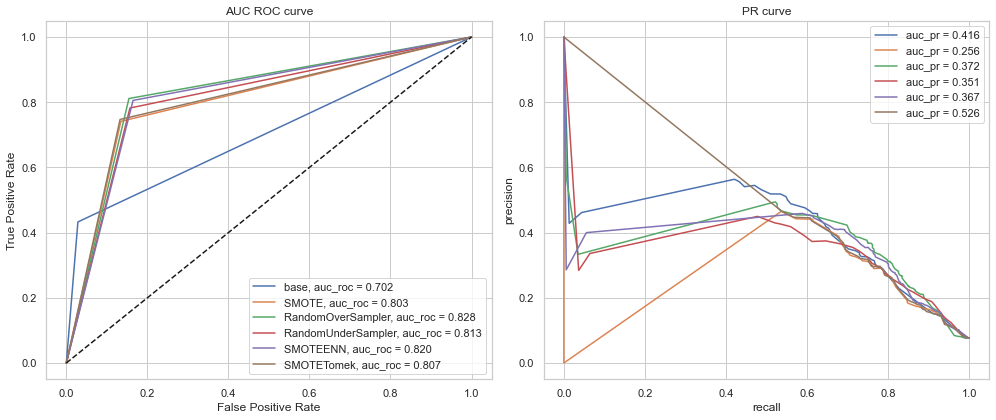

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0                base  0.486842   0.556391  0.432749  0.930264  0.702095  0.415519   [[8028, 236], [388, 296]]
1               SMOTE  0.440295   0.313156  0.741228  0.855945  0.803334  0.256393  [[7152, 1112], [177, 507]]
2   RandomOverSampler  0.441176   0.302948  0.811404  0.842870  0.828439  0.372404  [[6987, 1277], [129, 555]]
3  RandomUnderSampler  0.425278   0.292031  0.782164  0.838400  0.812609  0.351044  [[6967, 1297], [149, 535]]
4            SMOTEENN  0.424499   0.288180  0.805556  0.833035  0.820433  0.367297  [[6903, 1361], [133, 551]]
5          SMOTETomek  0.446093   0.317984  0.747076  0.858181  0.807226  0.525754  [[7168, 1096], [173, 511]]

In [143]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('Decision Tree', X_test)

# Tabulate results
sampling_results

#### Inference:
Out of various Sampling methods, RandomOverSampler yields the best one in f1, precision, recall, accuracy and auc_roc

With RandomOverSampler Sampling and Hypertuning, we got:

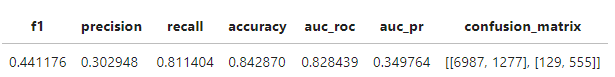

**Let's now try with Random Forest to see the result.**

# <center> <b> <font color = "Crimson"> 7.10) Random Forest

### Running the Random Forest Model with default parameters.

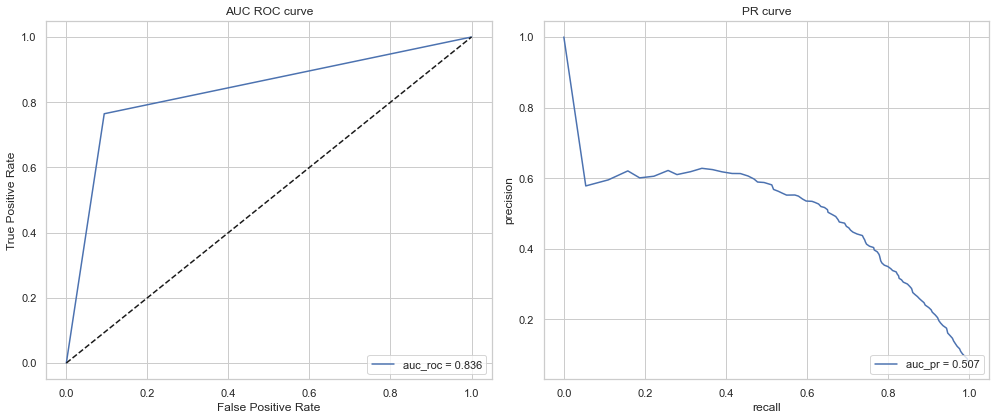

f1  precision   recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.528283   0.403549  0.76462  0.895619  0.835541  0.506621  [[7491, 773], [161, 523]]

In [144]:
# Random Forest with Default Parameters

rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, rfc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results


#### This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch

## Random Forest - HyperTuning

### Random forest with PCA

In [145]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [146]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.919524812813269 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


### Running the Random Forest Model with best parameters obtained from grid search.

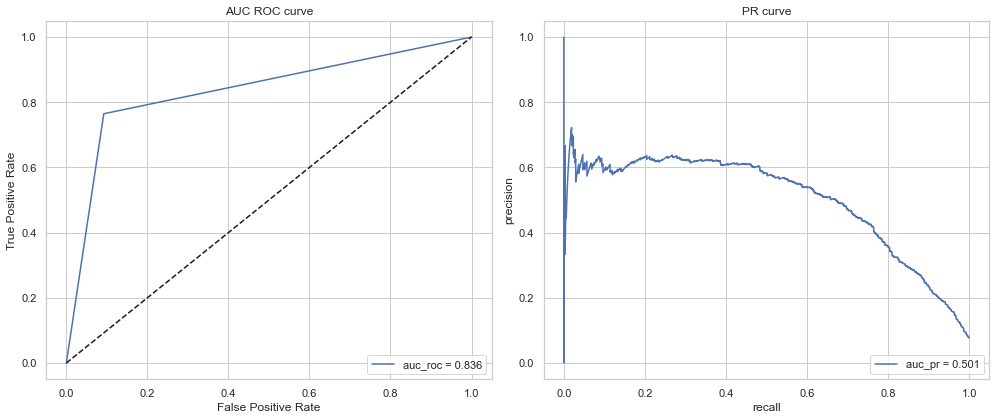

f1  precision   recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.530695   0.406371  0.76462  0.896625  0.836085  0.500532  [[7500, 764], [161, 523]]

In [147]:
# Random Forest with best parameters obtained from grid search

rfc = RandomForestClassifier(n_estimators = 900, max_depth = 29, min_samples_split = 2, min_samples_leaf = 1,
                             n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, rfc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results


### Model with optimal hyperparameters

In [148]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [149]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Prediction on the train set

In [150]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19196     0]
 [ 1680     0]]


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.919524813182602
Sensitivity:- 0.0
Specificity:- 1.0


In [153]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [154]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[8264    0]
 [ 684    0]]


In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9235583370585606
Sensitivity:- 0.0
Specificity:- 1.0


***Model summary***

- Train set
    - Accuracy = 0.91
   
- Test set
    - Accuracy = 0.92
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Final conclusion with PCA

After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

### Interpretation:

From Random Forest:

- with Default Parameters:

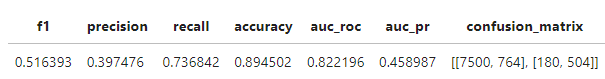

- with HyperTuning:

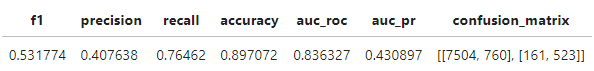

**Random Forest has a better score than Decision Tree. There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of Random Forest (After HyperTuning)**

**Note:**

- We have used SMOTEENN sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTEENN or not.


Performing base
Performing SMOTE
Performing RandomOverSampler
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


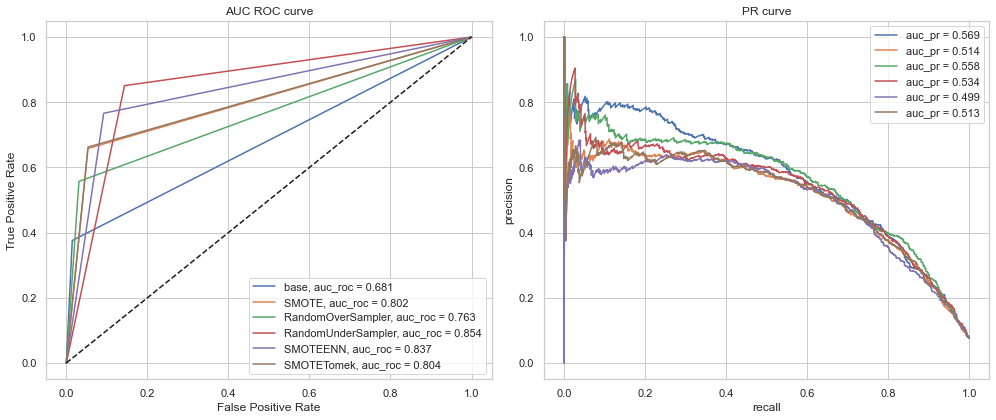

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0                base  0.483992   0.679894  0.375731  0.938757  0.680545  0.569299   [[8143, 121], [427, 257]]
1               SMOTE  0.572155   0.506187  0.657895  0.924788  0.802386  0.514167   [[7825, 439], [234, 450]]
2   RandomOverSampler  0.576399   0.597179  0.557018  0.937416  0.762959  0.557568   [[8007, 257], [303, 381]]
3  RandomUnderSampler  0.474715   0.329186  0.850877  0.856057  0.853682  0.534387  [[7078, 1186], [102, 582]]
4            SMOTEENN  0.531980   0.407465  0.766082  0.896960  0.836937  0.499360   [[7502, 762], [160, 524]]
5          SMOTETomek  0.573418   0.505580  0.662281  0.924676  0.804337  0.512842   [[7821, 443], [231, 453]]

In [157]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('Random Forest', X_test)

# Tabulate results
sampling_results

**Out of various Sampling methods, RandomOverSampler yields the best one in f1, precision, recall and accuracy**

With RandomOverSampler Sampling and Hypertuning, we got:

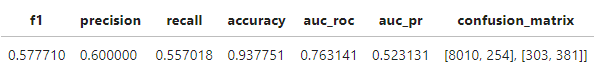


# <center> <b> <font color = "Crimson"> 7.11) Adaboost

## Running the Adaboost Classifier with default parameters.

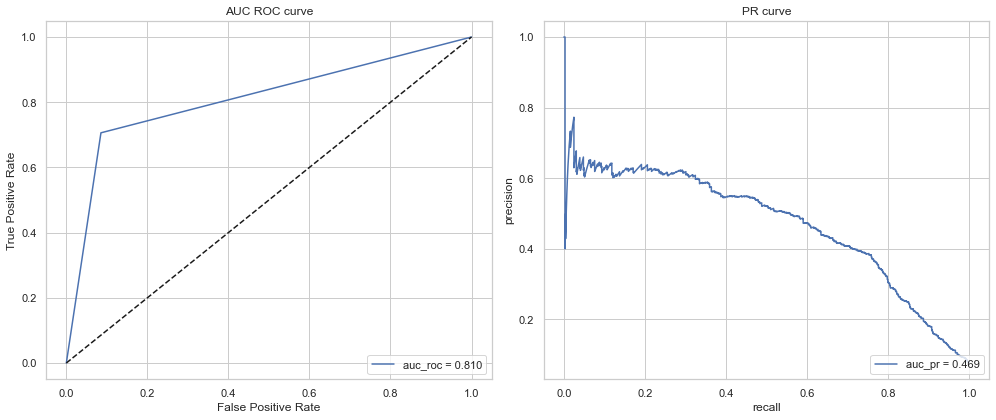

f1  precision   recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.51575   0.406224  0.70614  0.898637  0.810355  0.469404  [[7558, 706], [201, 483]]

In [158]:
# Adaboost with Default Parameters

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, random_state = 100)

abc = abc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, abc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

## Adaboost - HyperTuning

### Running the Adaboost Model with best parameters obtained from grid search.

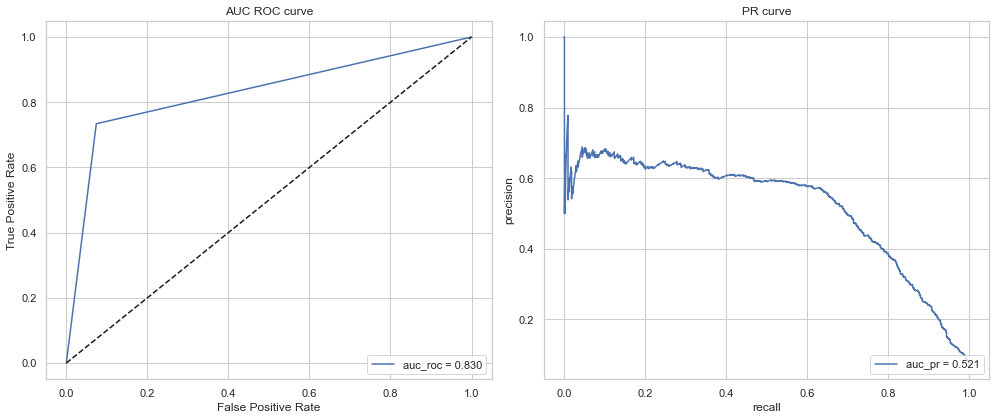

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.558709   0.451033  0.733918  0.911377  0.829991  0.520529  [[7653, 611], [182, 502]]

In [159]:
# AdaBoost with best parameters obtained from grid search

tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 9, min_samples_leaf = 29, random_state = 100)

abc = AdaBoostClassifier(base_estimator = tree, n_estimators = 1000, learning_rate = 0.9, random_state = 100)

abc = abc.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, abc, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results

### Interpretation:

From Adaboost:

- with Default Parameters:

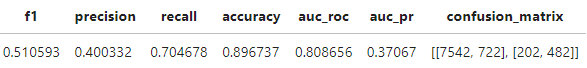

- with HyperTuning:

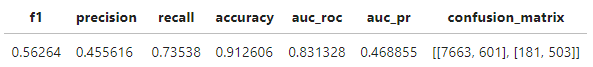

**There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of Adaboost (After HyperTuning)**

**Note:**

We have used SMOTEENN sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTEENN or not.

Performing base
Performing SMOTE
Performing RandomOverSampler
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


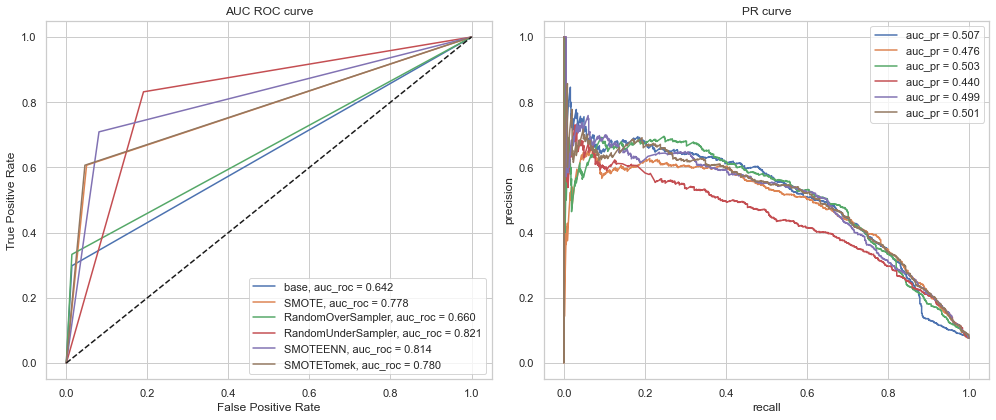

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr            confusion_matrix
0                base  0.407592   0.643533  0.298246  0.933728  0.642286  0.506858   [[8151, 113], [480, 204]]
1               SMOTE  0.548942   0.501208  0.606725  0.923782  0.778375  0.476150   [[7851, 413], [269, 415]]
2   RandomOverSampler  0.444878   0.668622  0.333333  0.936410  0.659830  0.502824   [[8151, 113], [456, 228]]
3  RandomUnderSampler  0.402547   0.265516  0.831871  0.811243  0.820703  0.439865  [[6690, 1574], [115, 569]]
4            SMOTEENN  0.528610   0.421373  0.709064  0.903330  0.814237  0.499050   [[7598, 666], [199, 485]]
5          SMOTETomek  0.561570   0.522670  0.606725  0.927582  0.780432  0.500799   [[7885, 379], [269, 415]]

In [160]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('Adaboost', X_test)

# Tabulate results
sampling_results

**Out of various Sampling methods, SMOTETomek yields the best one in f1, precision, recall and accuracy**

# <center> <b> <font color = "Crimson"> 7.12) XGBoost

## Running the XGBoost Classifier with default parameters.

[21:08:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


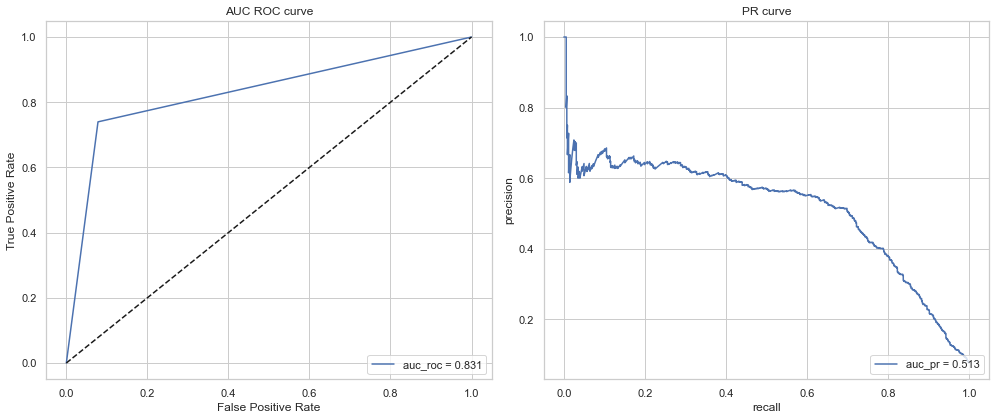

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.551198   0.439236  0.739766  0.907912  0.830798  0.512916  [[7618, 646], [178, 506]]

In [161]:
# XGBoost with Default Parameters

xgb = XGBClassifier(n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, xgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results


**This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch**

## XGBoost - HyperTuning

### Running the XGBoost with best parameters obtained from grid search.

[21:11:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


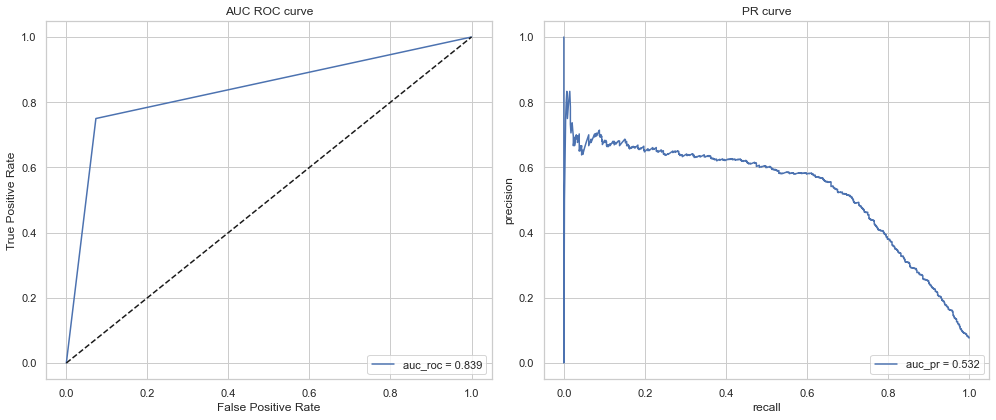

f1  precision  recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.57   0.459677    0.75    0.9135  0.838516  0.531894  [[7661, 603], [171, 513]]

In [163]:
# Random Forest with best parameters obtained from grid search

xgb = XGBClassifier(max_depth = 18, learning_rate = 0.3, n_estimators = 900, min_child_weight = 1,
                    subsample = 0.9, colsample_bytree = 0.4, n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, xgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results


### Interpretation:

From XGBoost:

- with Default Parameters:

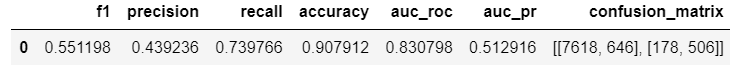


- with HyperTuning:

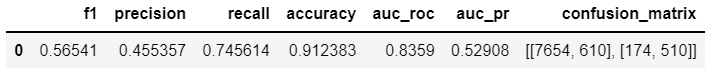

**There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of XGBoost (After HyperTuning)**

**Note:**

***We have used SMOTEENN sampling method for handling the class imbalance. Let's now verify other sampling methods and see if their scores is better than SMOTEENN or not.***


Performing base
[21:13:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performing SMOTE
[21:13:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performing RandomOverSampler
[21:14:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performing RandomUnderSampler
[21:15:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

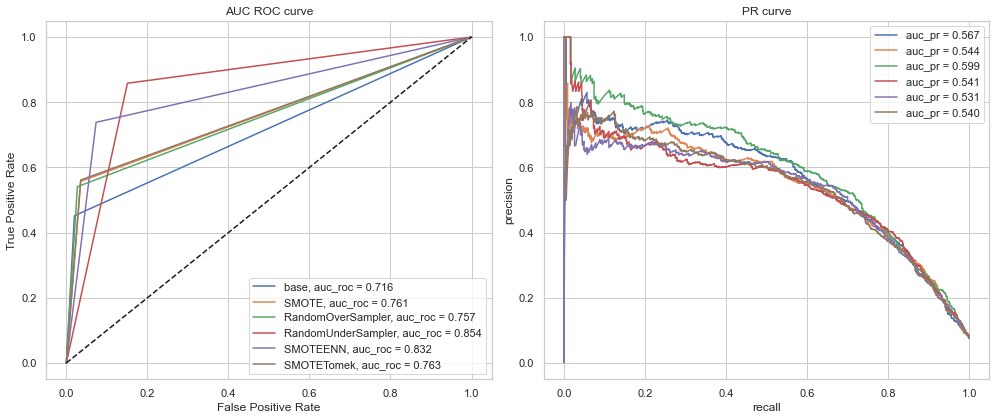

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0                base  0.533679   0.651899  0.451754  0.939651  0.715894  0.566763  [[8099, 165], [375, 309]]
1               SMOTE  0.561119   0.565282  0.557018  0.933393  0.760781  0.543880  [[7971, 293], [303, 381]]
2   RandomOverSampler  0.578577   0.621849  0.540936  0.939763  0.756855  0.599493  [[8039, 225], [314, 370]]
3  RandomUnderSampler  0.466428   0.320240  0.858187  0.849911  0.853706  0.540779  [[7018, 1246], [97, 587]]
4            SMOTEENN  0.562361   0.454137  0.738304  0.912159  0.832426  0.530532  [[7657, 607], [179, 505]]
5          SMOTETomek  0.564291   0.567208  0.561404  0.933728  0.762974  0.540316  [[7971, 293], [300, 384]]

In [164]:
# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('XGBoost', X_test)

# Tabulate results
sampling_results

### Inference:

**Out of various Sampling methods, RandomOverSampler yields the best one in f1, precision, recall, accuracy and auc_roc**

With RandomOverSampler Sampling and Hypertuning, we got:

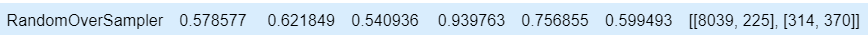

**Let's now try with LightGBM to see the result.**

# <center> <b> <font color = "Crimson"> 7.13) LightGBM

## Running the LightGBM Classifier with default parameters

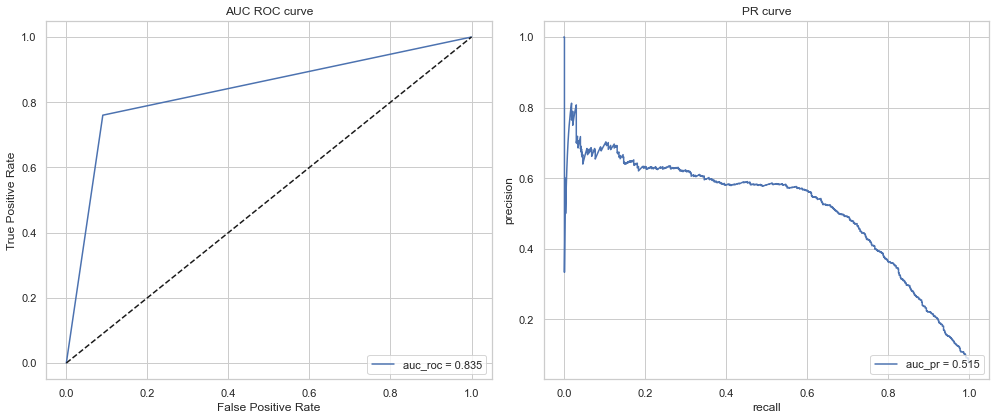

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.533881   0.411392  0.760234  0.898525  0.835102  0.514789  [[7520, 744], [164, 520]]

In [165]:
# LightGBM with Default Parameters

lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results


##### This is the initial output with default parameters. We will now proceed with hypertuning using GridSearch

## LightGBM - HyperTuning

### Running the LightGBM with best parameters obtained from grid search.

In [ ]:
# LightGBM with best parameters obtained from grid search

# lgb = LGBMClassifier(num_leaves = 82, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
#                      subsample = 0.1, colsample_bytree = 1, objective = 'binary', n_jobs = -1, random_state = 100)

# lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# # Get the Score Metrics and plots
# scores = []

# scores = get_scores(scores, lgb, X_test)

# # Tabulate results
# sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
#                                                    'auc_roc', 'auc_pr', 'confusion_matrix'])
# sampling_results

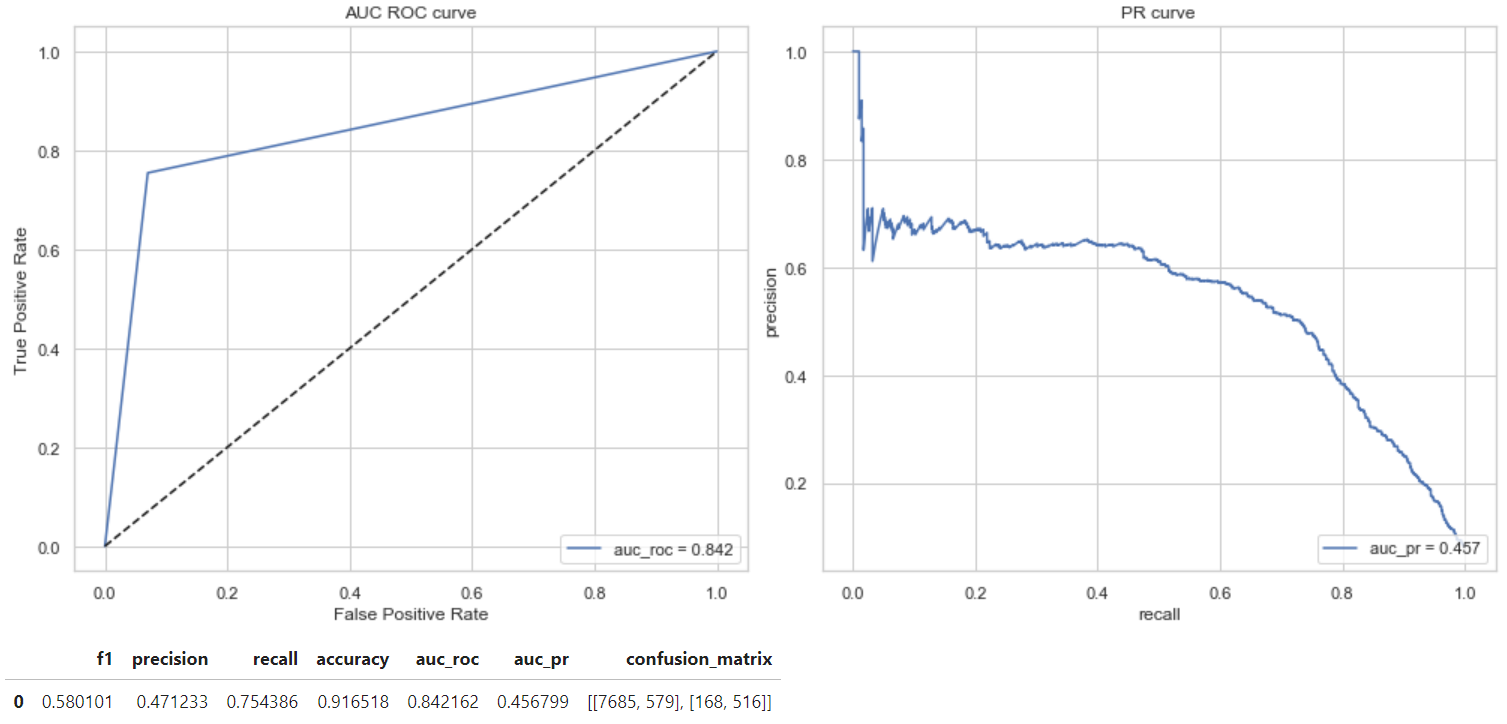

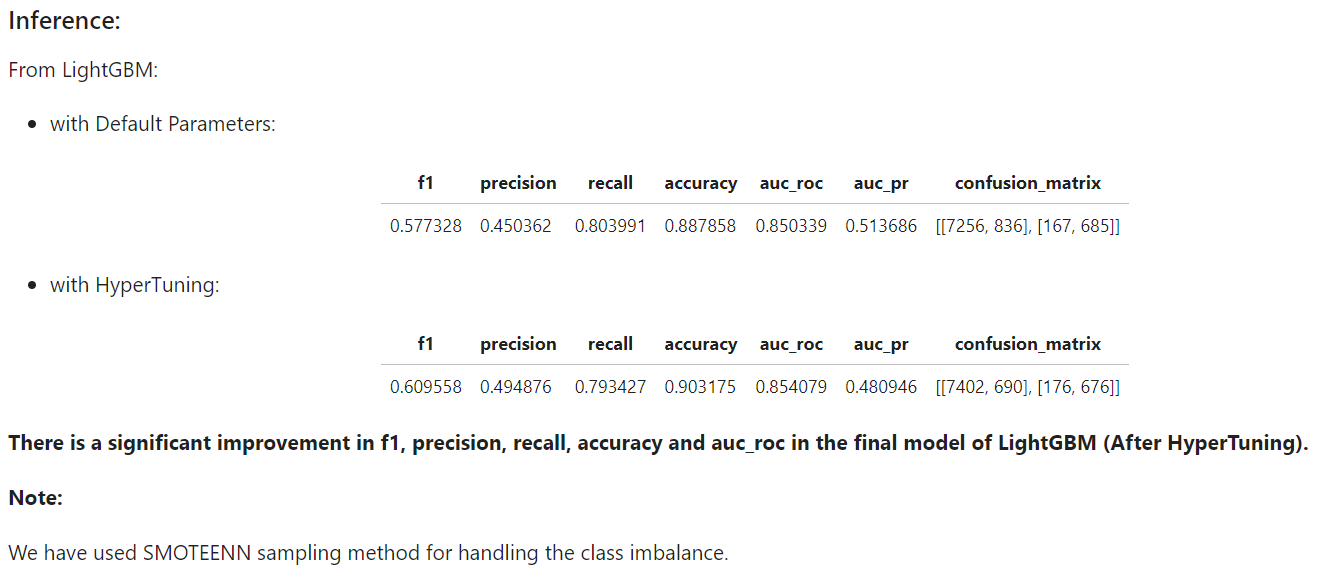

Transforming SMOTE
Transforming RandomOverSampler
Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek
Performing base
Performing SMOTE
Performing RandomOverSampler
Performing RandomUnderSampler
Performing SMOTEENN
Performing SMOTETomek
 
Training on base
Training on SMOTE
Training on RandomOverSampler
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


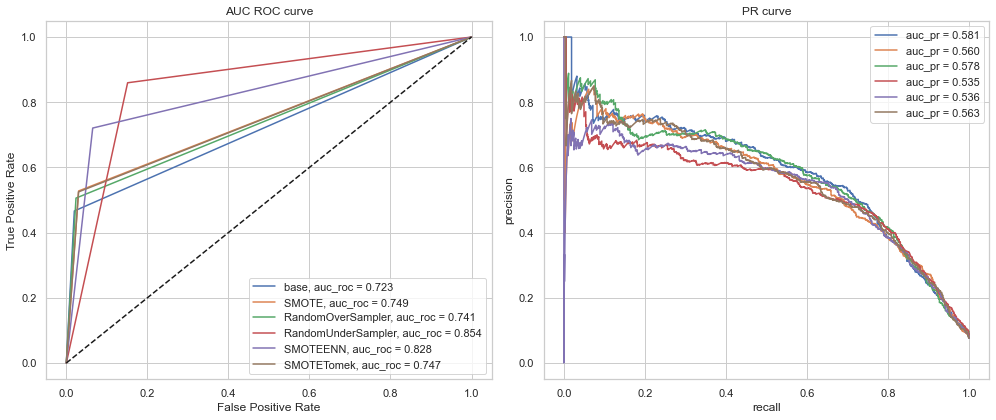

Sampling Type        f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0                base  0.547170   0.661826  0.466374  0.940992  0.723325  0.580778  [[8101, 163], [365, 319]]
1               SMOTE  0.557099   0.589869  0.527778  0.935852  0.748703  0.559588  [[8013, 251], [323, 361]]
2   RandomOverSampler  0.563977   0.637201  0.505848  0.940210  0.741005  0.577799  [[8067, 197], [338, 346]]
3  RandomUnderSampler  0.466297   0.319913  0.859649  0.849575  0.854195  0.535052  [[7014, 1250], [96, 588]]
4            SMOTEENN  0.574927   0.478177  0.720760  0.918529  0.827829  0.535518  [[7726, 538], [191, 493]]
5          SMOTETomek  0.556158   0.591433  0.524854  0.935963  0.747422  0.563128  [[8016, 248], [325, 359]]

In [124]:
# Apply Class Imbalance transformations to dataset

dataset = []

dataset = apply_transformations(dataset, X_train, y_train)

# Get Different Sampling Results
sampling_results = get_different_sampling_type_results('LightGBM', X_test)

# Tabulate results
sampling_results


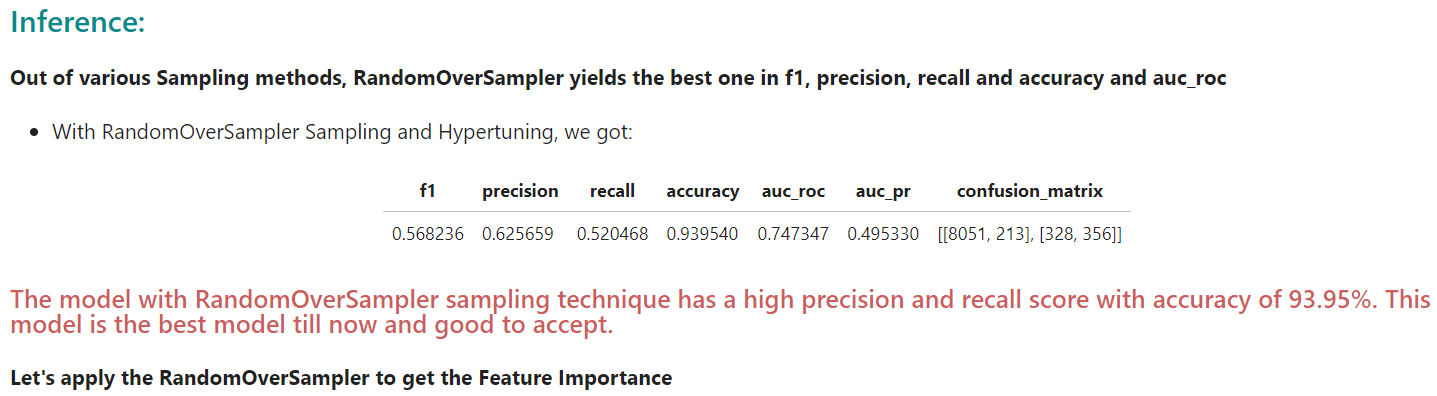

In [125]:
# Sampling through RandomOverSampler
sampling = RandomOverSampler(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_sample(X_train.values, y_train.values.ravel())

# Shuffle the data
perms = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[perms]
y_train_resampled = y_train_resampled[perms]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

print(X_train_resampled.shape)
print(y_train_resampled.shape)


(38392, 83)
(38392, 1)


### Running LightGBM with RandomOverSampler Technique to get the final model scores.

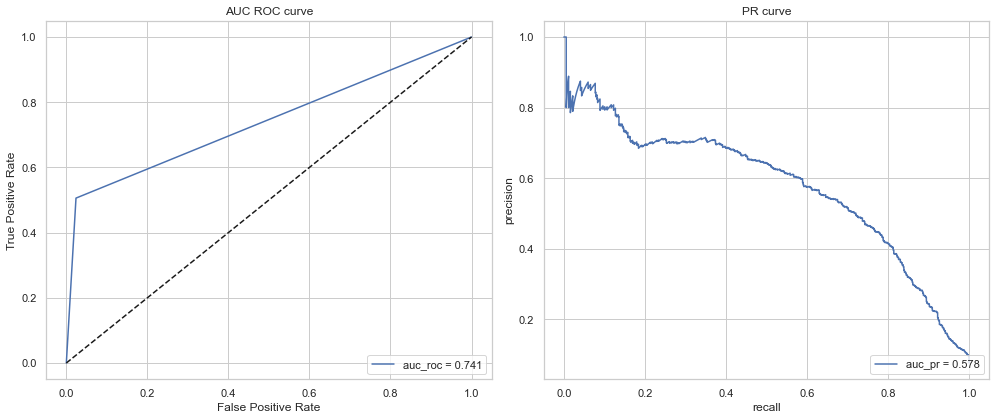

f1  precision    recall  accuracy   auc_roc    auc_pr           confusion_matrix
0  0.563977   0.637201  0.505848   0.94021  0.741005  0.577799  [[8067, 197], [338, 346]]

In [126]:
# Running LightGBM with RandomOverSampler Technique to get the final model scores.

lgb = LGBMClassifier(num_leaves = 70, max_depth = 29, learning_rate = 0.5, n_estimators = 600, min_child_samples = 20,
                     subsample = 0.1, colsample_bytree = 1, objective = 'binary', n_jobs = -1, random_state = 100)

lgb = lgb.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, lgb, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results


# <center> <b> <font color = "Crimson"> 7.14) Without PCA : Logistic regression with No PCA

In [129]:
##### Importing stats model
import statsmodels.api as sm

# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [130]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [131]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20804
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3822.1
Date:                Tue, 06 Dec 2022   Deviance:                       7644.2
Time:                        22:14:12   Pearson chi2:                 3.88e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -8745.7012   1887.477     -4.634      0.000   -1.24e+04   -5046.314
mobile_number                       -0.0312      0.053     -0.595      0.552      -0.134       0.072
night_pck_user_6                     0.0175      0.301      0.058      0.954      -0.573       0.608
night_pck_user_7                    -0.0057      0.385     -0.015      0.988      -0.760       0.749
night_pck_user_8                     0.0766      0.508      0.151      0.880      -0.919       1.072
fb_user_6                            0.0080      0.105      0.076      0.939      -0.198       0.214
fb_user_7                           -0.0885      0.107     -0.826      0.409      -0.299       0.122
fb_user_8                           -0.9036      0.158     -5.733      0.000      -1.213      -0.595
aon                                 -0.2881      0.055     -5.205      0.000      -0.397      -0.180
total_mou_good                   -8142.5971   1656.754     -4.915      0.000   -1.14e+04   -4895.419
avg_mou_action                   -9078.4240   1849.118     -4.910      0.000   -1.27e+04   -5454.219
diff_mou                          -865.0730    175.764     -4.922      0.000   -1209.563    -520.583
avg_rech_num_action                -86.6729     18.676     -4.641      0.000    -123.277     -50.069
diff_rech_num                       19.8978      4.281      4.648      0.000      11.508      28.288
avg_rech_amt_action               -116.7957     25.175     -4.639      0.000    -166.137     -67.455
diff_rech_amt                       30.0370      6.476      4.638      0.000      17.344      42.730
avg_arpu_action                   -100.6437     21.757     -4.626      0.000    -143.287     -58.001
diff_arpu                           24.8112      5.377      4.614      0.000      14.273      35.350
avg_vbc_3g_action                   -0.0418      0.015     -2.870      0.004      -0.070      -0.013
diff_vbc                             0.0002      0.000      0.802      0.422      -0.000       0.001
arpu_good_phase                     88.1098     18.971      4.645      0.000      50.928     125.292
arpu_action_phase                   23.4653      5.055      4.642      0.000      13.558      33.372
onnet_mou_good_phase                -3.6588      1.321     -2.769      0.006      -6.249      -1.069
onnet_mou_action_phase              -0.9302      0.387     -2.403      0.016      -1.689      -0.171
offnet_mou_good_phase               -5.2845      1.906     -2.773      0.006      -9.020      -1.549
offnet_mou_action_phase             -1.8995      0.779     -2.438      0.015      -3.426      -0.373
roam_ic_mou_good_phase               0.0014      0.001      2.226      0.026       0.000       0.003
roam_ic_mou_action_phase            -0.0008      0.00

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [132]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

### RFE with 15 columns

In [134]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select= 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [135]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['fb_user_6', 'fb_user_8', 'aon', 'total_mou_good', 'avg_mou_action', 'avg_rech_num_action', 'avg_rech_amt_action', 'arpu_good_phase', 'onnet_mou_good_phase', 'offnet_mou_good_phase', 'loc_ic_mou_good_phase', 'loc_ic_mou_action_phase', 'total_rech_num_good_phase', 'total_rech_num_action_phase', 'monthly_2g_good_phase'], dtype='object')


### Model-1 with RFE selected columns

In [136]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20860
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4049.9
Date:                Tue, 06 Dec 2022   Deviance:                       8099.7
Time:                        22:16:33   Pearson chi2:                 1.09e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5192      0.081    -31.291      0.000      -2.677      -2.361
fb_user_6                       0.3365      0.076      4.417      0.000       0.187       0.486
fb_user_8                      -1.5659      0.087    -18.000      0.000      -1.736      -1.395
aon                            -0.2899      0.051     -5.661      0.000      -0.390      -0.190
total_mou_good                 -0.5385      0.094     -5.727      0.000      -0.723      -0.354
avg_mou_action                 -0.9991      0.115     -8.668      0.000      -1.225      -0.773
avg_rech_num_action             0.5416      0.126      4.311      0.000       0.295       0.788
avg_rech_amt_action            -0.4035      0.068     -5.923      0.000      -0.537      -0.270
arpu_good_phase                 0.4052      0.054      7.507      0.000       0.299       0.511
onnet_mou_good_phase            0.3582      0.047      7.577      0.000       0.266       0.451
offnet_mou_good_phase           0.5318      0.068      7.877      0.000       0.399       0.664
loc_ic_mou_good_phase          -1.4227      0.114    -12.507      0.000      -1.646      -1.200
loc_ic_mou_action_phase        -0.7672      0.042    -18.270      0.000      -0.849      -0.685
total_rech_num_good_phase      -0.9151      0.133     -6.856      0.000      -1.177      -0.654
total_rech_num_action_phase    -0.5939      0.063     -9.472      0.000      -0.717      -0.471
monthly_2g_good_phase          -0.5737      0.112     -5.125      0.000      -0.793      -0.354
===============================================================================================
"""

#### Checking VIFs

In [137]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
12    total_rech_num_good_phase  33.68
5           avg_rech_num_action  32.32
7               arpu_good_phase   8.61
6           avg_rech_amt_action   8.46
4                avg_mou_action   7.28
13  total_rech_num_action_phase   7.15
3                total_mou_good   6.83
9         offnet_mou_good_phase   5.90
8          onnet_mou_good_phase   5.52
10        loc_ic_mou_good_phase   3.75
0                     fb_user_6   1.97
1                     fb_user_8   1.77
11      loc_ic_mou_action_phase   1.37
14        monthly_2g_good_phase   1.36
2                           aon   1.22

##### Removing column total_rech_num_good_phase which is insignificatnt as it has the highest VIF value of 33.68

In [139]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('total_rech_num_good_phase')
print(log_cols)

['fb_user_6', 'fb_user_8', 'aon', 'total_mou_good', 'avg_mou_action', 'avg_rech_num_action', 'avg_rech_amt_action', 'arpu_good_phase', 'onnet_mou_good_phase', 'offnet_mou_good_phase', 'loc_ic_mou_good_phase', 'loc_ic_mou_action_phase', 'total_rech_num_action_phase', 'monthly_2g_good_phase']


### Model-2

Building the model after removing og_others_8 variable.

In [140]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20861
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4073.7
Date:                Tue, 06 Dec 2022   Deviance:                       8147.4
Time:                        22:23:09   Pearson chi2:                 1.95e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5588      0.081    -31.744      0.000      -2.717      -2.401
fb_user_6                       0.3169      0.076      4.158      0.000       0.168       0.466
fb_user_8                      -1.5591      0.087    -17.903      0.000      -1.730      -1.388
aon                            -0.2844      0.051     -5.554      0.000      -0.385      -0.184
total_mou_good                 -0.7735      0.088     -8.797      0.000      -0.946      -0.601
avg_mou_action                 -0.9696      0.114     -8.478      0.000      -1.194      -0.745
avg_rech_num_action            -0.2802      0.044     -6.419      0.000      -0.366      -0.195
avg_rech_amt_action            -0.3877      0.069     -5.602      0.000      -0.523      -0.252
arpu_good_phase                 0.3778      0.054      7.039      0.000       0.273       0.483
onnet_mou_good_phase            0.4168      0.047      8.943      0.000       0.325       0.508
offnet_mou_good_phase           0.6180      0.066      9.320      0.000       0.488       0.748
loc_ic_mou_good_phase          -1.4160      0.114    -12.394      0.000      -1.640      -1.192
loc_ic_mou_action_phase        -0.8002      0.042    -19.050      0.000      -0.883      -0.718
total_rech_num_action_phase    -0.2137      0.027     -7.847      0.000      -0.267      -0.160
monthly_2g_good_phase          -0.5556      0.112     -4.973      0.000      -0.775      -0.337
===============================================================================================
"""

#### Checking VIF for Model-2

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7               arpu_good_phase  8.51
6           avg_rech_amt_action  8.38
4                avg_mou_action  7.20
3                total_mou_good  6.12
9         offnet_mou_good_phase  5.84
8          onnet_mou_good_phase  5.46
10        loc_ic_mou_good_phase  3.72
0                     fb_user_6  1.96
1                     fb_user_8  1.77
12  total_rech_num_action_phase  1.41
11      loc_ic_mou_action_phase  1.36
13        monthly_2g_good_phase  1.36
5           avg_rech_num_action  1.35
2                           aon  1.22

##### As we can see from the model summary that all the variables p-values are significant and 'arpu_good_phase' column has the highest VIF 8.51! Hence, deleting `arpu_good_phase` column.

In [142]:
# Removing arpu_good_phase column
log_cols.remove('arpu_good_phase')

### Model-3

In [143]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20862
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4101.1
Date:                Tue, 06 Dec 2022   Deviance:                       8202.2
Time:                        22:24:52   Pearson chi2:                 6.08e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5247      0.080    -31.593      0.000      -2.681      -2.368
fb_user_6                       0.3704      0.075      4.912      0.000       0.223       0.518
fb_user_8                      -1.6179      0.086    -18.757      0.000      -1.787      -1.449
aon                            -0.2864      0.051     -5.629      0.000      -0.386      -0.187
total_mou_good                 -0.6625      0.086     -7.680      0.000      -0.832      -0.493
avg_mou_action                 -1.1629      0.109    -10.643      0.000      -1.377      -0.949
avg_rech_num_action            -0.3323      0.044     -7.598      0.000      -0.418      -0.247
avg_rech_amt_action             0.0095      0.027      0.351      0.726      -0.044       0.063
onnet_mou_good_phase            0.4578      0.046      9.904      0.000       0.367       0.548
offnet_mou_good_phase           0.6902      0.065     10.567      0.000       0.562       0.818
loc_ic_mou_good_phase          -1.4078      0.114    -12.303      0.000      -1.632      -1.183
loc_ic_mou_action_phase        -0.8013      0.042    -19.019      0.000      -0.884      -0.719
total_rech_num_action_phase    -0.2706      0.026    -10.305      0.000      -0.322      -0.219
monthly_2g_good_phase          -0.5702      0.112     -5.098      0.000      -0.789      -0.351
===============================================================================================
"""

#### VIF Model-3

In [144]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                avg_mou_action  6.36
3                total_mou_good  5.85
8         offnet_mou_good_phase  5.57
7          onnet_mou_good_phase  5.28
9         loc_ic_mou_good_phase  3.68
0                     fb_user_6  1.93
1                     fb_user_8  1.75
6           avg_rech_amt_action  1.50
12        monthly_2g_good_phase  1.36
5           avg_rech_num_action  1.35
10      loc_ic_mou_action_phase  1.35
11  total_rech_num_action_phase  1.28
2                           aon  1.22

##### As we can see from the model summary that all the variables p-values are significant and 'avg_mou_action'	 column has the highest VIF 6.36! Hence, deleting `avg_mou_action` column.

In [145]:
# Removing avg_mou_action column
log_cols.remove('avg_mou_action')

### Model-4

In [146]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20876
Model:                            GLM   Df Residuals:                    20863
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4164.4
Date:                Tue, 06 Dec 2022   Deviance:                       8328.9
Time:                        22:29:42   Pearson chi2:                 1.34e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.2814      0.076    -29.839      0.000      -2.431      -2.132
fb_user_6                       0.3346      0.075      4.476      0.000       0.188       0.481
fb_user_8                      -1.5238      0.086    -17.794      0.000      -1.692      -1.356
aon                            -0.2627      0.051     -5.193      0.000      -0.362      -0.164
total_mou_good                 -0.2588      0.074     -3.487      0.000      -0.404      -0.113
avg_rech_num_action            -0.4558      0.044    -10.415      0.000      -0.542      -0.370
avg_rech_amt_action            -0.0339      0.037     -0.906      0.365      -0.107       0.039
onnet_mou_good_phase            0.0940      0.030      3.116      0.002       0.035       0.153
offnet_mou_good_phase           0.1763      0.044      4.047      0.000       0.091       0.262
loc_ic_mou_good_phase          -2.0514      0.102    -20.205      0.000      -2.250      -1.852
loc_ic_mou_action_phase        -0.9642      0.041    -23.486      0.000      -1.045      -0.884
total_rech_num_action_phase    -0.3660      0.025    -14.363      0.000      -0.416      -0.316
monthly_2g_good_phase          -0.5768      0.112     -5.157      0.000      -0.796      -0.358
===============================================================================================
"""

#### VIF Model-4

In [147]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                total_mou_good  5.58
7         offnet_mou_good_phase  3.33
6          onnet_mou_good_phase  3.04
8         loc_ic_mou_good_phase  2.12
0                     fb_user_6  1.76
1                     fb_user_8  1.54
5           avg_rech_amt_action  1.42
11        monthly_2g_good_phase  1.36
4           avg_rech_num_action  1.33
2                           aon  1.22
9       loc_ic_mou_action_phase  1.16
10  total_rech_num_action_phase  1.14

**Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.**

Hence, we can conclused that ***Model-3 log_no_pca_3 will be the final model***.

### Model performance on the train set

In [151]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_4.predict(X_train_sm_4)
y_train_pred_no_pca.head()

2234     0.042915
13773    0.043393
21641    0.012953
15592    0.006792
12480    0.013809
dtype: float64

In [153]:
y_train_pred_no_pca = y_train_pred_no_pca.values.reshape(-1)
y_train_pred_no_pca[:10]

array([0.04291476, 0.04339325, 0.01295264, 0.00679202, 0.01380911,
       0.00699119, 0.01915755, 0.40590427, 0.01366259, 0.00436352])

In [159]:
y_train = y_train.values.reshape(-1)

#### Creating a dataframe with the actual churn and the predicted probabilities¶

In [162]:
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred_no_pca})

y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.042915
1      0    0.043393
2      0    0.012953
3      0    0.006792
4      0    0.013809

In [157]:
y_train.head()

churn
2234       0
13773      0
21641      0
15592      0
12480      0

In [163]:
y_train_pred_final = pd.DataFrame({'churn':y_train, 'churn_prob':y_train_pred_no_pca})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

churn  churn_prob  CustID
0      0    0.042915       0
1      0    0.043393       1
2      0    0.012953       2
3      0    0.006792       3
4      0    0.013809       4

#### Finding Optimal Probablity Cutoff Point

In [164]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

churn  churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.042915       0    1    0    0    0    0    0    0    0    0    0
1      0    0.043393       1    1    0    0    0    0    0    0    0    0    0
2      0    0.012953       2    1    0    0    0    0    0    0    0    0    0
3      0    0.006792       3    1    0    0    0    0    0    0    0    0    0
4      0    0.013809       4    1    0    0    0    0    0    0    0    0    0

##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [165]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.080475     1.000000     0.000000
0.1          0.1  0.811889     0.776786     0.814961
0.2          0.2  0.896724     0.657738     0.917639
0.3          0.3  0.924986     0.501190     0.962075
0.4          0.4  0.930782     0.310714     0.985049
0.5          0.5  0.927285     0.164881     0.994009
0.6          0.6  0.922926     0.078571     0.996822
0.7          0.7  0.921489     0.041071     0.998541
0.8          0.8  0.920579     0.020833     0.999323
0.9          0.9  0.920148     0.010714     0.999740


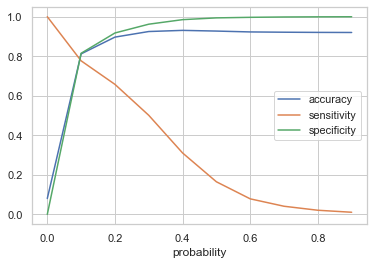

In [166]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

#####  Analysis of the above curve
Accuracy - Becomes stable around 0.1

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`At point 0.1` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.1 as the optimum probability cutoff, we are taking ***0.1*** for acheiving higher sensitivity, which is our main goal.

In [167]:
# Creating a column with name "predicted", which is the predicted value for 0.1 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

churn  churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  predicted
0      0    0.042915       0    1    0    0    0    0    0    0    0    0    0          0
1      0    0.043393       1    1    0    0    0    0    0    0    0    0    0          0
2      0    0.012953       2    1    0    0    0    0    0    0    0    0    0          0
3      0    0.006792       3    1    0    0    0    0    0    0    0    0    0          0
4      0    0.013809       4    1    0    0    0    0    0    0    0    0    0          0

##### Metrics

In [168]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[15644  3552]
 [  375  1305]]


In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8118892508143323
Sensitivity:- 0.7767857142857143
Specificity:- 0.8149614503021463


##### We have got good accuracy, sensitivity and specificity on the train set prediction.

#### Plotting the ROC Curve (Trade off between sensitivity & specificity)¶

In [171]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

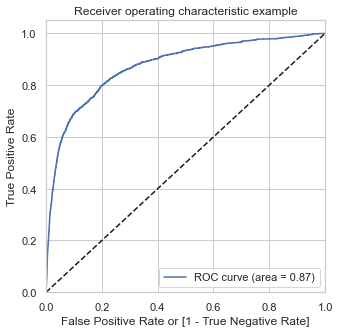

In [172]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

### Model summary

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

### Final conclusion with no PCA
We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

# <center> <b> <font color = "RED"> 7.15) Important Features

In [127]:
feature_importances = pd.DataFrame(lgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

importance
aon                                      633
mobile_number                            605
avg_mou_action                           415
loc_ic_mou_action_phase                  406
spl_og_mou_action_phase                  406
total_ic_mou_action_phase                405
max_rech_amt_action_phase                389
loc_og_mou_good_phase                    382
std_ic_mou_action_phase                  363
loc_ic_mou_good_phase                    363
total_rech_amt_action_phase              362
total_ic_mou_good_phase                  359
diff_mou                                 348
offnet_mou_action_phase                  343
std_ic_mou_good_phase                    342
total_rech_num_action_phase              336
diff_rech_amt                            335
loc_og_mou_action_phase                  332
spl_og_mou_good_phase                    331
total_mou_good                           321
diff_rech_num                            313
roam_og_mou_action_phase                 313
max_rech_amt_good_phase                  310
arpu_action_phase                        308
diff_arpu                                300
onnet_mou_action_phase                   295
offnet_mou_good_phase                    292
avg_rech_num_action                      291
onnet_mou_good_phase                     285
avg_arpu_action                          280
total_rech_num_good_phase                267
arpu_good_phase                          265
total_rech_amt_good_phase                263
avg_rech_amt_action                      262
std_og_mou_action_phase                  234
roam_ic_mou_action_phase                 232
vol_2g_mb_action_phase                   232
std_og_mou_good_phase                    222
total_og_mou_good_phase                  206
vol_2g_mb_good_phase                     199
total_og_mou_action_phase                190
vol_3g_mb_action_phase                   188
ic_others_action_phase                   170
max_rech_data_action_phase               165
total_data_rech_amt_action_phase         162
roam_ic_mou_good_phase                   162
vol_3g_mb_good_phase                     152
roam_og_mou_good_phase                   149
ic_others_good_phase                     146
max_rech_data_good_phase                 145
total_data_rech_amt_good_phase           142
vbc_3g_action_phase                      131
diff_vbc                                 125
isd_ic_mou_action_phase                  115
spl_ic_mou_action_phase                  112
vbc_3g_good_phase                        109
isd_ic_mou_good_phase                    104
avg_vbc_3g_action                         87
spl_ic_mou_good_phase                     82
total_rech_data_action_phase              70
og_others_good_phase                      70
isd_og_mou_action_phase                   62
og_others_action_phase                    62
total_rech_data_good_phase                60
count_rech_2g_good_phase                  58
isd_og_mou_good_phase                     45
count_rech_2g_action_phase                43
count_rech_3g_action_phase                42
fb_user_8                                 34
count_rech_3g_good_phase                  34
sachet_2g_good_phase                      28
sachet_3g_good_phase                      27
sachet_2g_action_phase                    25
monthly_2g_good_phase                     22
monthly_3g_action_phase                   20
fb_user_7                                 20
monthly_2g_action_phase                   15
sachet_3g_action_phase                    15
monthly_3g_good_phase                     13
fb_user_6                                 11
night_pck_user_8                           1
night_pck_user_6                           1
night_pck_user_7                           0

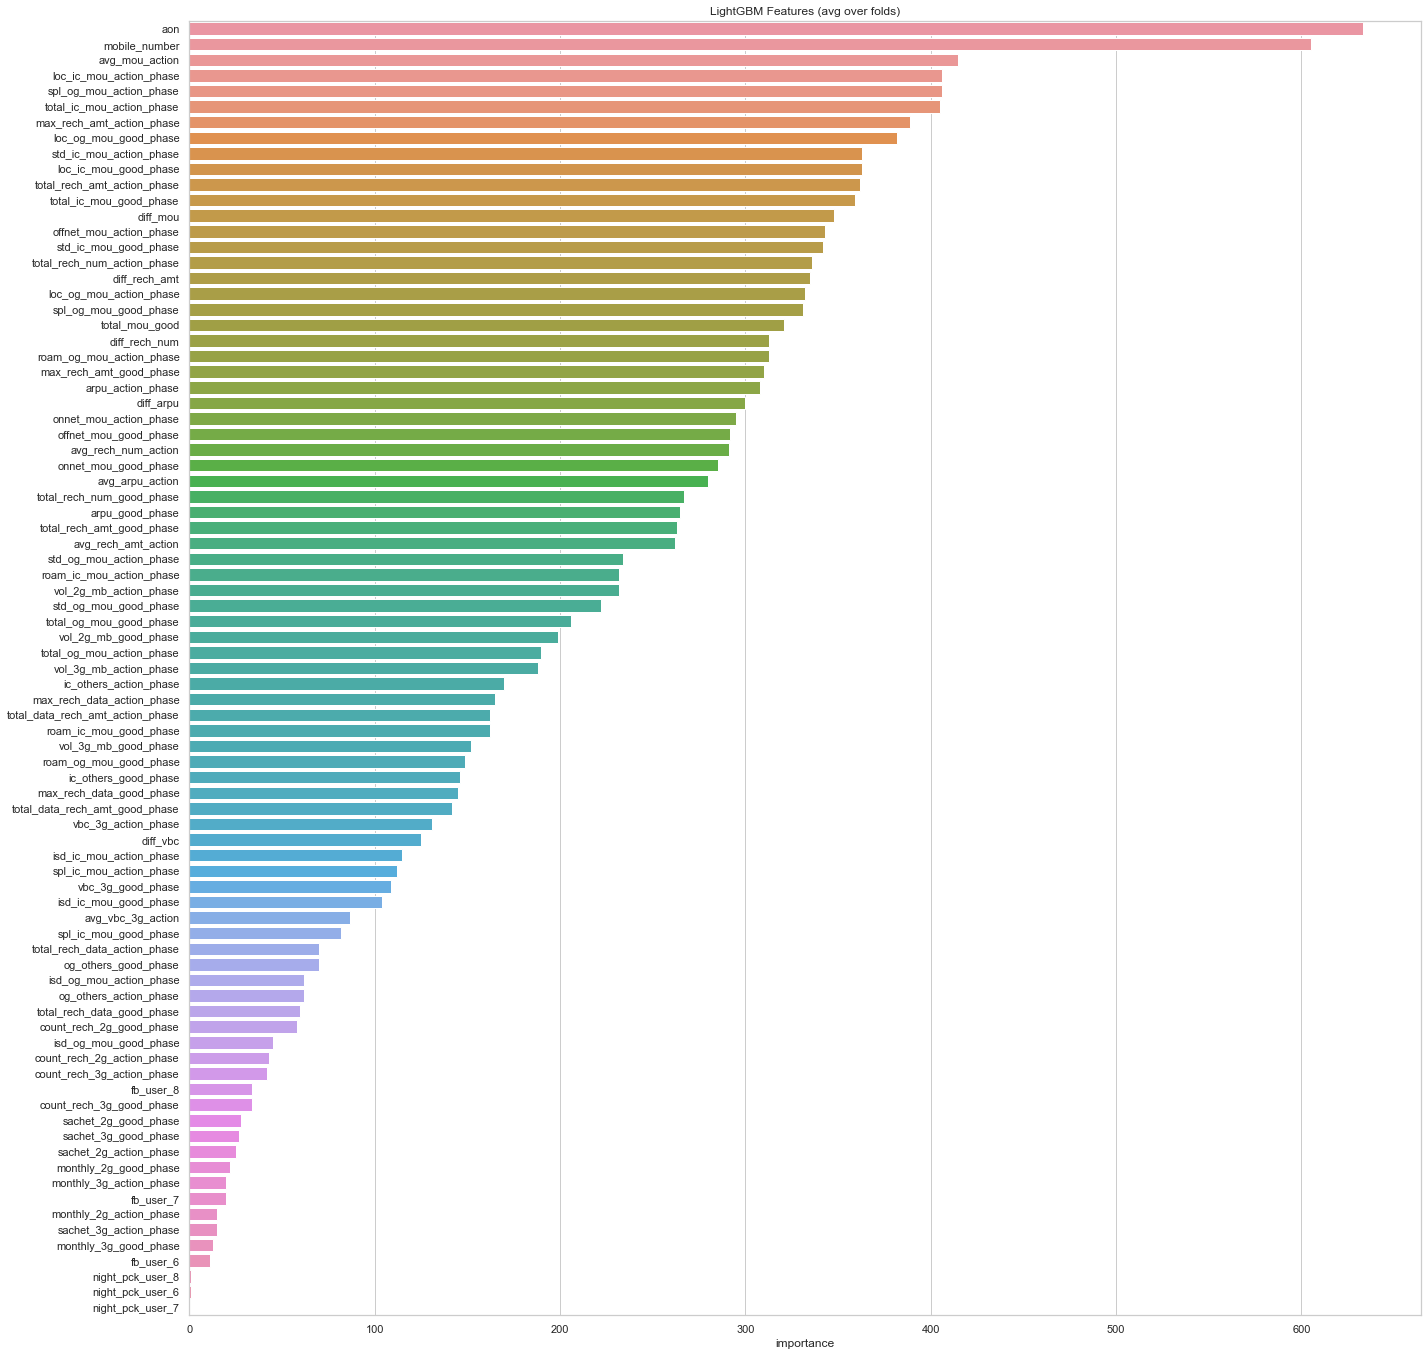

In [128]:
# Plotting the features
plt.figure(figsize=(20, 19))

sns.barplot(x = "importance",
            y = feature_importances.index,
            data = feature_importances.sort_values(by = "importance", ascending = False))

plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# <center> <b> FINAL INFERENCE

The telecom churn analysis is required to predict the customer churn behavior i.e., if a particular customer is likely to churn or not churn. As the problem preview said -

**"In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition."**

Thus to predict or analyse the behavior of a customer over a time period of good phase and the action phase we created about 4 predictive models as mentioned below -

- Logistic Regression Model.
- Support Vector Machine.
- Decision Tree Classifier.
- Random Forest Classifier.

The above models were initially created with default parameters which did not give accurate results and the score metrics were not good. Then we hypertuned each model and recreated them with the `best estimators`. The hyper tuned model showed an increase in the classification scores though marginally. These scores were still not good enough to say the model were good enough.

**Each of the above models were assessed on area under the curve, precision, recall.**

These models did not fare that well and were not able to classify accurately.

We then applied the following **Boosting mechanisms.**

- AdaBoostClassifier.
- Extreme Gradient Boosting with XGBoost.
- Light Gradient Boosting Machine with LightGBM.


The above boosting models were initially created with default parameters which performed better than any of the logistic regression model , SVM model, the decision tree or the random forest classifier. The classification scores and metrics shoot up very high.

We then hypertuned each boosting model and recreated them with the best estimators. The hyper tuned model again performed better that their default counterpart. There was an increase in the classification scores.

## WINNER

Out of all the above models, **Light Gradient Boosting Machine with LightGBM with RandomOverSampler Technique** came out as the winner giving the best metrics of scores. Let's see the summary of scores for LightGBM model and how it performed.

### Summary of Scores

> ###  LightGBM - Default v/s Hypertuned Model

with RandomOverSampling Technique:

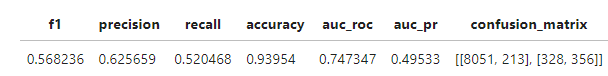

**There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of LightGBM (After HyperTuning).**

> ### Confusion Matrix (Hyper tuned Model)

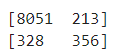

- True Negative = 8051
- False Positive = 213
- False Negative = 328
- True Positive = 356

Here, Positve == Churn Case and Negative = Non-Churn Case

### Top 7 Features affecting churn

- aon
- loc_ic_mou_action_phase
- arpu_action_phase
- std_ic_mou_action_phase
- max_rech_amt_action_phase
- loc_ic_mou_good_phase
- total_ic_mou_good_phase      
Action phase features are defined above in the derived features section.

### Bottom Line

- Our LightGBM model is a decent model. **We are able to predict with accuracy of 93.95 % .**


- If the goal is to engage and talk to the customers to prevent them from churning, its ok to engage with those who are mistakenly tagged as 'not churned,' as it does not cause any negative problem. It could potentially make them even happier for the extra attention they are getting. This is the kind of model that can surely add a value.

## <center>  Business Recomendation

#### Top predictors

Below are few top variables selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|last_day_rch_amt_8|0.810509|
|arpu_7|0.759867|
|total_ic_mou_8|0.720703|
|loc_og_t2t_mou_8|0.651540|
|total_rech_num_8|0.609116|
|onnet_mou_8|0.598011|
|total_og_mou_8|0.591759|
|monthly_3g_8|0.579951|
|std_og_t2t_mou_8|0.517344|
|monthly_2g_8|0.496402|
|loc_ic_t2m_mou_8|0.417435|
|loc_og_t2f_mou_8|0.355742|
|loc_ic_t2t_mou_6|0.339592|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:- 

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.

# <center> <font size = 16> THANK YOU <font/>

<center><font size = 5>
     <font color="black"><b> SUBMITTED BY <b/> <font/> <br>
     <font color="Darkblue"> <font size = 3 > 
         <b>                        <font color="orangered"> GURPREET KAUR </font> - gurpreetkaurjethrap@gmail.com<br>
                             <font size = 3 > <font color="Black"> <b> (DSC43 Batch) <b/> 
                   